In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Diffusion'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['__pycache__', 'ddpm.py', 'data.py', 'unet.py', 'utilities.py', 'train.ipynb']


In [3]:
sys.path.append(GOOGLE_DRIVE_PATH)

In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from ddpm import DDPM
from data import Data
from unet import UNet
from utilities import visualize_forward, display_generated, train

In [6]:
torch.manual_seed(27)
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float32

In [9]:
ddpm_dict = {
  "beta_start": 1e-4,
  "beta_end": 2e-2,
  "timesteps": 1000,
  "device": device,
  "dtype": dtype
}

data_dict = {
  "name": "mnist",
  "path": "data",
  "batch_size": 1024
}

ddpm = DDPM(**ddpm_dict)
data = Data(**data_dict)

unet_dict = {
  "input_channels": data.shape[0],
  "hid_channels": 8,
  "num_blocks": 3,
  "emb_dim": 1024
}

unet = UNet(**unet_dict).to(dtype=ddpm.dtype, device=ddpm.device)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 426kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.98MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.29MB/s]


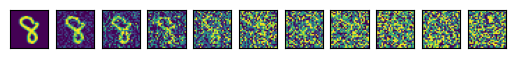

In [9]:
visualize_forward(ddpm, data)

Number of parameters: 1363072

Epoch: 1 | Learning Rate: 0.001
1.4495117664337158
1.2466052770614624
1.1162950992584229
0.9958786964416504
0.9088380336761475
0.8426867127418518
0.7921440005302429
0.7213078737258911
0.6746340990066528
0.6402493715286255
0.6073428988456726
0.5868549346923828
0.5490683913230896
0.5118357539176941
0.4996720850467682
0.4910709857940674
0.45234304666519165
0.43979305028915405
0.42407622933387756
0.4021429717540741
0.3946895897388458
0.3841680586338043
0.37307292222976685
0.3610343337059021
0.35342663526535034
0.33773523569107056
0.32228896021842957
0.31060877442359924
0.30266574025154114
0.3031001091003418
0.2960072159767151
0.27115896344184875
0.27225461602211
0.2695480287075043
0.2678557336330414
0.2546583116054535
0.25365081429481506
0.25085511803627014
0.23892584443092346
0.2289421260356903
0.22273661196231842
0.22663956880569458
0.22089125216007233
0.21335691213607788
0.21074898540973663
0.20953351259231567
0.21241028606891632
0.19950391352176666
0.1968

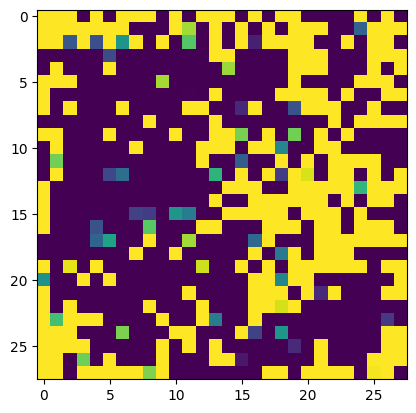


Epoch: 2 | Learning Rate: 0.001
0.1771133542060852
0.17574338614940643
0.17561693489551544
0.17663927376270294
0.17078471183776855
0.17380109429359436
0.17401398718357086
0.16642527282238007
0.16127417981624603
0.16023650765419006
0.1608010083436966
0.15942111611366272
0.1594705879688263
0.1624966561794281
0.16063906252384186
0.15829020738601685
0.16184870898723602
0.1594899445772171
0.1533958613872528
0.15143319964408875
0.14876104891300201
0.15415355563163757
0.15184640884399414
0.15113885700702667
0.1497529298067093
0.14804299175739288
0.14765888452529907
0.15003962814807892
0.14601722359657288
0.14821463823318481
0.14514556527137756
0.15151898562908173
0.14454977214336395
0.14401952922344208
0.1418701410293579
0.14314685761928558
0.13867835700511932
0.14496007561683655
0.14003975689411163
0.1385069191455841
0.13448753952980042
0.13055633008480072
0.1358572542667389
0.13431669771671295
0.13520048558712006
0.1326713114976883
0.13495245575904846
0.1348838210105896
0.1287049651145935


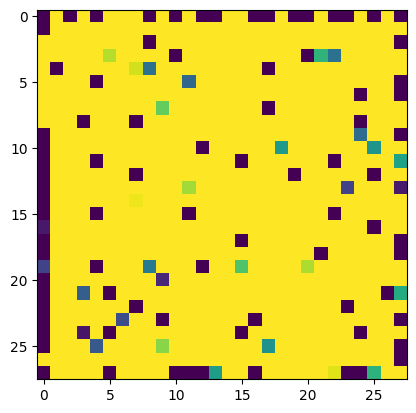


Epoch: 3 | Learning Rate: 0.001
0.12528198957443237
0.12669308483600616
0.1296156793832779
0.12618863582611084
0.124627985060215
0.12384028732776642
0.1254422813653946
0.12073291093111038
0.12485253065824509
0.12225425243377686
0.12283727526664734
0.11972799152135849
0.1187080442905426
0.11817201226949692
0.11474451422691345
0.12101427465677261
0.11647975444793701
0.11497508734464645
0.12408703565597534
0.12099318206310272
0.11582789570093155
0.11385561525821686
0.11400318145751953
0.11651571840047836
0.11551911383867264
0.11227687448263168
0.10865552723407745
0.11403199285268784
0.1160510703921318
0.10666597634553909
0.11427643895149231
0.1087278425693512
0.1108347624540329
0.1113467887043953
0.11336223036050797
0.10665185749530792
0.10921353846788406
0.10779407620429993
0.10698806494474411
0.1040157601237297
0.11238058656454086
0.10964095592498779
0.10713771730661392
0.10498953610658646
0.10817962884902954
0.09969296306371689
0.10236728936433792
0.1034165546298027
0.1068026870489120

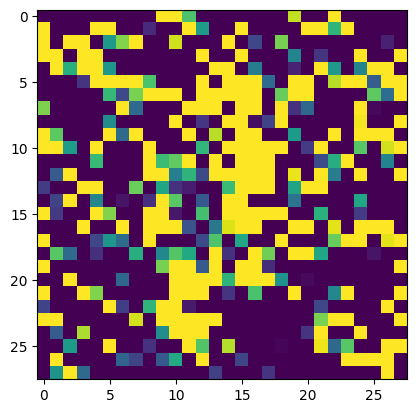


Epoch: 4 | Learning Rate: 0.001
0.10405481606721878
0.10018686950206757
0.10099998861551285
0.09711341559886932
0.09653069078922272
0.09984248131513596
0.10036682337522507
0.10033698379993439
0.09725520014762878
0.10065880417823792
0.0949200987815857
0.09657993912696838
0.09821510314941406
0.09775162488222122
0.09409686923027039
0.09543593227863312
0.09733080118894577
0.10024398565292358
0.09858214855194092
0.09559348970651627
0.09350544214248657
0.09236203134059906
0.09389840066432953
0.09003327786922455
0.09468148648738861
0.09581215679645538
0.09370476752519608
0.0952705442905426
0.09079837799072266
0.09301523119211197
0.09275412559509277
0.08703633397817612
0.09153159707784653
0.08795300126075745
0.08991794288158417
0.0886174812912941
0.09066575020551682
0.0879015251994133
0.09241321682929993
0.08537915349006653
0.0883699506521225
0.09110555797815323
0.08887983858585358
0.086593858897686
0.0853639543056488
0.08763784170150757
0.08294449001550674
0.08964388817548752
0.0894737616181

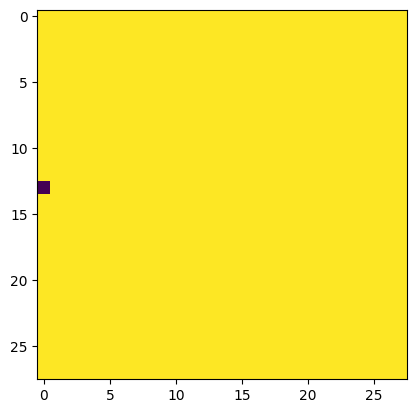


Epoch: 5 | Learning Rate: 0.001
0.0811651349067688
0.08238539099693298
0.0807533711194992
0.07795513421297073
0.0846916139125824
0.08595870435237885
0.08033711463212967
0.08043084293603897
0.08137460798025131
0.0809781551361084
0.08303118497133255
0.08033677935600281
0.08319607377052307
0.07924017310142517
0.078611359000206
0.07961651682853699
0.0810546800494194
0.07777358591556549
0.07935208827257156
0.08056998252868652
0.0788760855793953
0.07529237866401672
0.07219948619604111
0.07748713344335556
0.07850697636604309
0.07554532587528229
0.07553116977214813
0.07558500021696091
0.0801500752568245
0.07490342855453491
0.07693404704332352
0.07418056577444077
0.07915230095386505
0.07673213630914688
0.07411769032478333
0.07804793864488602
0.0774664506316185
0.07535061240196228
0.07352885603904724
0.07470833510160446
0.07213007658720016
0.07581028342247009
0.07552235573530197
0.0753665417432785
0.07697386294603348
0.07815434038639069
0.0730719044804573
0.07642307877540588
0.0729435607790947


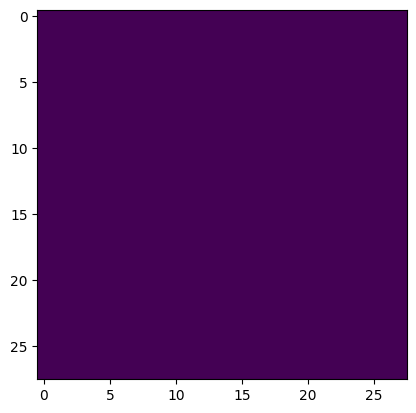


Epoch: 6 | Learning Rate: 0.001
0.06659951061010361
0.06438083201646805
0.06568946689367294
0.0695473775267601
0.06915874779224396
0.06920135021209717
0.07091760635375977
0.06667016446590424
0.06802300363779068
0.06983441859483719
0.06721055507659912
0.06957665830850601
0.06440446525812149
0.06662635505199432
0.0654604434967041
0.06836877763271332
0.06597764045000076
0.06616299599409103
0.06549157202243805
0.06996612250804901
0.0645904690027237
0.0638241097331047
0.0666055828332901
0.06441964954137802
0.0661545842885971
0.06999287009239197
0.06812360137701035
0.06796202063560486
0.06648167967796326
0.0715394914150238
0.07006476074457169
0.06474447250366211
0.059288349002599716
0.0672425702214241
0.0638156607747078
0.06319510191679001
0.066155344247818
0.06613001227378845
0.06813762336969376
0.06402327120304108
0.06647378206253052
0.06482600420713425
0.06401000916957855
0.06528524309396744
0.06037059798836708
0.06531564891338348
0.06035879999399185
0.06552918255329132
0.066990479826927

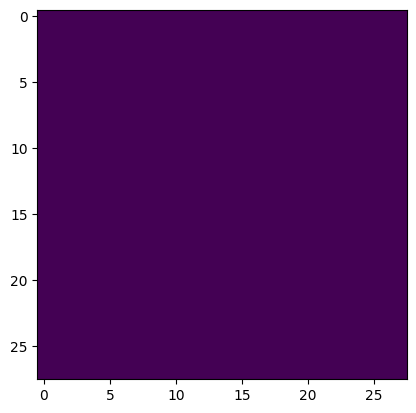


Epoch: 7 | Learning Rate: 0.001
0.062045883387327194
0.060986947268247604
0.06636364758014679
0.06263023614883423
0.06188121810555458
0.0617772676050663
0.06338079273700714
0.06316084414720535
0.06280994415283203
0.06335864961147308
0.059399716556072235
0.058214109390974045
0.06685686111450195
0.0571577250957489
0.06348149478435516
0.06181784346699715
0.06415007263422012
0.057366978377103806
0.06477813422679901
0.062049929052591324
0.05695003271102905
0.055966392159461975
0.06053980812430382
0.059953998774290085
0.06163756921887398
0.05815400928258896
0.06202278286218643
0.06043299287557602
0.061330512166023254
0.05802725628018379
0.06111614778637886
0.061244282871484756
0.05614886432886124
0.05872556194663048
0.059690095484256744
0.05457795783877373
0.059324391186237335
0.05901365727186203
0.06261708587408066
0.05652699992060661
0.06243372708559036
0.05524852126836777
0.05494328960776329
0.05659795552492142
0.060214392840862274
0.057512808591127396
0.05821557715535164
0.0586961321532

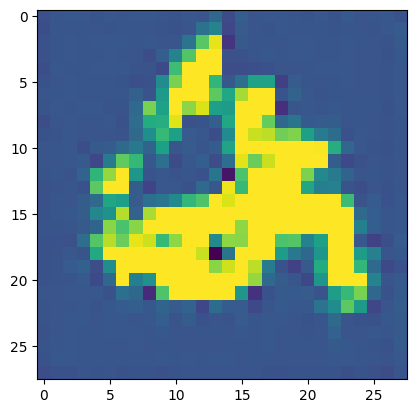


Epoch: 8 | Learning Rate: 0.001
0.05802988260984421
0.05296633020043373
0.05611972138285637
0.05907979980111122
0.062143731862306595
0.05803823471069336
0.05986109375953674
0.05813209339976311
0.057452987879514694
0.05675235018134117
0.056888509541749954
0.05240590125322342
0.05650140717625618
0.054516714066267014
0.057361140847206116
0.056370850652456284
0.05787716805934906
0.05740530043840408
0.05721258372068405
0.05508197844028473
0.05157897248864174
0.05501334369182587
0.05455588176846504
0.05533586069941521
0.0564933679997921
0.055315051227808
0.059186145663261414
0.054382044821977615
0.053444210439920425
0.05891456454992294
0.05332979932427406
0.054477509111166
0.0521753653883934
0.05323261022567749
0.054966118186712265
0.05702530965209007
0.049439020454883575
0.05169397220015526
0.05597052723169327
0.05430539324879646
0.05303410068154335
0.05386224016547203
0.05093570053577423
0.05607767403125763
0.055386438965797424
0.0524253249168396
0.05823826044797897
0.05295184254646301
0.

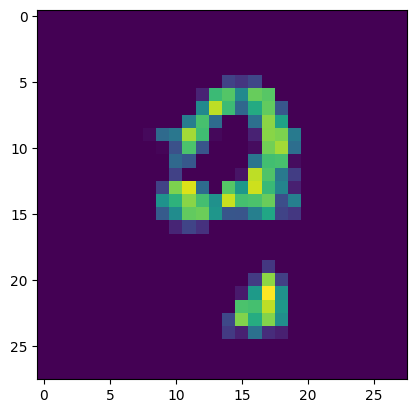


Epoch: 9 | Learning Rate: 0.001
0.05176154524087906
0.05560195446014404
0.054026588797569275
0.056978121399879456
0.05442626029253006
0.0524870902299881
0.05392453446984291
0.05141071230173111
0.05317062512040138
0.05256247520446777
0.05226330831646919
0.05412517488002777
0.05321371555328369
0.054370734840631485
0.05167664214968681
0.0549677237868309
0.05375352129340172
0.04780389368534088
0.05029485002160072
0.05327216908335686
0.05373247340321541
0.053726520389318466
0.05469765514135361
0.05416933819651604
0.05267181247472763
0.052405666559934616
0.051817722618579865
0.04962477460503578
0.04992195963859558
0.052332933992147446
0.05690594017505646
0.05060334876179695
0.05279753357172012
0.051920533180236816
0.05159817263484001
0.049839798361063004
0.04976451024413109
0.04826122894883156
0.05149334296584129
0.04855358228087425
0.049182064831256866
0.0496840626001358
0.05301845073699951
0.049363408237695694
0.053045038133859634
0.05172139033675194
0.05089248716831207
0.0504101589322090

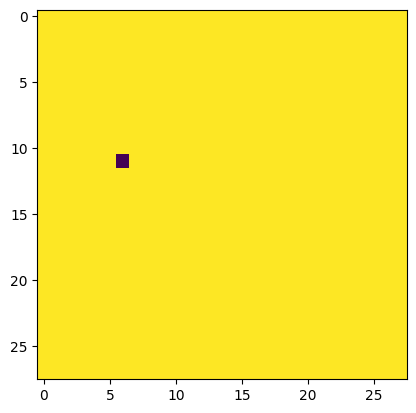


Epoch: 10 | Learning Rate: 0.001
0.04754466935992241
0.04930069297552109
0.050039250403642654
0.049817219376564026
0.04991503432393074
0.05066298693418503
0.051045458763837814
0.04898478835821152
0.05071870610117912
0.04937480390071869
0.051010869443416595
0.048294659703969955
0.05279375612735748
0.04399983957409859
0.04873858392238617
0.046072278171777725
0.05307876691222191
0.047580260783433914
0.048550885170698166
0.05163593962788582
0.04802704602479935
0.05147377774119377
0.04870642349123955
0.05127958208322525
0.04823780059814453
0.049098528921604156
0.052278902381658554
0.047488804906606674
0.04932643845677376
0.05045564845204353
0.0457356832921505
0.04794720187783241
0.051483575254678726
0.04729472100734711
0.046840958297252655
0.0484931506216526
0.04843032360076904
0.050558846443891525
0.04797373712062836
0.048241473734378815
0.04815572127699852
0.04967812821269035
0.051138848066329956
0.052292220294475555
0.04962700977921486
0.048069871962070465
0.05208296701312065
0.04855421

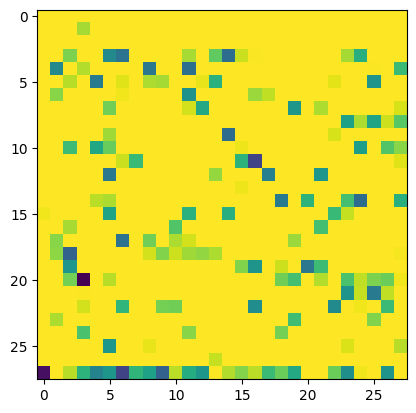


Epoch: 11 | Learning Rate: 0.0008
0.04729444906115532
0.04671807214617729
0.044980067759752274
0.04553559422492981
0.049405209720134735
0.048346806317567825
0.048447560518980026
0.04818445071578026
0.04352537915110588
0.04765394330024719
0.04886522889137268
0.04709369316697121
0.048820070922374725
0.04616319388151169
0.04445761814713478
0.048938456922769547
0.04634946957230568
0.05016933009028435
0.04319044575095177
0.047028254717588425
0.04709124565124512
0.045910581946372986
0.04963253065943718
0.0492706298828125
0.047468557953834534
0.044611141085624695
0.04354308173060417
0.045820366591215134
0.04774421453475952
0.050069671124219894
0.04551205411553383
0.04845459386706352
0.046794842928647995
0.0446489080786705
0.04577166587114334
0.04834336042404175
0.04461318999528885
0.04769158735871315
0.0485680028796196
0.04646500572562218
0.0467737577855587
0.047006357461214066
0.04562753066420555
0.049426961690187454
0.0437236949801445
0.04542933404445648
0.04790524020791054
0.0444808155298

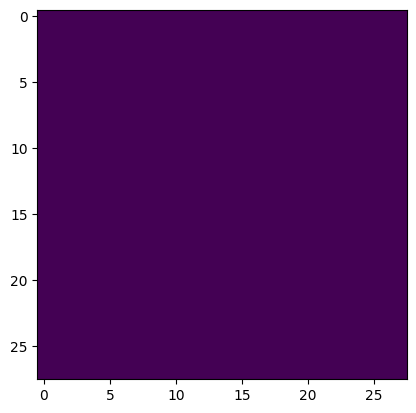


Epoch: 12 | Learning Rate: 0.0008
0.04647735133767128
0.04281222075223923
0.04722292348742485
0.049729444086551666
0.044385876506567
0.04481516778469086
0.04811786487698555
0.046000462025403976
0.044810570776462555
0.04567914083600044
0.044445816427469254
0.0460386760532856
0.04454526677727699
0.043751735240221024
0.04264838621020317
0.043713778257369995
0.046192556619644165
0.04824138060212135
0.04694826155900955
0.04713854566216469
0.04359506070613861
0.04693884775042534
0.04539971053600311
0.041732024401426315
0.044044338166713715
0.041558343917131424
0.04425692930817604
0.04187346249818802
0.04415762424468994
0.04523182660341263
0.044852644205093384
0.046323757618665695
0.044465072453022
0.047078490257263184
0.04050564765930176
0.04524792358279228
0.04303327202796936
0.044820427894592285
0.04172276332974434
0.04602976515889168
0.04273784160614014
0.04143848642706871
0.04275670647621155
0.042331449687480927
0.04743271321058273
0.04479166865348816
0.042973536998033524
0.046619620174

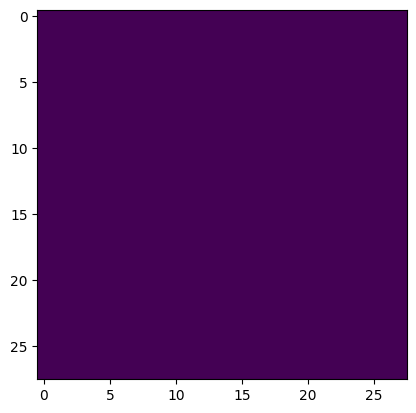


Epoch: 13 | Learning Rate: 0.0008
0.04570368677377701
0.04468290135264397
0.043033894151449203
0.04421928524971008
0.042480044066905975
0.04496271535754204
0.04730484262108803
0.047810181975364685
0.04486336559057236
0.043976422399282455
0.04077116772532463
0.04517725855112076
0.043362122029066086
0.04302695766091347
0.04705936834216118
0.04370255768299103
0.044753298163414
0.042290542274713516
0.044018324464559555
0.0434320792555809
0.043198637664318085
0.045921821147203445
0.04519454389810562
0.04238711670041084
0.04176332801580429
0.042165424674749374
0.04347817599773407
0.04122670739889145
0.04135232791304588
0.047249436378479004
0.041286714375019073
0.044618356972932816
0.04844995215535164
0.044697050005197525
0.04390779882669449
0.043819084763526917
0.04243669658899307
0.04455334320664406
0.04277076572179794
0.044633325189352036
0.042392194271087646
0.039199989289045334
0.043910350650548935
0.0415828563272953
0.044120125472545624
0.04562270641326904
0.04387636482715607
0.0432765

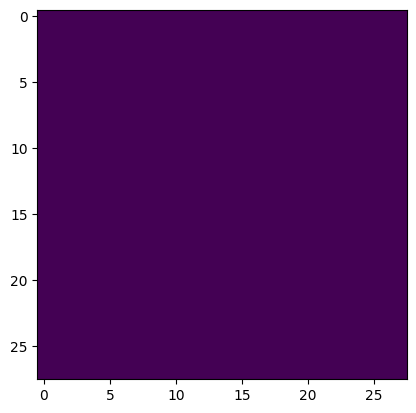


Epoch: 14 | Learning Rate: 0.0008
0.0420408770442009
0.04477621614933014
0.04183502867817879
0.044029586017131805
0.04210633039474487
0.04296994209289551
0.04277913272380829
0.044072456657886505
0.04453082010149956
0.04258285090327263
0.04323362559080124
0.040681734681129456
0.03995097801089287
0.04519946500658989
0.041458532214164734
0.045640651136636734
0.041860759258270264
0.041932929307222366
0.044613633304834366
0.039684757590293884
0.04109380766749382
0.04216161370277405
0.04365124553442001
0.0402657687664032
0.04173153266310692
0.042976949363946915
0.0418035052716732
0.043787963688373566
0.043242424726486206
0.0445219911634922
0.040216341614723206
0.040932849049568176
0.04084865376353264
0.03965846449136734
0.04247291013598442
0.041825197637081146
0.0394229032099247
0.0416148342192173
0.041839394718408585
0.04068942740559578
0.04046060889959335
0.043554700911045074
0.0442371666431427
0.04256517440080643
0.042910512536764145
0.038547419011592865
0.039640527218580246
0.0423751436

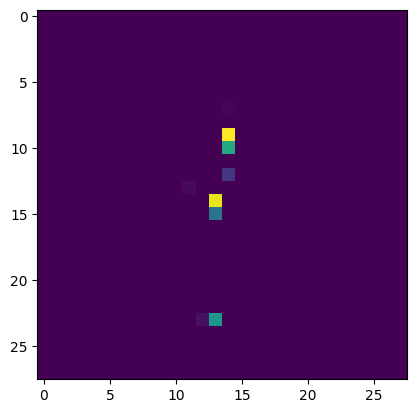


Epoch: 15 | Learning Rate: 0.0008
0.03972815349698067
0.04269145056605339
0.04264996945858002
0.03803342580795288
0.04105031490325928
0.04046573489904404
0.04083020240068436
0.04212331026792526
0.040459249168634415
0.037805717438459396
0.03832435607910156
0.04013412445783615
0.04229579120874405
0.04223638027906418
0.04382464289665222
0.04230310395359993
0.03583058714866638
0.04136623442173004
0.038952507078647614
0.0405527725815773
0.04046933725476265
0.04141749441623688
0.042860399931669235
0.042006753385066986
0.039914000779390335
0.041141100227832794
0.039460185915231705
0.04248110204935074
0.0416189506649971
0.04246381297707558
0.043254971504211426
0.03884665668010712
0.04256565496325493
0.04121919348835945
0.04078366607427597
0.04049418494105339
0.045153021812438965
0.03848998248577118
0.04293647035956383
0.04322588071227074
0.0431063249707222
0.03949159011244774
0.0425432063639164
0.04150628298521042
0.04143064096570015
0.041323866695165634
0.0435415655374527
0.0405193492770195


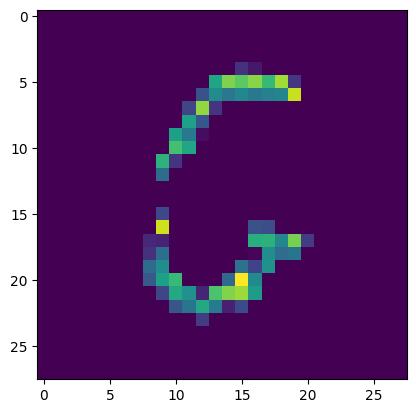


Epoch: 16 | Learning Rate: 0.0008
0.044129930436611176
0.03887741267681122
0.041278254240751266
0.04255305975675583
0.04015515372157097
0.04012327641248703
0.037382058799266815
0.04400543123483658
0.04297439381480217
0.03876892849802971
0.03837033733725548
0.0395997017621994
0.0400039404630661
0.038524456322193146
0.040673453360795975
0.04110752418637276
0.0401252917945385
0.03730045631527901
0.035353884100914
0.03761080652475357
0.04061155021190643
0.04034450650215149
0.03758786618709564
0.04169752076268196
0.03734561428427696
0.04043390974402428
0.0364895798265934
0.042150501161813736
0.03945871815085411
0.04299154877662659
0.0386248454451561
0.039581548422575
0.03988150507211685
0.0376492403447628
0.03952832147479057
0.036595314741134644
0.042580459266901016
0.041842736303806305
0.03820236772298813
0.03947046399116516
0.041358500719070435
0.04027480632066727
0.03893391415476799
0.03682314231991768
0.038891252130270004
0.03785795345902443
0.04063059762120247
0.038394395262002945
0.0

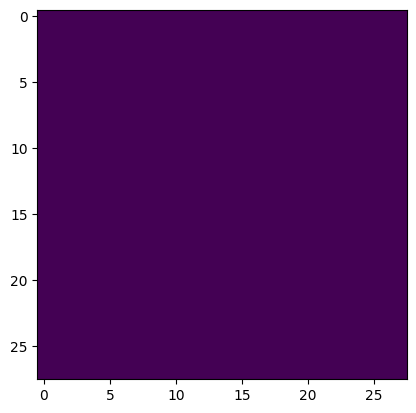


Epoch: 17 | Learning Rate: 0.0008
0.03610756993293762
0.03789146989583969
0.04123210906982422
0.04136308282613754
0.04035498946905136
0.03799545019865036
0.039794228971004486
0.03811950981616974
0.039511844515800476
0.03839883580803871
0.03766492009162903
0.039918795228004456
0.0406990684568882
0.038730863481760025
0.0395418144762516
0.040216390043497086
0.04024636745452881
0.04195218160748482
0.03952224925160408
0.038346197456121445
0.037877995520830154
0.038504067808389664
0.04143992066383362
0.040027305483818054
0.037411902099847794
0.03768695890903473
0.04096579924225807
0.03964992240071297
0.040668487548828125
0.03757594898343086
0.04188286513090134
0.04010051488876343
0.039609458297491074
0.03993333503603935
0.039367157965898514
0.04015009105205536
0.03944862633943558
0.03743914142251015
0.037019845098257065
0.038358766585588455
0.03613896295428276
0.03887229040265083
0.04032743722200394
0.03899700567126274
0.03793473541736603
0.03903329372406006
0.0387532114982605
0.04007899761

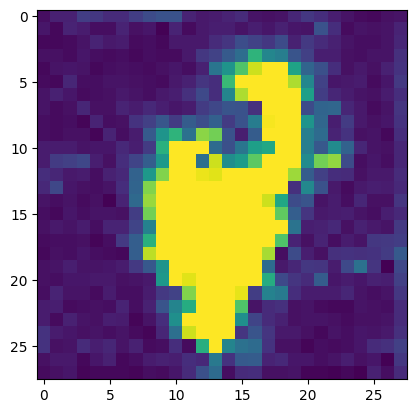


Epoch: 18 | Learning Rate: 0.0008
0.03686540573835373
0.0392206534743309
0.036973897367715836
0.03662590682506561
0.03719118982553482
0.03678518906235695
0.03587085381150246
0.03775578364729881
0.03638118878006935
0.03926243633031845
0.035694148391485214
0.04130017012357712
0.036393627524375916
0.03763294219970703
0.037438079714775085
0.03734210878610611
0.03714112937450409
0.036832068115472794
0.03903956338763237
0.03908969834446907
0.03752632811665535
0.0378502756357193
0.03801000863313675
0.03673181310296059
0.036607615649700165
0.03676090016961098
0.037249770015478134
0.041148215532302856
0.03934340178966522
0.04056393727660179
0.03821651637554169
0.04017743095755577
0.03693347051739693
0.037729982286691666
0.037476859986782074
0.03593630716204643
0.03648269549012184
0.037235308438539505
0.038355689495801926
0.037355415523052216
0.03901739418506622
0.03764541819691658
0.038390208035707474
0.03495340794324875
0.037081487476825714
0.03597729280591011
0.03757864609360695
0.0386915765

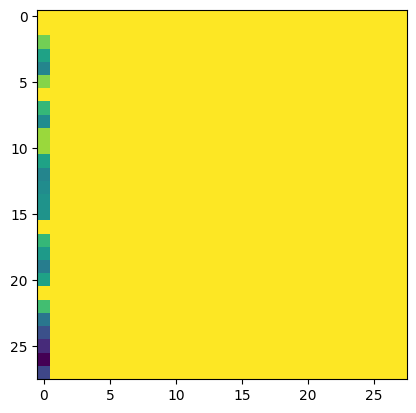


Epoch: 19 | Learning Rate: 0.0008
0.03530844300985336
0.03897510841488838
0.035176314413547516
0.033815231174230576
0.035737499594688416
0.037403613328933716
0.036985643208026886
0.035460639744997025
0.03703898563981056
0.035545531660318375
0.032579295337200165
0.03651554137468338
0.0354730598628521
0.038324665278196335
0.03615357726812363
0.03682272136211395
0.03597347065806389
0.0354577861726284
0.03706732019782066
0.03758712485432625
0.038467202335596085
0.03754287585616112
0.03964020311832428
0.03654324263334274
0.037599168717861176
0.03565984591841698
0.03781070187687874
0.03582678362727165
0.037201691418886185
0.03706555813550949
0.03564533218741417
0.03737322613596916
0.03463301435112953
0.032258111983537674
0.03472365066409111
0.03634022921323776
0.03586088865995407
0.03535989671945572
0.03817899152636528
0.03652721270918846
0.036352820694446564
0.03596765547990799
0.03644265979528427
0.0373830609023571
0.034908220171928406
0.03784802183508873
0.03684182092547417
0.03553130477

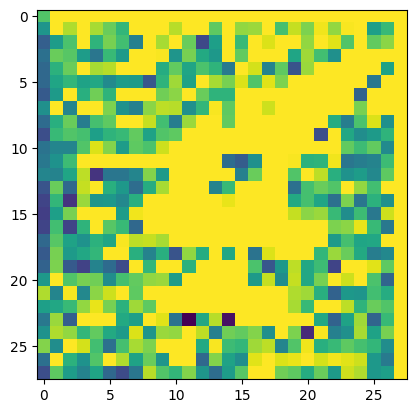


Epoch: 20 | Learning Rate: 0.0008
0.035666607320308685
0.037363652139902115
0.03628862649202347
0.03661550208926201
0.03654994070529938
0.03332699090242386
0.0347818061709404
0.03404632955789566
0.03550925850868225
0.036345601081848145
0.035733453929424286
0.03672894835472107
0.03718799352645874
0.0373227596282959
0.034704167395830154
0.03727284073829651
0.036449965089559555
0.035649336874485016
0.035786498337984085
0.03514491766691208
0.034822795540094376
0.03672328591346741
0.03625991567969322
0.034957822412252426
0.036554545164108276
0.035706378519535065
0.034151989966630936
0.03834090381860733
0.03614681586623192
0.036505963653326035
0.03604474663734436
0.03677034378051758
0.036784566938877106
0.03798611834645271
0.03796442970633507
0.03624174743890762
0.035023387521505356
0.0359392873942852
0.03799034655094147
0.03475683182477951
0.03710220381617546
0.03472898527979851
0.03418910503387451
0.03496864438056946
0.03423842415213585
0.036707788705825806
0.03708089143037796
0.035862572

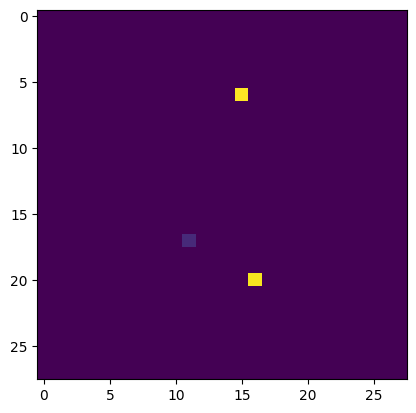


Epoch: 21 | Learning Rate: 0.00064
0.03653554618358612
0.03528652340173721
0.033799391239881516
0.03427399694919586
0.037075940519571304
0.03609316796064377
0.0336291640996933
0.03631516918540001
0.034569866955280304
0.03393207862973213
0.03561684861779213
0.03407680615782738
0.03463795781135559
0.035891324281692505
0.03532932326197624
0.037104424089193344
0.03587774932384491
0.03639809787273407
0.035865139216184616
0.03787171095609665
0.03427373245358467
0.03497497737407684
0.0343983992934227
0.0348384827375412
0.03479903191328049
0.03427235782146454
0.03747708350419998
0.034371696412563324
0.03659634292125702
0.03390161693096161
0.037240710109472275
0.035860586911439896
0.03705978021025658
0.03480438143014908
0.03427224978804588
0.036149196326732635
0.03446163982152939
0.034925080835819244
0.03445719555020332
0.03514759987592697
0.033818669617176056
0.033669374883174896
0.03510245680809021
0.03501652181148529
0.03742370381951332
0.035684093832969666
0.03496607020497322
0.03553986549

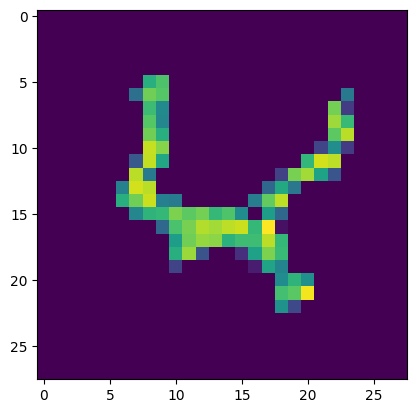


Epoch: 22 | Learning Rate: 0.00064
0.03224889561533928
0.03606673702597618
0.033322133123874664
0.034523818641901016
0.03379812836647034
0.033286113291978836
0.03547493368387222
0.035685207694768906
0.035061150789260864
0.03413441777229309
0.037139277905225754
0.03319482132792473
0.03422357887029648
0.03706294670701027
0.03563709184527397
0.035236906260252
0.0335443839430809
0.03468698635697365
0.03578149527311325
0.033826351165771484
0.03599925711750984
0.035771552473306656
0.03544681891798973
0.036724355071783066
0.03576624393463135
0.03276729956269264
0.0331217497587204
0.0376008078455925
0.035167526453733444
0.03611435368657112
0.03567969426512718
0.037156689912080765
0.035569045692682266
0.03459331393241882
0.03341444954276085
0.036781661212444305
0.036856044083833694
0.036507248878479004
0.03407563269138336
0.0344715416431427
0.03643505275249481
0.03310444951057434
0.03400326520204544
0.035928525030612946
0.03656777739524841
0.034104254096746445
0.03369443863630295
0.03338060155

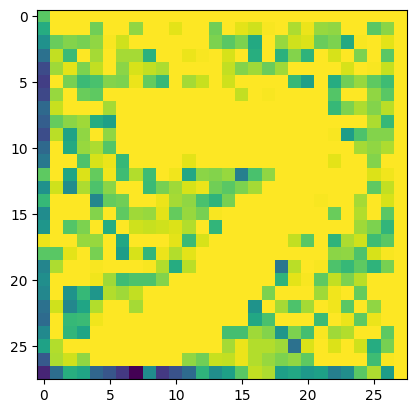


Epoch: 23 | Learning Rate: 0.00064
0.036315660923719406
0.03424584120512009
0.034885965287685394
0.0357104130089283
0.036186929792165756
0.037711672484874725
0.03605656698346138
0.034893929958343506
0.03326170891523361
0.03599577024579048
0.03493095934391022
0.033644404262304306
0.03600228577852249
0.036040905863046646
0.0333755686879158
0.033098820596933365
0.03595051169395447
0.034891556948423386
0.03533950448036194
0.03348686173558235
0.0322505459189415
0.033035650849342346
0.03390848636627197
0.03507767990231514
0.036515649408102036
0.03300905600190163
0.03512600064277649
0.036094795912504196
0.03857499733567238
0.034904494881629944
0.0342622846364975
0.03328952193260193
0.034263726323843
0.03643885999917984
0.03540723770856857
0.03116285800933838
0.03378826007246971
0.03403279557824135
0.0346393808722496
0.03424374386668205
0.03595622256398201
0.03435827046632767
0.03383485600352287
0.031792908906936646
0.03441089391708374
0.034208882600069046
0.03596140444278717
0.03369207680225

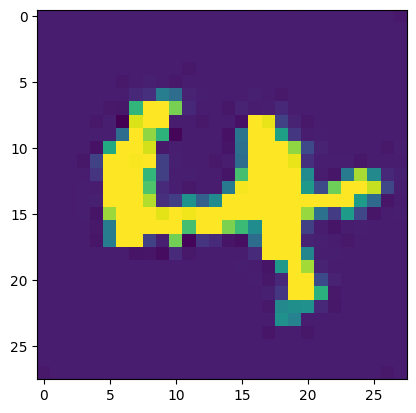


Epoch: 24 | Learning Rate: 0.00064
0.034162282943725586
0.035444486886262894
0.03696295619010925
0.03325716033577919
0.03534110262989998
0.03463032841682434
0.03407496213912964
0.03317045792937279
0.033856745809316635
0.03548155352473259
0.03388415649533272
0.0327085517346859
0.03413153067231178
0.03320374712347984
0.03481382131576538
0.03403446450829506
0.033286500722169876
0.033772047609090805
0.036932323127985
0.03411237895488739
0.03550664335489273
0.0315864160656929
0.0349622443318367
0.031143859028816223
0.032430052757263184
0.03465663641691208
0.032126519829034805
0.0333976075053215
0.03410220518708229
0.034649867564439774
0.034609414637088776
0.03267059847712517
0.033605270087718964
0.03605202957987785
0.035392966121435165
0.03423908352851868
0.03583148494362831
0.03070356510579586
0.03469409421086311
0.03712237998843193
0.03313693031668663
0.034278836101293564
0.03403627872467041
0.03285900875926018
0.032369427382946014
0.03229229524731636
0.03406878933310509
0.03507200628519

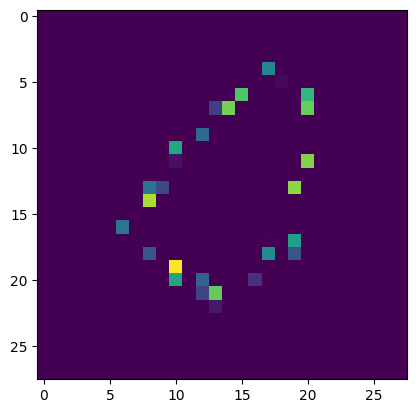


Epoch: 25 | Learning Rate: 0.00064
0.035265132784843445
0.0354766808450222
0.03249269351363182
0.03136691078543663
0.032520826905965805
0.032685428857803345
0.0360514335334301
0.037842586636543274
0.03234142065048218
0.032056450843811035
0.033973369747400284
0.032119590789079666
0.034269776195287704
0.03451709821820259
0.035039857029914856
0.036666713654994965
0.032576169818639755
0.03350244462490082
0.03412027284502983
0.03489772230386734
0.03348546475172043
0.0344281829893589
0.03184979781508446
0.03303467109799385
0.03294309601187706
0.03400266915559769
0.0329730249941349
0.033704329282045364
0.03326832130551338
0.03582796826958656
0.03351128473877907
0.03352334350347519
0.033270213752985
0.03407776355743408
0.03256741911172867
0.034903835505247116
0.03389328345656395
0.03393084555864334
0.03562485799193382
0.0323825404047966
0.03370600566267967
0.032726094126701355
0.036164335906505585
0.035278573632240295
0.03272561728954315
0.03338998928666115
0.03604528307914734
0.0322896726429

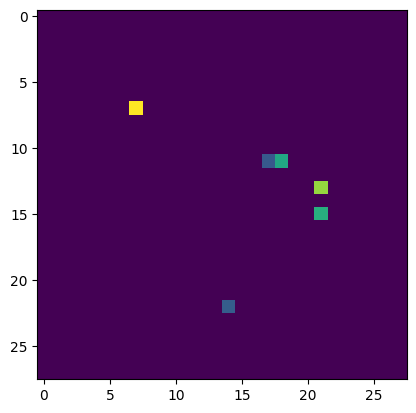


Epoch: 26 | Learning Rate: 0.00064
0.034977491945028305
0.03522513434290886
0.03548131510615349
0.03204364702105522
0.031912535429000854
0.034119803458452225
0.03433379903435707
0.03312098979949951
0.03177051991224289
0.03340718522667885
0.03424881398677826
0.03550027310848236
0.030795549973845482
0.0365646630525589
0.03423333168029785
0.032677728682756424
0.03353077545762062
0.03433529660105705
0.03301887586712837
0.0341486781835556
0.03295633941888809
0.03292153403162956
0.03218097612261772
0.03273703530430794
0.032488759607076645
0.03437139093875885
0.03383658453822136
0.03169821575284004
0.034740980714559555
0.03509494289755821
0.0360146127641201
0.032478198409080505
0.03501344472169876
0.03280128166079521
0.03280510753393173
0.030269751325249672
0.03530396893620491
0.03380284458398819
0.033797476440668106
0.0326516330242157
0.03402762487530708
0.03284990414977074
0.03256269171833992
0.034106187522411346
0.03581846505403519
0.03125244379043579
0.032524969428777695
0.03337669372558

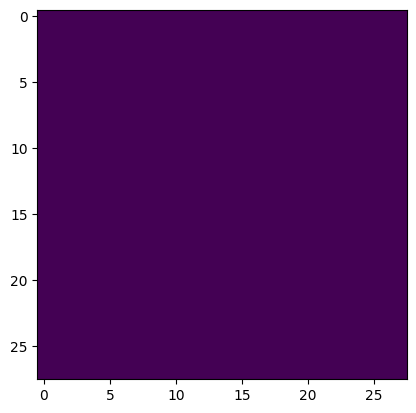


Epoch: 27 | Learning Rate: 0.00064
0.0318949855864048
0.033373888581991196
0.032634131610393524
0.033689506351947784
0.034370969980955124
0.033685073256492615
0.033015426248311996
0.03232574835419655
0.03707932308316231
0.0328342504799366
0.03220047801733017
0.03302290290594101
0.032703060656785965
0.03379485383629799
0.03339004144072533
0.03505229204893112
0.034039948135614395
0.03480594977736473
0.03448919951915741
0.03367236256599426
0.033881884068250656
0.03501822426915169
0.03334052115678787
0.03271491453051567
0.0316486582159996
0.031669918447732925
0.03231767565011978
0.03757421672344208
0.034828055649995804
0.03357120230793953
0.03367551788687706
0.03276576101779938
0.03331401199102402
0.03553129732608795
0.03323010355234146
0.032355211675167084
0.03339508920907974
0.03527486324310303
0.03312566876411438
0.032654326409101486
0.033393051475286484
0.032161224633455276
0.0344732366502285
0.03562798351049423
0.03377567604184151
0.032247040420770645
0.03089938871562481
0.0317201353

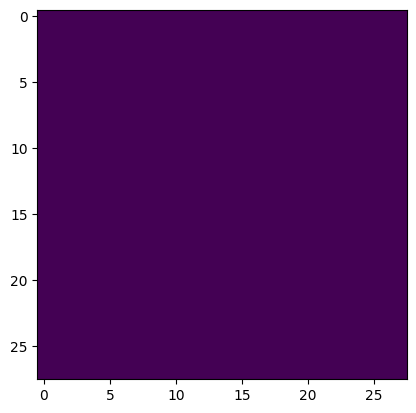


Epoch: 28 | Learning Rate: 0.00064
0.03076251596212387
0.03388332575559616
0.03399534150958061
0.03263062238693237
0.030719544738531113
0.03322912007570267
0.0337546244263649
0.03314163535833359
0.0316443108022213
0.031468961387872696
0.030912581831216812
0.034533437341451645
0.0324634425342083
0.03421611711382866
0.031855303794145584
0.03330254927277565
0.031486596912145615
0.031018460169434547
0.03132784366607666
0.03322034329175949
0.033737681806087494
0.033394116908311844
0.030798690393567085
0.03397651016712189
0.032043445855379105
0.031302474439144135
0.03249666839838028
0.030033893883228302
0.03367247432470322
0.03212069720029831
0.032347407191991806
0.03300424665212631
0.03361719846725464
0.033966246992349625
0.03204643353819847
0.033762212842702866
0.03161751106381416
0.03441235050559044
0.03200078010559082
0.03220749646425247
0.030999576672911644
0.032951656728982925
0.031853485852479935
0.03377646580338478
0.03126727417111397
0.032953545451164246
0.03431102633476257
0.03376

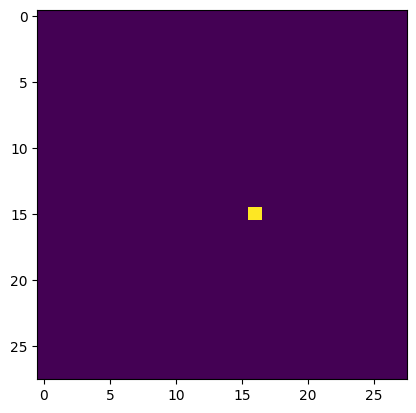


Epoch: 29 | Learning Rate: 0.00064
0.032540999352931976
0.03441011160612106
0.03361344709992409
0.031495802104473114
0.03137117624282837
0.03524605929851532
0.032420091331005096
0.03459171950817108
0.030580071732401848
0.032418906688690186
0.031419023871421814
0.03154658153653145
0.03470350801944733
0.032438285648822784
0.03176416456699371
0.031678132712841034
0.03376040980219841
0.030297819525003433
0.034888479858636856
0.03276276960968971
0.03058125078678131
0.03320440277457237
0.033450208604335785
0.03258470073342323
0.033272095024585724
0.031135544180870056
0.031119000166654587
0.032763805240392685
0.03255046531558037
0.03351173922419548
0.03380395844578743
0.032040856778621674
0.03176060691475868
0.0314384363591671
0.033174317330121994
0.03611838445067406
0.03234485164284706
0.03276333957910538
0.03201445937156677
0.03367015719413757
0.03335459530353546
0.032059021294116974
0.03253752738237381
0.03213585168123245
0.03233018517494202
0.032402291893959045
0.03169883415102959
0.0299

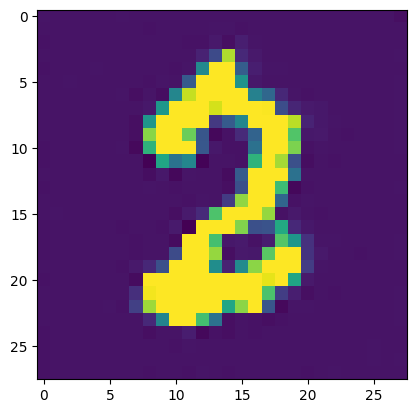


Epoch: 30 | Learning Rate: 0.00064
0.03249877318739891
0.03245412930846214
0.033917203545570374
0.030592406168580055
0.03169260546565056
0.032839685678482056
0.033972643315792084
0.03217235580086708
0.03177747502923012
0.03290926292538643
0.031379152089357376
0.030555812641978264
0.03125046193599701
0.03343134745955467
0.03185863047838211
0.032324519008398056
0.030525585636496544
0.032933007925748825
0.03233283385634422
0.03131667152047157
0.03635089099407196
0.03347920998930931
0.033893704414367676
0.03286946937441826
0.034764859825372696
0.03194233402609825
0.0333673469722271
0.03198837488889694
0.032297346740961075
0.03291552886366844
0.03521816059947014
0.03338873013854027
0.031874801963567734
0.03371887281537056
0.03429125249385834
0.03248434513807297
0.03395800292491913
0.03354340046644211
0.0332568883895874
0.03488153591752052
0.032888054847717285
0.03394614905118942
0.03239801526069641
0.03283364698290825
0.03204098716378212
0.033003851771354675
0.03373350203037262
0.033673927

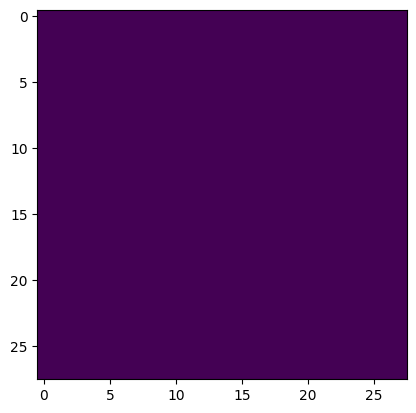


Epoch: 31 | Learning Rate: 0.0005120000000000001
0.03410611301660538
0.03238869830965996
0.036195628345012665
0.03049713931977749
0.03429422155022621
0.03356985002756119
0.03383798897266388
0.035384196788072586
0.03502155467867851
0.03177982196211815
0.03186244145035744
0.03330788016319275
0.033126868307590485
0.031882498413324356
0.031006496399641037
0.031256962567567825
0.031119585037231445
0.031777456402778625
0.03533489629626274
0.0314541719853878
0.030901333317160606
0.032684314996004105
0.030188795179128647
0.031352534890174866
0.033033814281225204
0.032897479832172394
0.03450297191739082
0.03365206718444824
0.029613522812724113
0.030618106946349144
0.030958911404013634
0.03220663592219353
0.029752092435956
0.031554993242025375
0.030126459896564484
0.03389286622405052
0.032474204897880554
0.031922392547130585
0.03132610023021698
0.030077286064624786
0.0328083373606205
0.0313350185751915
0.029766466468572617
0.030780095607042313
0.031971946358680725
0.03327382728457451
0.03247865

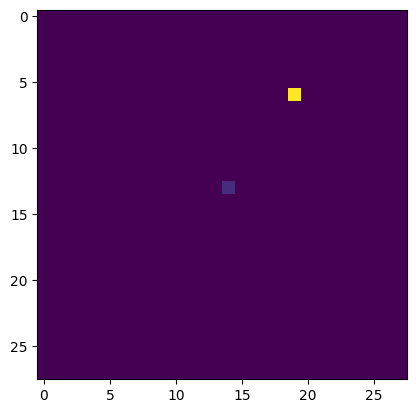


Epoch: 32 | Learning Rate: 0.0005120000000000001
0.033808231353759766
0.03214709088206291
0.031869154423475266
0.031703248620033264
0.032228853553533554
0.03197415545582771
0.033644214272499084
0.03275102376937866
0.03165474534034729
0.03169570118188858
0.03507222980260849
0.03316690772771835
0.03005806915462017
0.03570408746600151
0.03108079917728901
0.03456971421837807
0.03332763537764549
0.032006651163101196
0.03386281058192253
0.03032733127474785
0.03279082104563713
0.03268963843584061
0.030514797195792198
0.032591141760349274
0.03087315708398819
0.033292338252067566
0.029201090335845947
0.03187726065516472
0.03351961448788643
0.03107939474284649
0.035246990621089935
0.03228902071714401
0.02954483963549137
0.03157253563404083
0.032749611884355545
0.030494119971990585
0.032974425703287125
0.030673496425151825
0.029570769518613815
0.0319826640188694
0.032910000532865524
0.03360337018966675
0.030706647783517838
0.03427545726299286
0.03189743682742119
0.030725138261914253
0.0304717626

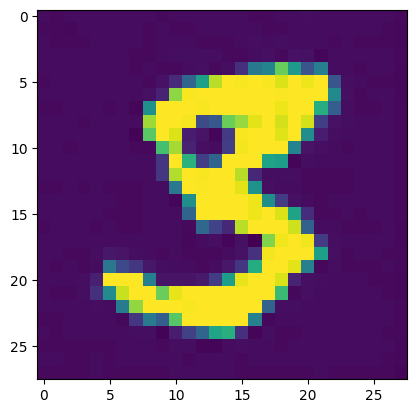


Epoch: 33 | Learning Rate: 0.0005120000000000001
0.031160682439804077
0.030570002272725105
0.030540943145751953
0.033088319003582
0.029904544353485107
0.030848737806081772
0.03346927836537361
0.03156910836696625
0.033431656658649445
0.030492885038256645
0.030239522457122803
0.029761839658021927
0.03170039504766464
0.03276006132364273
0.03200269490480423
0.03328019753098488
0.032315369695425034
0.03092854842543602
0.03419884294271469
0.03250010684132576
0.03298560529947281
0.033068351447582245
0.03103475086390972
0.033067405223846436
0.030383853241801262
0.033039774745702744
0.03175022453069687
0.034412555396556854
0.03235090151429176
0.032352473586797714
0.03078560158610344
0.031156515702605247
0.029790440574288368
0.032646533101797104
0.031435541808605194
0.031139275059103966
0.03224819153547287
0.03336922824382782
0.030202694237232208
0.028892727568745613
0.031012021005153656
0.03339865803718567
0.03356029838323593
0.034845221787691116
0.03243200108408928
0.030403491109609604
0.0313

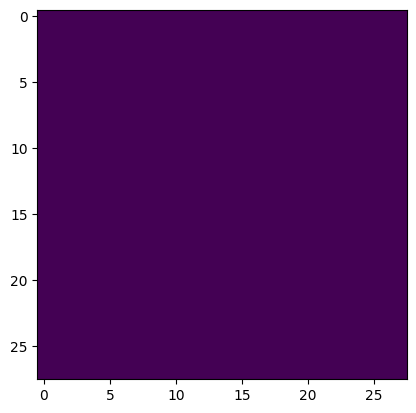


Epoch: 34 | Learning Rate: 0.0005120000000000001
0.032399944961071014
0.0318685881793499
0.031775813549757004
0.03125075623393059
0.03301149234175682
0.0321759395301342
0.03415979444980621
0.029528310522437096
0.03180094435811043
0.030995968729257584
0.03334517776966095
0.03101194091141224
0.03195616975426674
0.032671209424734116
0.02980143576860428
0.029514670372009277
0.03264704346656799
0.031373344361782074
0.029621677473187447
0.031554657965898514
0.03165482357144356
0.03161683678627014
0.032968033105134964
0.035532061010599136
0.031228184700012207
0.0313434824347496
0.028964901342988014
0.03215337172150612
0.03154195845127106
0.03250792622566223
0.029500074684619904
0.03164902329444885
0.029790282249450684
0.031239239498972893
0.03156094253063202
0.03413567692041397
0.028971748426556587
0.03282192349433899
0.03293027728796005
0.032092150300741196
0.030675888061523438
0.030907437205314636
0.030906734988093376
0.031203176826238632
0.02984621934592724
0.030855722725391388
0.03040552

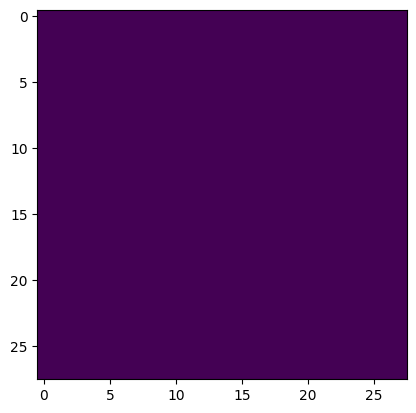


Epoch: 35 | Learning Rate: 0.0005120000000000001
0.033201009035110474
0.030944127589464188
0.030975019559264183
0.03225421532988548
0.02969837561249733
0.02989983558654785
0.032736554741859436
0.03386412188410759
0.03152073919773102
0.031538885086774826
0.032309480011463165
0.030743734911084175
0.030205633491277695
0.03316013887524605
0.032323312014341354
0.03340522199869156
0.03050343319773674
0.031396783888339996
0.03058326616883278
0.032365258783102036
0.032603949308395386
0.030199330300092697
0.033890675753355026
0.031200425699353218
0.029783427715301514
0.03257109224796295
0.03132765740156174
0.03089713677763939
0.030743567273020744
0.03234173730015755
0.028948437422513962
0.033699534833431244
0.032174862921237946
0.030840083956718445
0.031776122748851776
0.032261960208415985
0.03153553605079651
0.03195889666676521
0.0308543648570776
0.03205433487892151
0.029738157987594604
0.030165569856762886
0.031165067106485367
0.030962038785219193
0.031118888407945633
0.033532001078128815
0.

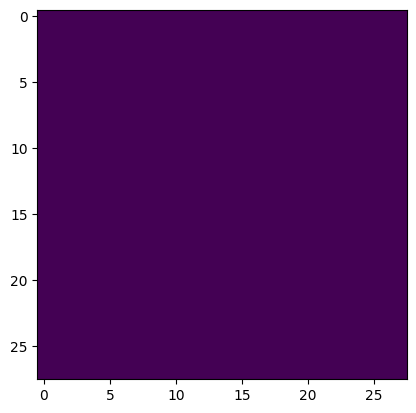


Epoch: 36 | Learning Rate: 0.0005120000000000001
0.031029753386974335
0.03271223604679108
0.027927128598093987
0.030819520354270935
0.029069729149341583
0.030272897332906723
0.0324520468711853
0.03025851398706436
0.03061789833009243
0.032828766852617264
0.029930410906672478
0.032233092933893204
0.03141670674085617
0.030987074598670006
0.03097527287900448
0.029511388391256332
0.03109697811305523
0.031438522040843964
0.03127167373895645
0.034512829035520554
0.029914699494838715
0.03207358345389366
0.0317535363137722
0.03126229718327522
0.03166691213846207
0.030145641416311264
0.03169703483581543
0.033301062881946564
0.031364284455776215
0.031204456463456154
0.03078969568014145
0.03204108774662018
0.03125967085361481
0.03160721808671951
0.030482452362775803
0.032340195029973984
0.03017384558916092
0.031981855630874634
0.029824301600456238
0.03323344141244888
0.03188636153936386
0.03193563222885132
0.030198732390999794
0.03163745254278183
0.031765878200531006
0.032525382936000824
0.031591

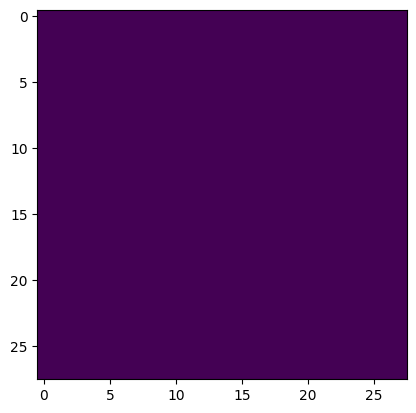


Epoch: 37 | Learning Rate: 0.0005120000000000001
0.031173361465334892
0.030433619394898415
0.030917858704924583
0.03294137865304947
0.03167696297168732
0.031648289412260056
0.02905881777405739
0.028540795668959618
0.03145483136177063
0.032682884484529495
0.03159140422940254
0.03349347040057182
0.034390728920698166
0.0317254401743412
0.03220687806606293
0.031712766736745834
0.03105004131793976
0.031613901257514954
0.03033420257270336
0.028749482706189156
0.031328704208135605
0.0328625813126564
0.03136847913265228
0.033423908054828644
0.030980104580521584
0.032350145280361176
0.03071633353829384
0.03326397389173508
0.03142983466386795
0.030552176758646965
0.03219586983323097
0.03244439512491226
0.03075629286468029
0.028854085132479668
0.02994905598461628
0.030970973894000053
0.031056225299835205
0.031613413244485855
0.031051985919475555
0.03374144807457924
0.03076571598649025
0.03301633894443512
0.03232043981552124
0.030393846333026886
0.031074216589331627
0.03248719125986099
0.03056490

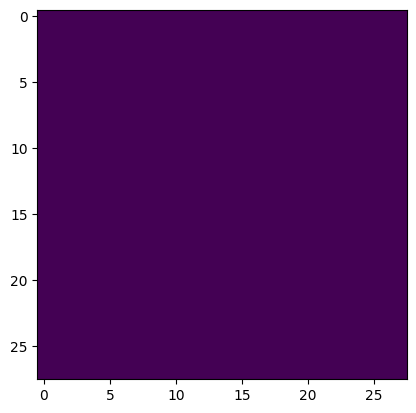


Epoch: 38 | Learning Rate: 0.0005120000000000001
0.031065935268998146
0.03321511670947075
0.03140975162386894
0.030860837548971176
0.030059147626161575
0.03037111461162567
0.02953929267823696
0.031040672212839127
0.031093645840883255
0.031174184754490852
0.03252995386719704
0.03031364269554615
0.030700333416461945
0.02857729233801365
0.029651014134287834
0.031060194596648216
0.03112715482711792
0.031560614705085754
0.032216474413871765
0.030305305495858192
0.032072097063064575
0.031147582456469536
0.030162859708070755
0.03067118301987648
0.03178752586245537
0.03160602226853371
0.029610244557261467
0.030762961134314537
0.03182200342416763
0.03134721890091896
0.032826900482177734
0.03056040033698082
0.032755184918642044
0.030981017276644707
0.030511626973748207
0.03132224082946777
0.03307584300637245
0.029499856755137444
0.03174517676234245
0.030768398195505142
0.03232245147228241
0.029174454510211945
0.031009620055556297
0.03124862164258957
0.030452532693743706
0.029392236843705177
0.0

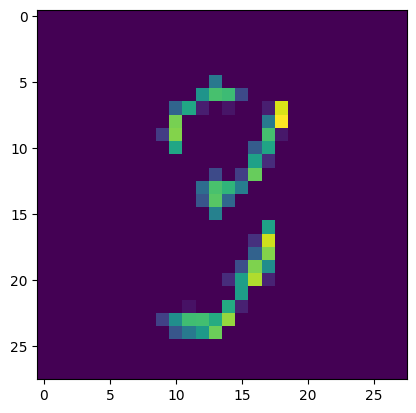


Epoch: 39 | Learning Rate: 0.0005120000000000001
0.032208479940891266
0.03127233684062958
0.029906174167990685
0.03223692998290062
0.030978182330727577
0.030138906091451645
0.032029327005147934
0.030013738200068474
0.030086204409599304
0.03066195175051689
0.03273579850792885
0.03122950904071331
0.029105791822075844
0.03150498494505882
0.03211310878396034
0.030796213075518608
0.030301867052912712
0.02869350090622902
0.03048068657517433
0.03272293880581856
0.03242156282067299
0.027208857238292694
0.029981721192598343
0.03436116501688957
0.03060600906610489
0.03253164887428284
0.03125925734639168
0.02866828627884388
0.030654696747660637
0.02991628088057041
0.030847441405057907
0.030797569081187248
0.030817639082670212
0.03265759348869324
0.029433688148856163
0.0313226692378521
0.030376585200428963
0.029422905296087265
0.030637288466095924
0.031124742701649666
0.030912606045603752
0.029343662783503532
0.03176236152648926
0.031413912773132324
0.029330190271139145
0.029646774753928185
0.030

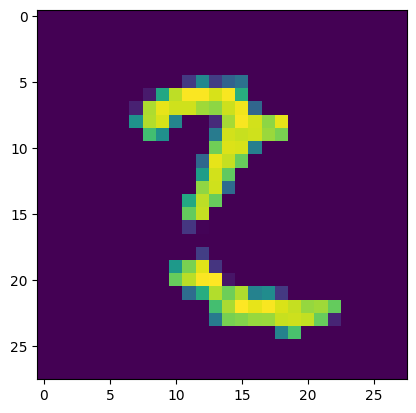


Epoch: 40 | Learning Rate: 0.0005120000000000001
0.030430087819695473
0.02990001067519188
0.029042497277259827
0.02911190316081047
0.03136565536260605
0.030020752921700478
0.030881423503160477
0.03260742872953415
0.0308810044080019
0.03094877116382122
0.031070344150066376
0.03226950019598007
0.02991863526403904
0.03189009055495262
0.031610630452632904
0.03230644762516022
0.030750015750527382
0.032795753329992294
0.030633794143795967
0.028903868049383163
0.03252222016453743
0.032300811260938644
0.029417436569929123
0.03295212611556053
0.031200388446450233
0.03005323000252247
0.03282378986477852
0.03044120967388153
0.0323517769575119
0.032449785619974136
0.02960507571697235
0.031049618497490883
0.033038217574357986
0.030989114195108414
0.032196782529354095
0.030066167935729027
0.030638689175248146
0.03164655342698097
0.030581410974264145
0.03291651979088783
0.03233962506055832
0.02948938123881817
0.029517576098442078
0.033135607838630676
0.031017808243632317
0.031314726918935776
0.03145

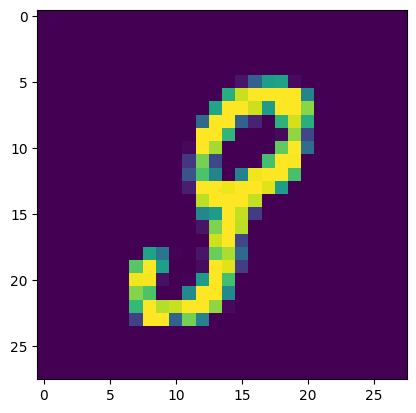


Epoch: 41 | Learning Rate: 0.0004096000000000001
0.03024008311331272
0.030323943123221397
0.029939066618680954
0.03140396624803543
0.029989127069711685
0.03169287368655205
0.030903786420822144
0.03344877436757088
0.029718268662691116
0.02991458773612976
0.030841413885354996
0.031387463212013245
0.03131687268614769
0.032235462218523026
0.029536783695220947
0.03182259202003479
0.031072942540049553
0.030790768563747406
0.030394013971090317
0.029594941064715385
0.030202459543943405
0.0331733301281929
0.03118003159761429
0.030575605109333992
0.029949557036161423
0.03256307169795036
0.032594870775938034
0.030546601861715317
0.029525501653552055
0.03031253255903721
0.03127042576670647
0.03135114535689354
0.030399151146411896
0.028995998203754425
0.02916145697236061
0.031935159116983414
0.030878357589244843
0.02953515201807022
0.03276132419705391
0.031549759209156036
0.03152357414364815
0.030215946957468987
0.032112009823322296
0.032313138246536255
0.030771570280194283
0.031072426587343216
0.

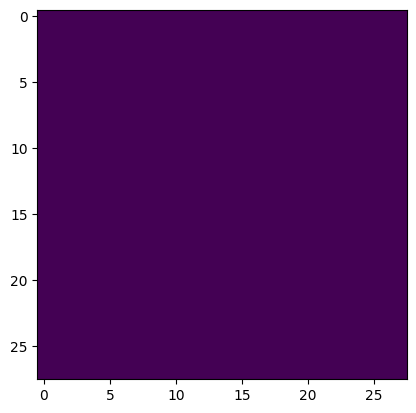


Epoch: 42 | Learning Rate: 0.0004096000000000001
0.028776999562978745
0.03330689296126366
0.031201722100377083
0.031151728704571724
0.029557518661022186
0.029698923230171204
0.029449554160237312
0.030092164874076843
0.029458891600370407
0.030380481854081154
0.028691690415143967
0.03157857432961464
0.03270870819687843
0.029263634234666824
0.031238464638590813
0.029814038425683975
0.030446181073784828
0.029749667271971703
0.03327580541372299
0.028804907575249672
0.03064548224210739
0.03279554471373558
0.03163871541619301
0.030590487644076347
0.030282506719231606
0.03096872940659523
0.028972459957003593
0.029816314578056335
0.031026100739836693
0.029503244906663895
0.029484353959560394
0.031879693269729614
0.03147559612989426
0.0307714082300663
0.03043259121477604
0.031048336997628212
0.031177833676338196
0.03032199665904045
0.029943181201815605
0.030864613130688667
0.03001282550394535
0.030805788934230804
0.03059355914592743
0.03177998587489128
0.030514705926179886
0.03163491562008858
0

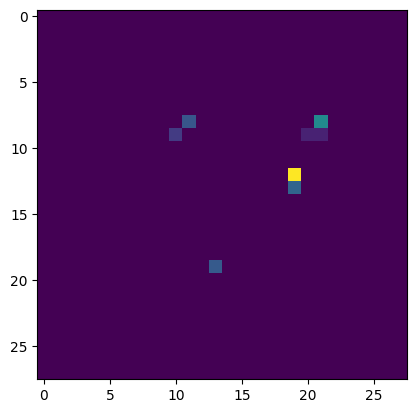


Epoch: 43 | Learning Rate: 0.0004096000000000001
0.02899974212050438
0.029935136437416077
0.03081117756664753
0.03028636798262596
0.030324358493089676
0.028054822236299515
0.031054556369781494
0.030482254922389984
0.030350591987371445
0.03085934743285179
0.032137081027030945
0.031202368438243866
0.030226346105337143
0.02999730408191681
0.03049962967634201
0.029546860605478287
0.03252960368990898
0.031849224120378494
0.031872402876615524
0.031997643411159515
0.03164270147681236
0.02862008847296238
0.031067300587892532
0.032488953322172165
0.03194480761885643
0.028591370210051537
0.03053220920264721
0.03290744125843048
0.032188642770051956
0.03136438503861427
0.03068394958972931
0.030669815838336945
0.031625013798475266
0.031481314450502396
0.030587760731577873
0.029226966202259064
0.03314253315329552
0.03216427564620972
0.030220065265893936
0.033148106187582016
0.03022274561226368
0.0313926599919796
0.02992808073759079
0.02983032912015915
0.030405374243855476
0.030339838936924934
0.031

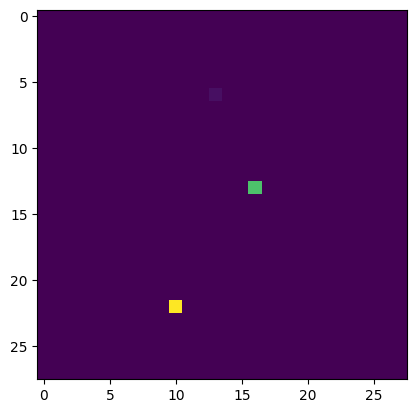


Epoch: 44 | Learning Rate: 0.0004096000000000001
0.03073430247604847
0.031257934868335724
0.02884087711572647
0.030714035034179688
0.032192766666412354
0.02917216718196869
0.03040449321269989
0.030882494524121284
0.029780883342027664
0.02971707098186016
0.02928125485777855
0.030627157539129257
0.030134741216897964
0.03103857859969139
0.030139965936541557
0.02901364304125309
0.030813192948698997
0.0325593464076519
0.031402863562107086
0.029855748638510704
0.030192919075489044
0.030664222314953804
0.03192823752760887
0.03071560524404049
0.03243964910507202
0.028772864490747452
0.031147725880146027
0.03003137931227684
0.028690515086054802
0.030327467247843742
0.03035939484834671
0.03224407508969307
0.032782766968011856
0.029684776440262794
0.030490726232528687
0.029318861663341522
0.02766505815088749
0.030666351318359375
0.030849171802401543
0.029030470177531242
0.030610118061304092
0.03211025521159172
0.029605252668261528
0.03149966150522232
0.03061494044959545
0.03027748316526413
0.029

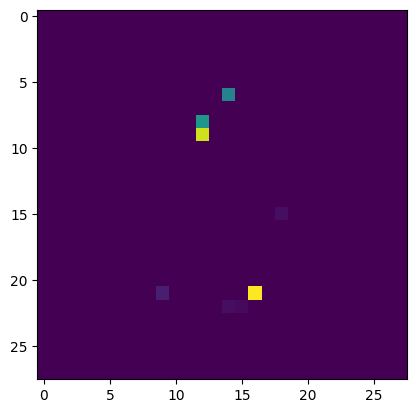


Epoch: 45 | Learning Rate: 0.0004096000000000001
0.029992051422595978
0.0308492761105299
0.029554512351751328
0.02991786226630211
0.030544506385922432
0.031682632863521576
0.031028781086206436
0.03184323012828827
0.029750999063253403
0.029339823871850967
0.030673984438180923
0.02973444014787674
0.029638037085533142
0.030455216765403748
0.029307719320058823
0.033098310232162476
0.031107673421502113
0.030712168663740158
0.03047037310898304
0.03086709976196289
0.030968431383371353
0.03182538226246834
0.031008144840598106
0.03178936243057251
0.031273722648620605
0.030792808160185814
0.031050583347678185
0.03053269349038601
0.02994683012366295
0.027445977553725243
0.03115026466548443
0.030476603657007217
0.029631569981575012
0.030238257721066475
0.030304281041026115
0.031072799116373062
0.0307933297008276
0.029879501089453697
0.028567761182785034
0.030734654515981674
0.030825123190879822
0.030779149383306503
0.031700991094112396
0.028628531843423843
0.03360877186059952
0.02922818996012211


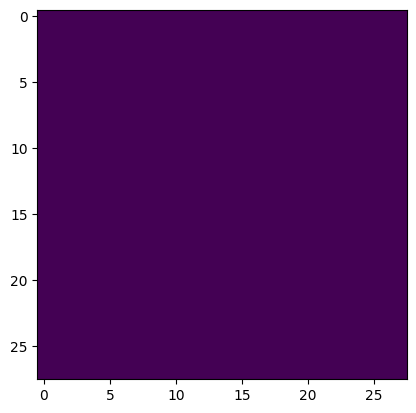


Epoch: 46 | Learning Rate: 0.0004096000000000001
0.030135627835989
0.027469255030155182
0.032199446111917496
0.03187190368771553
0.028135454282164574
0.03247332572937012
0.02924828790128231
0.031101331114768982
0.030245907604694366
0.029791412875056267
0.028666289523243904
0.031117646023631096
0.032497819513082504
0.032673731446266174
0.029809050261974335
0.030570438131690025
0.03278303146362305
0.03190859034657478
0.03154800832271576
0.03310833498835564
0.03188961371779442
0.03046170063316822
0.030978310853242874
0.03204577416181564
0.02968999184668064
0.027910899370908737
0.030301133170723915
0.030121512711048126
0.030091719701886177
0.03189850598573685
0.029618870466947556
0.03192581981420517
0.032899219542741776
0.029981661587953568
0.03021090477705002
0.030076252296566963
0.031142640858888626
0.029515881091356277
0.029309308156371117
0.03140648081898689
0.03185444325208664
0.03060225024819374
0.029637856408953667
0.029823319986462593
0.029063375666737556
0.030977720394730568
0.03

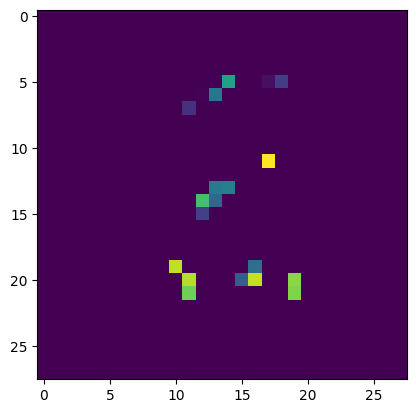


Epoch: 47 | Learning Rate: 0.0004096000000000001
0.027778619900345802
0.03155544772744179
0.02838418073952198
0.029314883053302765
0.029235228896141052
0.030965765938162804
0.03065427951514721
0.029229825362563133
0.02832258865237236
0.032257210463285446
0.027660159394145012
0.0293639674782753
0.030853046104311943
0.029720364138484
0.031656596809625626
0.03066670149564743
0.029960593208670616
0.03039439022541046
0.030472442507743835
0.030447404831647873
0.029339712113142014
0.02852536179125309
0.031183747574687004
0.032649148255586624
0.02811652421951294
0.030327623710036278
0.02932392805814743
0.030546318739652634
0.030691418796777725
0.030277855694293976
0.029048174619674683
0.028827017173171043
0.029576241970062256
0.030911827459931374
0.02974487841129303
0.028508268296718597
0.02867993153631687
0.02952633984386921
0.029309934005141258
0.030062660574913025
0.031011948361992836
0.029857128858566284
0.030686810612678528
0.03048364445567131
0.029247116297483444
0.033615775406360626
0.

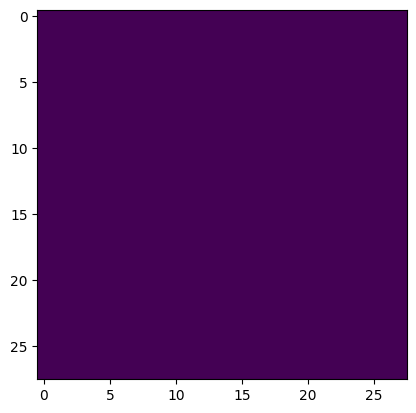


Epoch: 48 | Learning Rate: 0.0004096000000000001
0.030195126309990883
0.0291129183024168
0.03131670132279396
0.029897747561335564
0.029344553127884865
0.030729446560144424
0.03125518932938576
0.03060305304825306
0.0325644426047802
0.03052729181945324
0.030028220266103745
0.03239850699901581
0.030485348775982857
0.030501455068588257
0.029528729617595673
0.031201954931020737
0.030367160215973854
0.03308520093560219
0.030550315976142883
0.029808953404426575
0.028830992057919502
0.027613775804638863
0.029499515891075134
0.028557809069752693
0.031083958223462105
0.031574346125125885
0.030053069815039635
0.029662221670150757
0.029352357611060143
0.032331433147192
0.03209676966071129
0.029447849839925766
0.03128602355718613
0.029766377061605453
0.03124375268816948
0.02908494509756565
0.0315546989440918
0.030728405341506004
0.03014347516000271
0.02914159558713436
0.031516630202531815
0.03009466454386711
0.02955329790711403
0.030753619968891144
0.031516119837760925
0.030930515378713608
0.02897

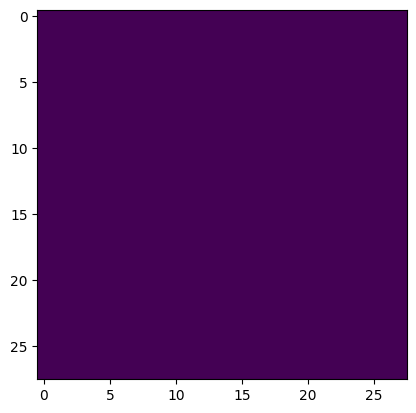


Epoch: 49 | Learning Rate: 0.0004096000000000001
0.029720023274421692
0.029690498486161232
0.03217916563153267
0.03193766996264458
0.030750390142202377
0.03052184171974659
0.028859741985797882
0.029838940128684044
0.03084203042089939
0.029494917020201683
0.03055977262556553
0.03153423219919205
0.02953745424747467
0.03088344819843769
0.02847849763929844
0.030256183817982674
0.02918832004070282
0.02982635796070099
0.03194190561771393
0.03044288419187069
0.030388085171580315
0.0285362359136343
0.03125998005270958
0.028581177815794945
0.029999645426869392
0.031694091856479645
0.02997584640979767
0.029775813221931458
0.028509460389614105
0.030844906345009804
0.0314498245716095
0.03001614846289158
0.029452357441186905
0.028343847021460533
0.03084014169871807
0.02923913300037384
0.02940417267382145
0.029626797884702682
0.029173923656344414
0.029400590807199478
0.031052693724632263
0.029042227193713188
0.02857290953397751
0.029885023832321167
0.03249300271272659
0.03206436336040497
0.02966712

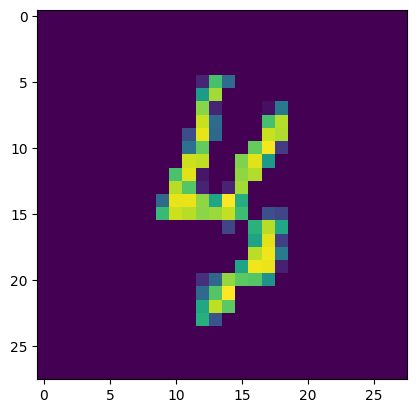


Epoch: 50 | Learning Rate: 0.0004096000000000001
0.028925759717822075
0.03130892291665077
0.03204676881432533
0.030076052993535995
0.030153358355164528
0.030036823824048042
0.028509844094514847
0.03080158494412899
0.03266184777021408
0.030952516943216324
0.031092237681150436
0.029076015576720238
0.028730060905218124
0.029839392751455307
0.03002331219613552
0.02858935110270977
0.028616655617952347
0.03152518346905708
0.03178633376955986
0.028719307854771614
0.029994258657097816
0.030014507472515106
0.030149539932608604
0.03249717503786087
0.029634112492203712
0.031979288905858994
0.028153525665402412
0.029020318761467934
0.03153460472822189
0.030216531828045845
0.03087625652551651
0.02898288704454899
0.031244542449712753
0.02863878570497036
0.029534582048654556
0.029760291799902916
0.031268611550331116
0.030361581593751907
0.030991412699222565
0.029151545837521553
0.02875015325844288
0.029294580221176147
0.029339993372559547
0.03008314222097397
0.02848564274609089
0.031538523733615875


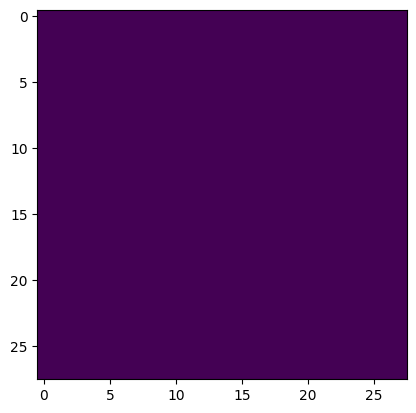


Epoch: 51 | Learning Rate: 0.0003276800000000001
0.03126206994056702
0.02863115444779396
0.02952449582517147
0.02929549291729927
0.031181592494249344
0.032582126557826996
0.03142836317420006
0.029282230883836746
0.030344096943736076
0.030424945056438446
0.029829267412424088
0.029764028266072273
0.029283002018928528
0.032293546944856644
0.028349267318844795
0.030223775655031204
0.030621783807873726
0.0320684053003788
0.028974909335374832
0.029588207602500916
0.03124442882835865
0.028857925906777382
0.030580155551433563
0.030138852074742317
0.02877448871731758
0.031599100679159164
0.029514480382204056
0.03165311738848686
0.031628791242837906
0.03019551932811737
0.029955962672829628
0.03095771186053753
0.03149278089404106
0.02836051769554615
0.02883107028901577
0.02914261817932129
0.02790621854364872
0.031681232154369354
0.028934793546795845
0.032343536615371704
0.029607076197862625
0.029540937393903732
0.028796372935175896
0.03129975497722626
0.029676612466573715
0.03058520331978798
0.0

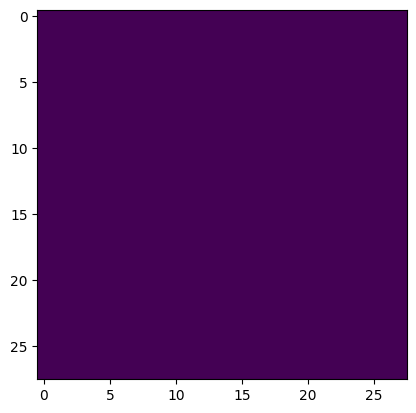


Epoch: 52 | Learning Rate: 0.0003276800000000001
0.03217758238315582
0.03128534182906151
0.030062027275562286
0.029667329043149948
0.02907923422753811
0.03081032633781433
0.028993917629122734
0.027481773868203163
0.029274027794599533
0.02793528139591217
0.03201013058423996
0.030004223808646202
0.030110307037830353
0.029536684975028038
0.029046768322587013
0.03167266026139259
0.02987736091017723
0.030018385499715805
0.029715891927480698
0.0287210401147604
0.028903968632221222
0.031556881964206696
0.031236683949828148
0.029798399657011032
0.029519204050302505
0.029542503878474236
0.028428032994270325
0.030264591798186302
0.029467981308698654
0.029176754876971245
0.029450220987200737
0.0285812821239233
0.02974005974829197
0.028063561767339706
0.03252275660634041
0.029769938439130783
0.02982618845999241
0.030077442526817322
0.029566505923867226
0.02874750643968582
0.028724435716867447
0.02940027415752411
0.030352938920259476
0.02850227802991867
0.030642056837677956
0.02916322648525238
0.0

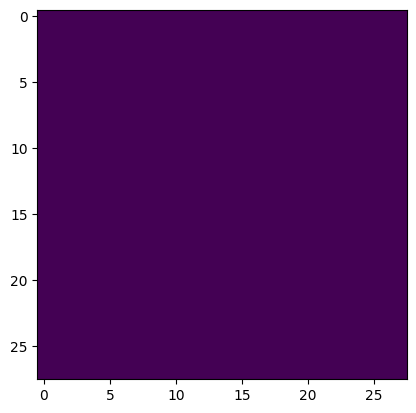


Epoch: 53 | Learning Rate: 0.0003276800000000001
0.032411400228738785
0.030225353315472603
0.03011033497750759
0.028810778632760048
0.031086279079318047
0.03085278905928135
0.030092136934399605
0.030657101422548294
0.02892926149070263
0.030888274312019348
0.030647382140159607
0.02799743041396141
0.031177885830402374
0.031177528202533722
0.028839493170380592
0.03126545250415802
0.030458906665444374
0.029997412115335464
0.02995464764535427
0.029223183169960976
0.02988366410136223
0.030453559011220932
0.028305642306804657
0.031617455184459686
0.0313078872859478
0.030093153938651085
0.02994687668979168
0.027895761653780937
0.029991546645760536
0.02994605153799057
0.0266175027936697
0.029092608019709587
0.030457163229584694
0.029297297820448875
0.02863316982984543
0.02737080492079258
0.031610917299985886
0.03029615432024002
0.02905711717903614
0.029028847813606262
0.029827238991856575
0.02909129485487938
0.027436060830950737
0.031166477128863335
0.032187577337026596
0.029545865952968597
0.

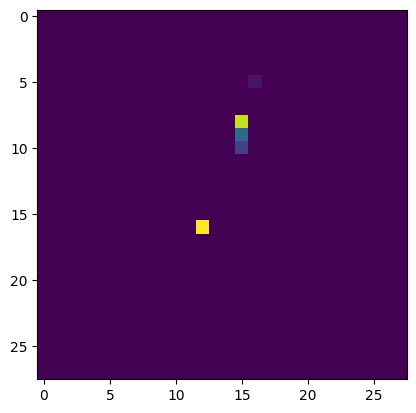


Epoch: 54 | Learning Rate: 0.0003276800000000001
0.028015803545713425
0.028891757130622864
0.030235474929213524
0.0290543045848608
0.029916608706116676
0.029536576941609383
0.027934307232499123
0.03134763985872269
0.029199039563536644
0.027922051027417183
0.030141668394207954
0.02725117653608322
0.02975623868405819
0.030079564079642296
0.02762519009411335
0.027750540524721146
0.03093954734504223
0.028261695057153702
0.030400404706597328
0.03202972933650017
0.028695084154605865
0.02802186831831932
0.029901737347245216
0.029326360672712326
0.03131745383143425
0.030838649719953537
0.030601685866713524
0.031479302793741226
0.029705217108130455
0.029557548463344574
0.030480865389108658
0.02980787865817547
0.03119252622127533
0.029630815610289574
0.03043971210718155
0.029292037710547447
0.03182169422507286
0.03178900107741356
0.028134087100625038
0.03000214509665966
0.028516506776213646
0.02934708632528782
0.03196178004145622
0.029287202283740044
0.029993604868650436
0.030874265357851982
0.

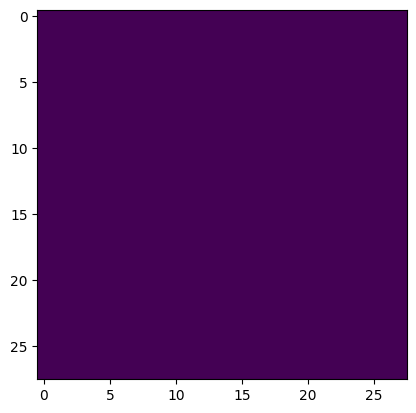


Epoch: 55 | Learning Rate: 0.0003276800000000001
0.0313134491443634
0.03139117360115051
0.030270187184214592
0.02900698408484459
0.02830359898507595
0.030072137713432312
0.028995685279369354
0.029443083330988884
0.030890459194779396
0.029751431196928024
0.030870171263813972
0.02915375679731369
0.02891838736832142
0.03078901208937168
0.02889363467693329
0.02954275719821453
0.03077428601682186
0.031112773343920708
0.0297556072473526
0.027371006086468697
0.029849322512745857
0.026688940823078156
0.029490577057003975
0.031934287399053574
0.027395345270633698
0.03126469627022743
0.03019820526242256
0.031040998175740242
0.029758837074041367
0.027379093691706657
0.029496382921934128
0.03072981908917427
0.032577089965343475
0.032001323997974396
0.02872314117848873
0.02959267795085907
0.0293019637465477
0.030913522467017174
0.03003673627972603
0.028950192034244537
0.030985768884420395
0.02868390455842018
0.030992643907666206
0.030292242765426636
0.030460044741630554
0.029563747346401215
0.0309

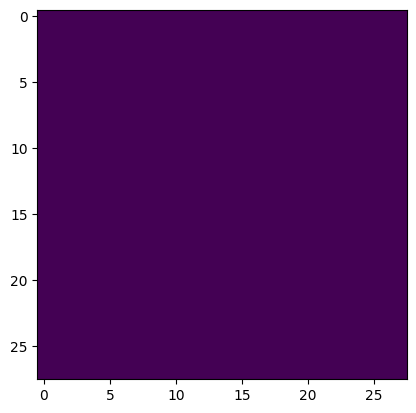


Epoch: 56 | Learning Rate: 0.0003276800000000001
0.027232132852077484
0.028452327474951744
0.03269131854176521
0.030698422342538834
0.03031938336789608
0.029324915260076523
0.028109204024076462
0.031216314062476158
0.029529916122555733
0.031551484018564224
0.02903350442647934
0.03187194839119911
0.03185954689979553
0.028352683410048485
0.029116690158843994
0.028012601658701897
0.030169490724802017
0.031047578901052475
0.028085432946681976
0.028922677040100098
0.02950935624539852
0.02922389842569828
0.029872260987758636
0.02949957549571991
0.028073716908693314
0.03049110807478428
0.03016054816544056
0.02960389479994774
0.03093797340989113
0.029713714495301247
0.0317356139421463
0.02904585562646389
0.02793940156698227
0.028345054015517235
0.030906064435839653
0.031086476519703865
0.027229780331254005
0.02952505089342594
0.030007030814886093
0.030645349994301796
0.030321067199110985
0.028846900910139084
0.028653383255004883
0.029673848301172256
0.03074829652905464
0.02815711684525013
0.0

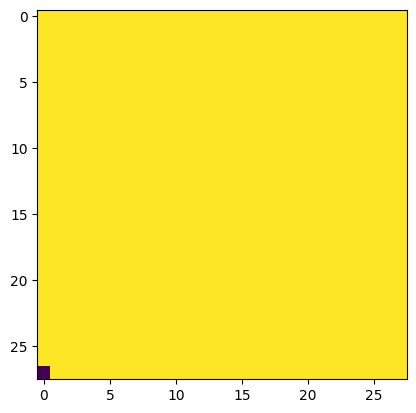


Epoch: 57 | Learning Rate: 0.0003276800000000001
0.028841236606240273
0.02966773696243763
0.03294205665588379
0.03091481700539589
0.028463590890169144
0.030997375026345253
0.029034322127699852
0.02964336797595024
0.029231946915388107
0.02875608205795288
0.029349807649850845
0.030044376850128174
0.030456148087978363
0.028964752331376076
0.030270326882600784
0.030129941180348396
0.030932052060961723
0.026279831305146217
0.027729574590921402
0.030715737491846085
0.026920614764094353
0.02778736874461174
0.031193504109978676
0.029856890439987183
0.027720557525753975
0.029735233634710312
0.03010169230401516
0.029770199209451675
0.031215691938996315
0.031300004571676254
0.02747768722474575
0.028868937864899635
0.03113487735390663
0.030239244922995567
0.029271280393004417
0.031919214874506
0.02991516701877117
0.030171342194080353
0.02924477495253086
0.02763129398226738
0.028048347681760788
0.029605189338326454
0.02936183102428913
0.030511587858200073
0.029252473264932632
0.02961341105401516
0

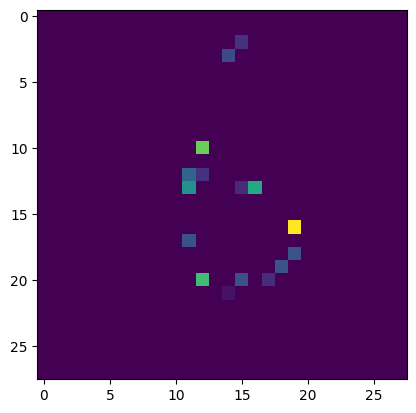


Epoch: 58 | Learning Rate: 0.0003276800000000001
0.030364736914634705
0.029771868139505386
0.029342280700802803
0.031616561114788055
0.0282313022762537
0.03065556287765503
0.029869889840483665
0.029620090499520302
0.027973266318440437
0.030827712267637253
0.027560900896787643
0.02861439809203148
0.03023100085556507
0.02986186370253563
0.02992444485425949
0.03054780885577202
0.02725253254175186
0.031648825854063034
0.029003571718931198
0.031466253101825714
0.029986891895532608
0.030844485387206078
0.027939489111304283
0.030397530645132065
0.03098861686885357
0.030097439885139465
0.03005407750606537
0.030291225761175156
0.03215505927801132
0.030562076717615128
0.030220042914152145
0.030415812507271767
0.027832945808768272
0.03121914342045784
0.029162975028157234
0.030263695865869522
0.029035601764917374
0.029977528378367424
0.029323585331439972
0.029749523848295212
0.028989680111408234
0.029285268858075142
0.02993173524737358
0.02940783090889454
0.029403267428278923
0.029936734586954117

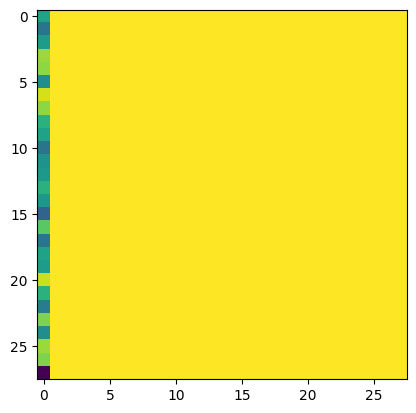


Epoch: 59 | Learning Rate: 0.0003276800000000001
0.029602186754345894
0.029255297034978867
0.030353333801031113
0.029027344658970833
0.02926681749522686
0.02992342598736286
0.02868395298719406
0.030313748866319656
0.028758982196450233
0.03241495043039322
0.030337747186422348
0.030849285423755646
0.029014036059379578
0.0297815203666687
0.03108321502804756
0.02916445955634117
0.02842356450855732
0.03080352395772934
0.030503245070576668
0.029360760003328323
0.030279312282800674
0.028990598395466805
0.029610948637127876
0.029723847284913063
0.029852772131562233
0.02864423580467701
0.030209537595510483
0.028259754180908203
0.028485307469964027
0.028225289657711983
0.03070218116044998
0.029102519154548645
0.02813955396413803
0.030061595141887665
0.02769455872476101
0.028407346457242966
0.029107658192515373
0.027356242761015892
0.02994968183338642
0.029884859919548035
0.02739914320409298
0.03015417978167534
0.030986551195383072
0.028481891378760338
0.029815152287483215
0.030514894053339958
0

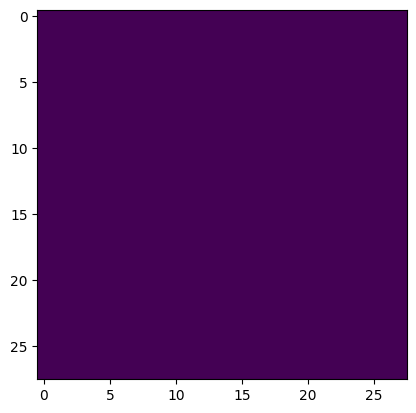


Epoch: 60 | Learning Rate: 0.0003276800000000001
0.030707314610481262
0.028338290750980377
0.028178557753562927
0.03095240890979767
0.03336617723107338
0.030275480821728706
0.0302206389605999
0.026749396696686745
0.027436571195721626
0.02938813343644142
0.028733866289258003
0.029297025874257088
0.029702186584472656
0.029816096648573875
0.030190803110599518
0.029140792787075043
0.029559683054685593
0.030806034803390503
0.029327234253287315
0.02884780615568161
0.027882037684321404
0.029722126200795174
0.028066487982869148
0.03162926807999611
0.028135474771261215
0.02980152703821659
0.03080185502767563
0.029537400230765343
0.03041180968284607
0.030507534742355347
0.028355393558740616
0.029554205015301704
0.029296576976776123
0.029955001547932625
0.02838553674519062
0.030383650213479996
0.029789427295327187
0.028686996549367905
0.027745889499783516
0.030363427475094795
0.02799210138618946
0.03128302842378616
0.03102392517030239
0.02970878779888153
0.030288618057966232
0.03012177348136902


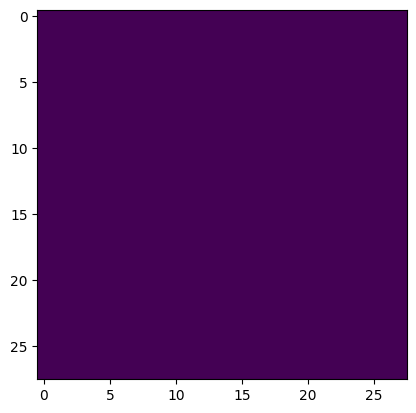


Epoch: 61 | Learning Rate: 0.0002621440000000001
0.030081750825047493
0.030289899557828903
0.030462097376585007
0.03068910352885723
0.029711509123444557
0.028790462762117386
0.029171422123908997
0.0302272979170084
0.028396932408213615
0.03042018599808216
0.03180661052465439
0.02948634885251522
0.03015274927020073
0.031179962679743767
0.029679827392101288
0.030867259949445724
0.03105388768017292
0.029780777171254158
0.03086918406188488
0.0297263003885746
0.029827453196048737
0.030170869082212448
0.029501980170607567
0.03135449066758156
0.03126139938831329
0.029714545235037804
0.028117738664150238
0.03186614438891411
0.029091183096170425
0.03002922236919403
0.028303204104304314
0.030591696500778198
0.02878035604953766
0.029514513909816742
0.03018256463110447
0.028550785034894943
0.029280584305524826
0.029090097174048424
0.028733350336551666
0.02975228801369667
0.02797473967075348
0.030122268944978714
0.028728123754262924
0.02853645570576191
0.02957131154835224
0.026634585112333298
0.030

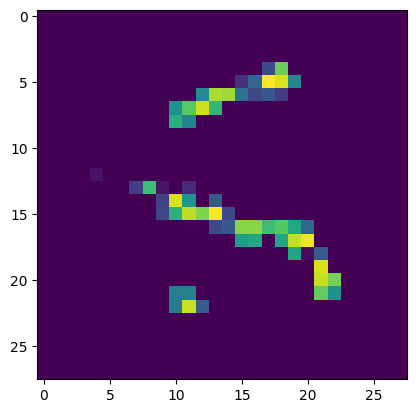


Epoch: 62 | Learning Rate: 0.0002621440000000001
0.0279530081897974
0.027743760496377945
0.028342168778181076
0.028712276369333267
0.02939983271062374
0.029802754521369934
0.030566517263650894
0.031062981113791466
0.029231581836938858
0.029680704697966576
0.03101619891822338
0.03199981525540352
0.02929471805691719
0.02994582988321781
0.027848433703184128
0.02777276188135147
0.030108880251646042
0.029672928154468536
0.02736661769449711
0.030045464634895325
0.03029567562043667
0.028774401172995567
0.029080240055918694
0.02902858518064022
0.030337955802679062
0.02859935723245144
0.030659932643175125
0.029331283643841743
0.027230845764279366
0.027716895565390587
0.02935817278921604
0.031092258170247078
0.030331026762723923
0.028812242671847343
0.028279174119234085
0.028045907616615295
0.029026273638010025
0.030348917469382286
0.03101186268031597
0.027991661801934242
0.03054807335138321
0.028561869636178017
0.028050655499100685
0.02847469598054886
0.028787977993488312
0.03064359351992607
0

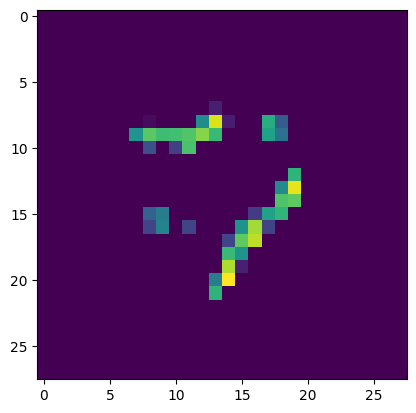


Epoch: 63 | Learning Rate: 0.0002621440000000001
0.029453502967953682
0.028667965903878212
0.02974657714366913
0.030747024342417717
0.027764873579144478
0.03137718513607979
0.030205687507987022
0.02973686344921589
0.02906220220029354
0.02930794470012188
0.028219709172844887
0.02991987019777298
0.030639490112662315
0.02870452031493187
0.029204821214079857
0.029322035610675812
0.028468547388911247
0.0303192138671875
0.030143527314066887
0.02936018444597721
0.02892005629837513
0.028687767684459686
0.03031526319682598
0.029615921899676323
0.028342772275209427
0.02866164967417717
0.028359558433294296
0.03174736350774765
0.03095019981265068
0.030502868816256523
0.028494596481323242
0.02845022827386856
0.028618644922971725
0.028238030150532722
0.02812245301902294
0.029543718323111534
0.029996786266565323
0.028853556141257286
0.029712097719311714
0.030135395005345345
0.028947845101356506
0.026867344975471497
0.029321685433387756
0.026927292346954346
0.027881264686584473
0.027349455282092094
0

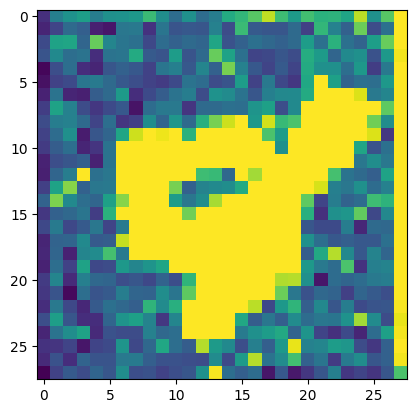


Epoch: 64 | Learning Rate: 0.0002621440000000001
0.03001449443399906
0.03100684843957424
0.026079216971993446
0.028224043548107147
0.02833322249352932
0.02718072198331356
0.028464587405323982
0.028353914618492126
0.02920255996286869
0.028410151600837708
0.028551995754241943
0.030491288751363754
0.029740070924162865
0.03047492727637291
0.029222842305898666
0.030255671590566635
0.028445769101381302
0.029152480885386467
0.030914997681975365
0.02992841601371765
0.02904806286096573
0.03048739768564701
0.030205249786376953
0.029427895322442055
0.030965950340032578
0.030622292309999466
0.03053065575659275
0.029180804267525673
0.030737094581127167
0.030781997367739677
0.028637675568461418
0.028836162760853767
0.028466904535889626
0.029380973428487778
0.02827165089547634
0.029982391744852066
0.031089767813682556
0.02840263955295086
0.028939178213477135
0.030522968620061874
0.029831700026988983
0.02781347744166851
0.02766723558306694
0.030940206721425056
0.03143668919801712
0.028608379885554314

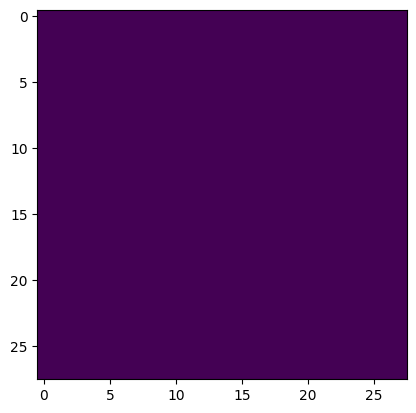


Epoch: 65 | Learning Rate: 0.0002621440000000001
0.02811409905552864
0.028564337641000748
0.030385201796889305
0.027723783627152443
0.03028034418821335
0.031275324523448944
0.02954583615064621
0.03039395995438099
0.02923569828271866
0.031182657927274704
0.031166261062026024
0.02891346998512745
0.029165344312787056
0.031103674322366714
0.030495930463075638
0.029332106932997704
0.029288144782185555
0.02950914017856121
0.026233118027448654
0.031216967850923538
0.031340405344963074
0.030066318809986115
0.030159728601574898
0.0288798026740551
0.02911040373146534
0.028647957369685173
0.031211653724312782
0.029072007164359093
0.029640501365065575
0.028466137126088142
0.02877126634120941
0.031034201383590698
0.029358770698308945
0.029350951313972473
0.02886374481022358
0.028835320845246315
0.03194747492671013
0.029683832079172134
0.031023520976305008
0.027007920667529106
0.030269687995314598
0.028776289895176888
0.02879529818892479
0.030295901000499725
0.029423503205180168
0.02946911938488483

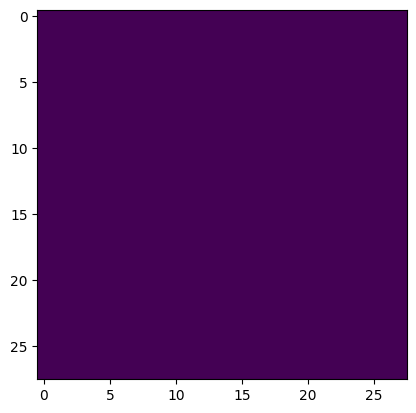


Epoch: 66 | Learning Rate: 0.0002621440000000001
0.030671902000904083
0.02921581268310547
0.02955620549619198
0.02866317331790924
0.027991024777293205
0.028561586514115334
0.029202232137322426
0.028059039264917374
0.028605854138731956
0.028407935053110123
0.029349924996495247
0.028267022222280502
0.0286063551902771
0.028266368433833122
0.02768215723335743
0.028887856751680374
0.028281155973672867
0.0288107730448246
0.03090675361454487
0.030461417511105537
0.02885587327182293
0.02981531247496605
0.027803881093859673
0.02773970365524292
0.030038731172680855
0.02996540255844593
0.029030341655015945
0.030714428052306175
0.027852967381477356
0.02763563208281994
0.029019396752119064
0.03101263754069805
0.02980164997279644
0.02821219339966774
0.029885968193411827
0.02815907821059227
0.027854017913341522
0.02896830253303051
0.027974726632237434
0.029394717887043953
0.028385527431964874
0.029369467869400978
0.026756037026643753
0.029340684413909912
0.029371226206421852
0.02882574498653412
0.02

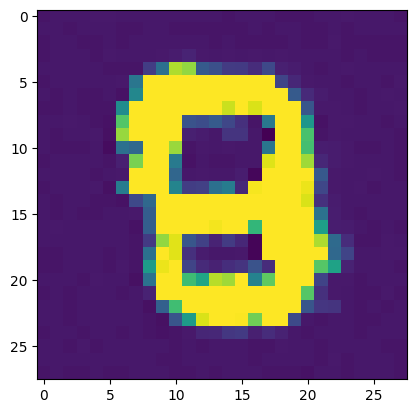


Epoch: 67 | Learning Rate: 0.0002621440000000001
0.03004208765923977
0.028917480260133743
0.027943436056375504
0.030121471732854843
0.030158810317516327
0.030078081414103508
0.02941613644361496
0.02985008805990219
0.027560345828533173
0.029977869242429733
0.031104035675525665
0.029268043115735054
0.029997017234563828
0.027529222890734673
0.02914300188422203
0.027151009067893028
0.029939185827970505
0.029381435364484787
0.026868633925914764
0.028244085609912872
0.028530893847346306
0.02925466001033783
0.02985791675746441
0.03009440377354622
0.026876186951994896
0.02904212474822998
0.03059876710176468
0.030139347538352013
0.0294009018689394
0.02846025675535202
0.03003823384642601
0.029101181775331497
0.029484976083040237
0.029405204579234123
0.027697240933775902
0.02788752131164074
0.02803083322942257
0.027663040906190872
0.02836696431040764
0.02893648110330105
0.027977757155895233
0.029436815530061722
0.030855795368552208
0.030300747603178024
0.02848915196955204
0.02831422910094261
0.0

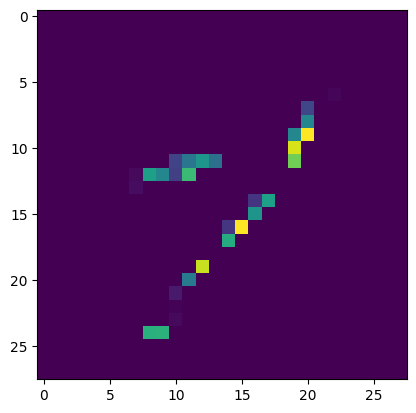


Epoch: 68 | Learning Rate: 0.0002621440000000001
0.029762860387563705
0.02731085754930973
0.030243948101997375
0.02900332771241665
0.03171391412615776
0.026803161948919296
0.030009916052222252
0.029674768447875977
0.028789402917027473
0.027948787435889244
0.028422629460692406
0.030675772577524185
0.02852761745452881
0.0274384506046772
0.027556871995329857
0.027144037187099457
0.029199644923210144
0.030641978606581688
0.02919136732816696
0.028657393530011177
0.03108169697225094
0.028119413182139397
0.030456392094492912
0.031200436875224113
0.030022170394659042
0.028043868020176888
0.03110598400235176
0.028846394270658493
0.030017416924238205
0.02973555214703083
0.02855510823428631
0.029877200722694397
0.029785024002194405
0.02893097884953022
0.027496570721268654
0.026954809203743935
0.029064472764730453
0.030808312818408012
0.02968411147594452
0.029203705489635468
0.028062527999281883
0.028516093268990517
0.029752906411886215
0.028198983520269394
0.028225550428032875
0.0291793681681156

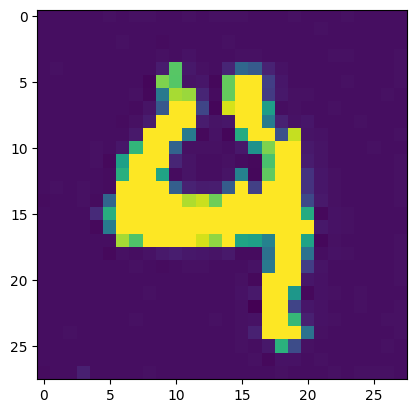


Epoch: 69 | Learning Rate: 0.0002621440000000001
0.031006721779704094
0.030001426115632057
0.029422132298350334
0.03050442785024643
0.03147702291607857
0.0294794999063015
0.028536008670926094
0.030411403626203537
0.03087223879992962
0.030848439782857895
0.026923801749944687
0.02864048443734646
0.028097232803702354
0.030467446893453598
0.029243050143122673
0.0308736190199852
0.029613256454467773
0.03023533895611763
0.030166668817400932
0.02951875515282154
0.027612503618001938
0.030719999223947525
0.02963445521891117
0.029009273275732994
0.02909592166543007
0.029413996264338493
0.028629843145608902
0.02891601249575615
0.02676757611334324
0.030744245275855064
0.029367808252573013
0.029218483716249466
0.028366796672344208
0.028525371104478836
0.028992358595132828
0.02967810072004795
0.029020454734563828
0.028435152024030685
0.027668582275509834
0.02814394049346447
0.030168605968356133
0.028246404603123665
0.028212659060955048
0.028346683830022812
0.02736489102244377
0.029717108234763145
0

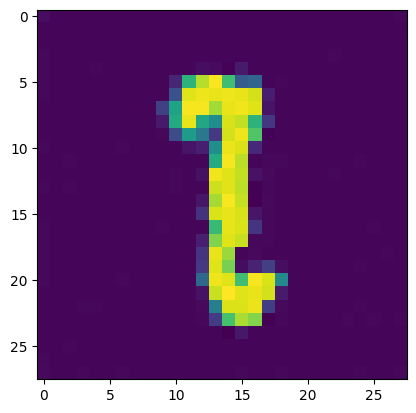


Epoch: 70 | Learning Rate: 0.0002621440000000001
0.03102676384150982
0.030482299625873566
0.02771764248609543
0.030207358300685883
0.029679961502552032
0.030079804360866547
0.029110407456755638
0.030555324628949165
0.027522791177034378
0.029905226081609726
0.030269131064414978
0.027570199221372604
0.029503237456083298
0.030882421880960464
0.029047450050711632
0.030110446736216545
0.03197570517659187
0.029256002977490425
0.028035562485456467
0.030631283298134804
0.026988383382558823
0.030281292274594307
0.029820207506418228
0.029176730662584305
0.029792487621307373
0.026666484773159027
0.02945624105632305
0.027850860729813576
0.028033120557665825
0.029279299080371857
0.028777599334716797
0.02808934822678566
0.02925972454249859
0.030500303953886032
0.02776993066072464
0.02796797826886177
0.031243834644556046
0.03059217520058155
0.027984455227851868
0.028630446642637253
0.030337011441588402
0.026720713824033737
0.030288048088550568
0.027744511142373085
0.02863958105444908
0.0301443655043

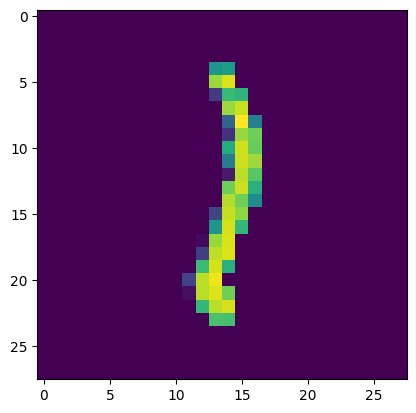


Epoch: 71 | Learning Rate: 0.00020971520000000012
0.02999277040362358
0.028630657121539116
0.0286610946059227
0.030424101278185844
0.02935614623129368
0.030836567282676697
0.03022255189716816
0.029458986595273018
0.02915964275598526
0.029128974303603172
0.02732178568840027
0.02736872248351574
0.028669245541095734
0.027531934902071953
0.028263067826628685
0.030289284884929657
0.028461959213018417
0.028742201626300812
0.028949106112122536
0.02894132398068905
0.028685564175248146
0.02949107438325882
0.02860897406935692
0.029797514900565147
0.029934925958514214
0.027886204421520233
0.03133246675133705
0.02881489507853985
0.028423508629202843
0.02796897105872631
0.030363548547029495
0.03050971031188965
0.027368534356355667
0.030526963993906975
0.029600083827972412
0.029223470017313957
0.029560312628746033
0.028078977018594742
0.03064529225230217
0.027498239651322365
0.02905457280576229
0.02794675901532173
0.027577275410294533
0.02960774302482605
0.02946835570037365
0.02845260314643383
0.02

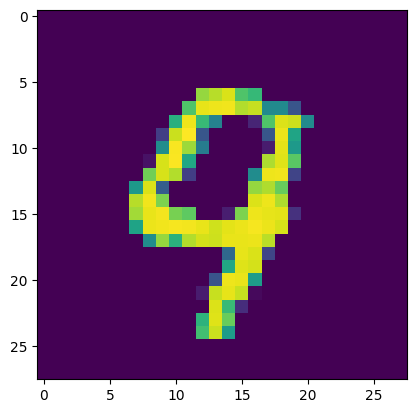


Epoch: 72 | Learning Rate: 0.00020971520000000012
0.027972737327218056
0.028290724381804466
0.027511240914463997
0.026925986632704735
0.0273966733366251
0.02939736843109131
0.02821824513375759
0.02827008254826069
0.031442806124687195
0.029556704685091972
0.02938542515039444
0.02957805059850216
0.028838088735938072
0.030990084633231163
0.027842434123158455
0.030521444976329803
0.02898692712187767
0.029076429083943367
0.02915646694600582
0.030063185840845108
0.028148174285888672
0.030836042016744614
0.02932591550052166
0.029147904366254807
0.027548877522349358
0.02840602397918701
0.028978915885090828
0.030730804428458214
0.029203766956925392
0.027545202523469925
0.029641015455126762
0.028067640960216522
0.028214795514941216
0.030013151466846466
0.030129138380289078
0.028998224064707756
0.028936294838786125
0.02906746231019497
0.02887808531522751
0.028916383162140846
0.029672643169760704
0.028401602059602737
0.029951442033052444
0.02768530137836933
0.029486091807484627
0.0283912830054759

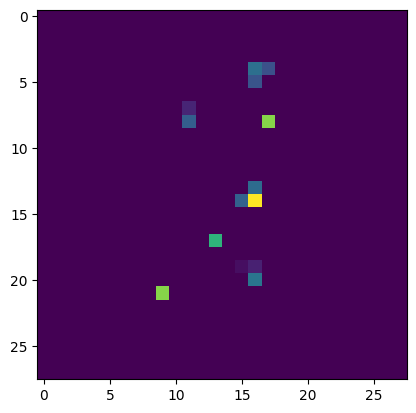


Epoch: 73 | Learning Rate: 0.00020971520000000012
0.029786312952637672
0.02930261567234993
0.031066175550222397
0.027487406507134438
0.02919957973062992
0.02821129374206066
0.02949880063533783
0.028755202889442444
0.03109293058514595
0.03084922954440117
0.02889079973101616
0.029876114800572395
0.027981266379356384
0.0275739673525095
0.02717944234609604
0.030897459015250206
0.027353176847100258
0.03246017172932625
0.027878206223249435
0.02770356647670269
0.02839633822441101
0.028972160071134567
0.028700944036245346
0.02899741753935814
0.030170341953635216
0.030611494556069374
0.02888466790318489
0.02631138637661934
0.029521577060222626
0.028413208201527596
0.02990703098475933
0.029363170266151428
0.03029843606054783
0.026883648708462715
0.02976311184465885
0.028850620612502098
0.030558794736862183
0.026262851431965828
0.02888094075024128
0.029371390119194984
0.028430765494704247
0.027654318138957024
0.028898010030388832
0.029052047058939934
0.02948499657213688
0.026940321549773216
0.02

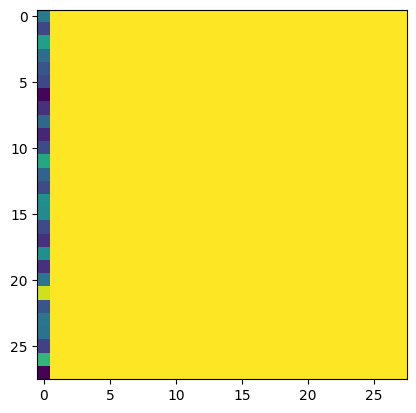


Epoch: 74 | Learning Rate: 0.00020971520000000012
0.030930908396840096
0.02721463516354561
0.02808384969830513
0.028634319081902504
0.030142970383167267
0.02735864743590355
0.028534995391964912
0.029081106185913086
0.02842061035335064
0.029164055362343788
0.027230264618992805
0.031415581703186035
0.030087145045399666
0.02895052544772625
0.028691429644823074
0.028670620173215866
0.029564781114459038
0.028287576511502266
0.028623415157198906
0.026519037783145905
0.028685057535767555
0.02976425737142563
0.0269697867333889
0.028281236067414284
0.02801727131009102
0.029164861887693405
0.028857143595814705
0.030248844996094704
0.02864936925470829
0.028850026428699493
0.029155565425753593
0.02938207797706127
0.02873457595705986
0.028863605111837387
0.03090791031718254
0.028380608186125755
0.027872316539287567
0.029047703370451927
0.028682008385658264
0.028124351054430008
0.028414471074938774
0.02769661322236061
0.027878375723958015
0.02963315136730671
0.0302934180945158
0.02972552366554737
0

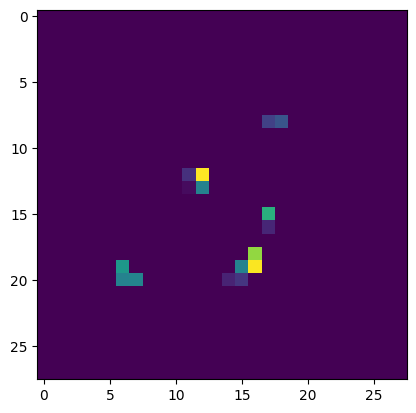


Epoch: 75 | Learning Rate: 0.00020971520000000012
0.02796771563589573
0.028956353664398193
0.031618695706129074
0.02938140369951725
0.027563046663999557
0.02960260771214962
0.028899123892188072
0.029245639219880104
0.029624568298459053
0.028002874925732613
0.029063181951642036
0.03026028722524643
0.030028529465198517
0.03073219396173954
0.030331995338201523
0.02870981954038143
0.026916956529021263
0.026196714490652084
0.02865382470190525
0.02938980981707573
0.03040948137640953
0.03125237300992012
0.027453212067484856
0.027839774265885353
0.0319925919175148
0.028383297845721245
0.029368268325924873
0.026263300329446793
0.029362108558416367
0.028024030849337578
0.028213748708367348
0.03035975620150566
0.0293722003698349
0.030375761911273003
0.029765838757157326
0.029682394117116928
0.029949411749839783
0.02930808998644352
0.02856922522187233
0.02989473007619381
0.027582259848713875
0.02974569797515869
0.029356174170970917
0.02934480458498001
0.027418121695518494
0.029186876490712166
0.0

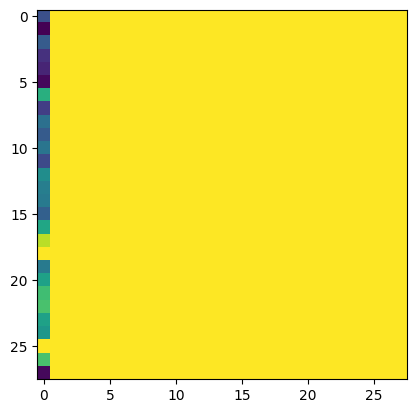


Epoch: 76 | Learning Rate: 0.00020971520000000012
0.028587162494659424
0.029283300042152405
0.030965030193328857
0.02788621000945568
0.030570872128009796
0.029370887205004692
0.030159587040543556
0.029321515932679176
0.02833694778382778
0.028848735615611076
0.030071619898080826
0.027394382283091545
0.028877148404717445
0.02911689318716526
0.029264381155371666
0.029446367174386978
0.029443740844726562
0.029262876138091087
0.02714964747428894
0.028194529935717583
0.030580934137105942
0.02820850908756256
0.03038041852414608
0.030181903392076492
0.028743330389261246
0.029131168499588966
0.03022441826760769
0.02604844979941845
0.031546469777822495
0.02839840203523636
0.030030084773898125
0.030517831444740295
0.027758561074733734
0.029155679047107697
0.028063753619790077
0.029585108160972595
0.03167301043868065
0.02749454230070114
0.029603179544210434
0.029864124953746796
0.026886511594057083
0.029616311192512512
0.02990223839879036
0.029399214312434196
0.029548322781920433
0.02929415367543

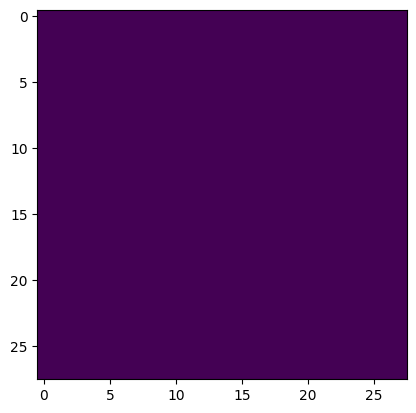


Epoch: 77 | Learning Rate: 0.00020971520000000012
0.027844730764627457
0.03009583055973053
0.02939465455710888
0.029195750132203102
0.03324441611766815
0.02767137624323368
0.03173759952187538
0.02930500917136669
0.02904464863240719
0.02972865104675293
0.027950940653681755
0.02888861671090126
0.027443965896964073
0.03102845512330532
0.029553096741437912
0.028641212731599808
0.028329206630587578
0.02830023691058159
0.027553275227546692
0.029352040961384773
0.029515547677874565
0.028917428106069565
0.02876569703221321
0.02834152616560459
0.02901342883706093
0.02948884479701519
0.028319040313363075
0.028600502759218216
0.02786732092499733
0.028531640768051147
0.02907082438468933
0.02821936272084713
0.029372146353125572
0.029051562771201134
0.029189739376306534
0.03015122003853321
0.028958043083548546
0.027365095913410187
0.028575873002409935
0.026806319132447243
0.03085293062031269
0.02937406301498413
0.03004213236272335
0.02790689840912819
0.029625331982970238
0.031091829761862755
0.0303

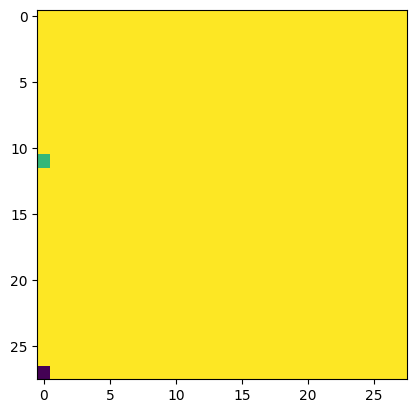


Epoch: 78 | Learning Rate: 0.00020971520000000012
0.028773920610547066
0.02763136476278305
0.030145693570375443
0.025898315012454987
0.029377153143286705
0.030216367915272713
0.03029809705913067
0.028480123728513718
0.029594862833619118
0.02988441288471222
0.028182748705148697
0.029676612466573715
0.028493106365203857
0.026794489473104477
0.029153848066926003
0.02915981598198414
0.030035745352506638
0.028318334370851517
0.02951110526919365
0.030312946066260338
0.028308141976594925
0.02834833785891533
0.02719293348491192
0.028419673442840576
0.028407173231244087
0.029277222231030464
0.02812759205698967
0.028633924201130867
0.026901206001639366
0.029527094215154648
0.027641529217362404
0.030161837115883827
0.028443701565265656
0.03092072159051895
0.02767977863550186
0.027535967528820038
0.029113080352544785
0.03201889991760254
0.02763308957219124
0.02992311306297779
0.029197588562965393
0.027956057339906693
0.029556933790445328
0.029237041249871254
0.027655621990561485
0.029199507087469

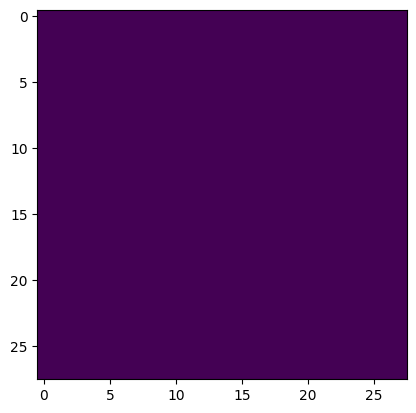


Epoch: 79 | Learning Rate: 0.00020971520000000012
0.0285884290933609
0.029698649421334267
0.02836417593061924
0.029603036120533943
0.027964893728494644
0.028718236833810806
0.029757382348179817
0.027332212775945663
0.029971759766340256
0.029655972495675087
0.028215456753969193
0.029758280143141747
0.028778931125998497
0.028768057003617287
0.028728201985359192
0.02833729237318039
0.02991163358092308
0.031865231692790985
0.02913951873779297
0.0307957511395216
0.028739048168063164
0.029134131968021393
0.026766618713736534
0.028928983956575394
0.027650773525238037
0.028413422405719757
0.027731286361813545
0.0292322039604187
0.02947378344833851
0.03050125762820244
0.028221694752573967
0.02780039794743061
0.031464844942092896
0.027608226984739304
0.02944866381585598
0.029027987271547318
0.028438467532396317
0.03006795421242714
0.02837454527616501
0.028620515018701553
0.03139540180563927
0.02868710644543171
0.02898317575454712
0.02824319526553154
0.027336377650499344
0.028371289372444153
0.0

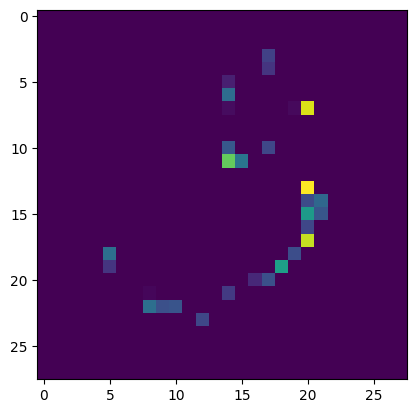


Epoch: 80 | Learning Rate: 0.00020971520000000012
0.02758212387561798
0.029711995273828506
0.027127662673592567
0.028365138918161392
0.029589734971523285
0.029020002111792564
0.027576256543397903
0.027686553075909615
0.02797563001513481
0.027857471257448196
0.029905688017606735
0.029377074912190437
0.02754179947078228
0.02942429669201374
0.029295891523361206
0.030325431376695633
0.028018198907375336
0.02736307866871357
0.028139283880591393
0.028189340606331825
0.028260406106710434
0.028652958571910858
0.0282256118953228
0.02787313051521778
0.027971627190709114
0.02771061286330223
0.027299650013446808
0.030160686001181602
0.03101351670920849
0.025852562859654427
0.02846226841211319
0.02797885052859783
0.028287287801504135
0.029948052018880844
0.03101801499724388
0.027906687930226326
0.028257032856345177
0.031018972396850586
0.028561554849147797
0.028036395087838173
0.02767445705831051
0.029291724786162376
0.028001295402646065
0.027519434690475464
0.029521672055125237
0.0267266221344470

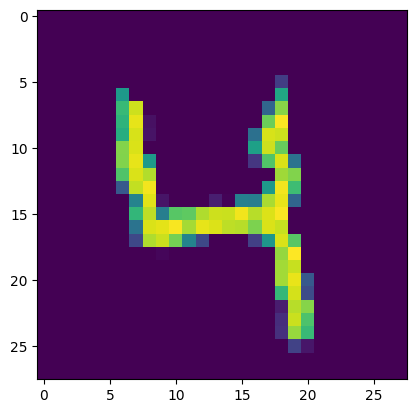


Epoch: 81 | Learning Rate: 0.0001677721600000001
0.027550209313631058
0.02929503098130226
0.028047733008861542
0.02996799536049366
0.030280709266662598
0.03250987455248833
0.03045700490474701
0.027725690975785255
0.02850951813161373
0.030258776620030403
0.030980508774518967
0.03028169460594654
0.03098161704838276
0.029505325481295586
0.029652487486600876
0.02958896942436695
0.028730742633342743
0.02746545895934105
0.028285102918744087
0.027851196005940437
0.02912421151995659
0.029817145317792892
0.03034837730228901
0.028256449848413467
0.02852999046444893
0.029700059443712234
0.030253902077674866
0.027680717408657074
0.028286170214414597
0.027492644265294075
0.026549674570560455
0.02989964559674263
0.029259920120239258
0.030022740364074707
0.026569243520498276
0.030532434582710266
0.02847392112016678
0.028514442965388298
0.028437891975045204
0.029412122443318367
0.029475318267941475
0.02811260148882866
0.027919255197048187
0.031355977058410645
0.02795267105102539
0.02819761447608471
0

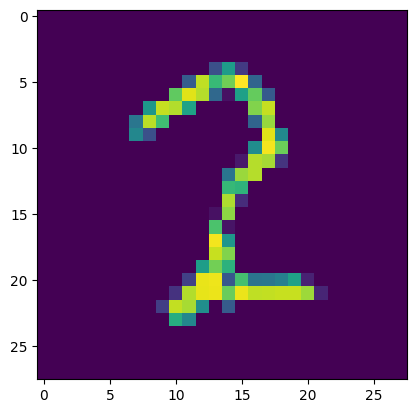


Epoch: 82 | Learning Rate: 0.0001677721600000001
0.031432125717401505
0.029326951131224632
0.027129508554935455
0.028887098655104637
0.02764326147735119
0.028319962322711945
0.027582654729485512
0.027907906100153923
0.03007509745657444
0.02817481756210327
0.02838941477239132
0.027302436530590057
0.028155416250228882
0.02783387526869774
0.029224859550595284
0.029755786061286926
0.029337814077734947
0.028373990207910538
0.030130820348858833
0.03002972900867462
0.02865312434732914
0.02955697663128376
0.0277559794485569
0.028664719313383102
0.027871958911418915
0.02687242068350315
0.028198109939694405
0.028453877195715904
0.027293307706713676
0.0278583075851202
0.028311533853411674
0.02969152294099331
0.028879499062895775
0.028117921203374863
0.027223732322454453
0.028499403968453407
0.02803044393658638
0.02929549664258957
0.028735140338540077
0.027693243697285652
0.0298912413418293
0.028495855629444122
0.029052436351776123
0.02993207983672619
0.027964051812887192
0.029448144137859344
0.0

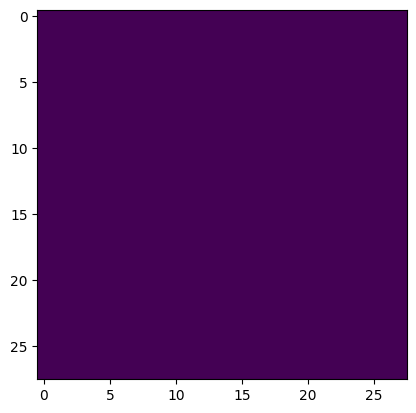


Epoch: 83 | Learning Rate: 0.0001677721600000001
0.027431568130850792
0.029127130284905434
0.02898070216178894
0.029390688985586166
0.03074626997113228
0.026862071827054024
0.029381372034549713
0.027840690687298775
0.026672501116991043
0.02878754958510399
0.02936910092830658
0.02979106828570366
0.02789265289902687
0.028696147724986076
0.027128541842103004
0.029231304302811623
0.031192438676953316
0.02842228300869465
0.028927119448781013
0.030143387615680695
0.027228476479649544
0.029192345216870308
0.029757533222436905
0.029734071344137192
0.029460597783327103
0.029156839475035667
0.026688069105148315
0.028860488906502724
0.027152065187692642
0.027236150577664375
0.029501957818865776
0.028061393648386
0.026540804654359818
0.02900042198598385
0.029291512444615364
0.028308017179369926
0.02952946349978447
0.029932858422398567
0.027738215401768684
0.029095211997628212
0.03321122005581856
0.026079880073666573
0.027714932337403297
0.029987527057528496
0.029303038492798805
0.0284982528537511

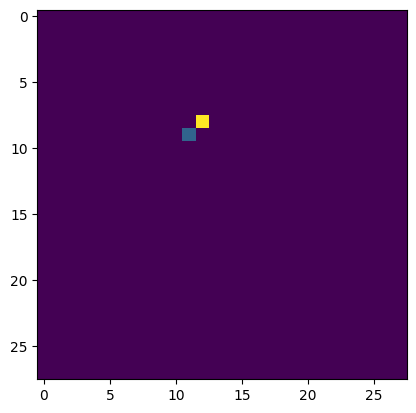


Epoch: 84 | Learning Rate: 0.0001677721600000001
0.029795991256833076
0.029182633385062218
0.02982775866985321
0.02866063266992569
0.02587834559381008
0.027693768963217735
0.028986463323235512
0.028845835477113724
0.02784806489944458
0.027643632143735886
0.029688319191336632
0.029333634302020073
0.026637164875864983
0.027546195313334465
0.028897801414132118
0.027886535972356796
0.029590828344225883
0.02694428712129593
0.02883150614798069
0.02922041341662407
0.02904953621327877
0.031218966469168663
0.028241561725735664
0.02963678166270256
0.03027590923011303
0.02962316758930683
0.029200857505202293
0.027625370770692825
0.029741767793893814
0.029336929321289062
0.030516263097524643
0.030265752226114273
0.02922079525887966
0.02761821076273918
0.02834971249103546
0.02986431121826172
0.02887752465903759
0.029010368511080742
0.02865968458354473
0.029798485338687897
0.027214832603931427
0.0298246331512928
0.02945922687649727
0.029438424855470657
0.029023272916674614
0.02966173179447651
0.030

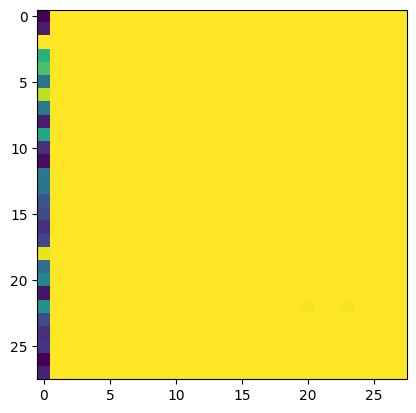


Epoch: 85 | Learning Rate: 0.0001677721600000001
0.026474911719560623
0.028500275686383247
0.02928520180284977
0.026943445205688477
0.030702902004122734
0.030735274776816368
0.02984594739973545
0.028180673718452454
0.027472345158457756
0.02984423004090786
0.029418867081403732
0.028768066316843033
0.027982957661151886
0.029566671699285507
0.028516363352537155
0.028259288519620895
0.029786420986056328
0.027349447831511497
0.030648065730929375
0.03040911629796028
0.02815360389649868
0.028690533712506294
0.028171852231025696
0.026224948465824127
0.028259461745619774
0.02929958887398243
0.03018920123577118
0.028619838878512383
0.028613267466425896
0.028357530012726784
0.02778284065425396
0.029429446905851364
0.030742181465029716
0.026981698349118233
0.028179125860333443
0.028173545375466347
0.02699095383286476
0.029854528605937958
0.028940552845597267
0.02897610142827034
0.02936624176800251
0.030263571068644524
0.029247676953673363
0.030483955517411232
0.02989736758172512
0.028605202212929

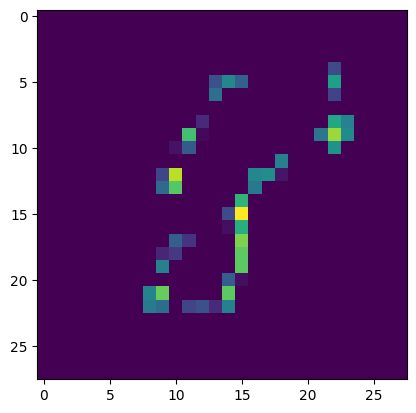


Epoch: 86 | Learning Rate: 0.0001677721600000001
0.029468482360243797
0.02643883228302002
0.02708227001130581
0.029803359881043434
0.029360517859458923
0.028638698160648346
0.028817638754844666
0.02787119522690773
0.02923775650560856
0.028124118223786354
0.0281324852257967
0.027394017204642296
0.02717653475701809
0.027867166325449944
0.028539231047034264
0.029202494770288467
0.028636442497372627
0.030275989323854446
0.030329450964927673
0.029556604102253914
0.03113439306616783
0.02824467048048973
0.030612893402576447
0.02927398681640625
0.02769552916288376
0.029907623305916786
0.027595169842243195
0.028223611414432526
0.02893536165356636
0.029641568660736084
0.026946092024445534
0.027874425053596497
0.02781650982797146
0.02798689343035221
0.029202837496995926
0.03012632019817829
0.027974454686045647
0.028857732191681862
0.028653478249907494
0.030140750110149384
0.031447313725948334
0.027898116037249565
0.02878299169242382
0.030572490766644478
0.027663415297865868
0.028955746442079544


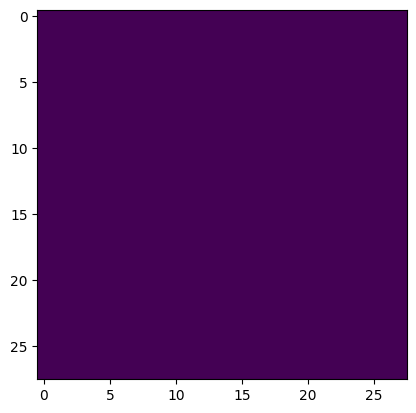


Epoch: 87 | Learning Rate: 0.0001677721600000001
0.02983042597770691
0.02859567478299141
0.029013974592089653
0.028561996296048164
0.027840137481689453
0.02894672565162182
0.027966797351837158
0.029902491718530655
0.030884157866239548
0.03138245642185211
0.02808856964111328
0.027410058304667473
0.02797999605536461
0.028669575229287148
0.02894197218120098
0.02950681932270527
0.02840692549943924
0.02867700345814228
0.03080846555531025
0.02779805287718773
0.02795143984258175
0.027418989688158035
0.027573609724640846
0.027956373989582062
0.026130417361855507
0.026014303788542747
0.029840629547834396
0.03003310039639473
0.028624948114156723
0.027694514021277428
0.028002899140119553
0.029063502326607704
0.02789030782878399
0.027350647374987602
0.028090249747037888
0.030156392604112625
0.029674220830202103
0.028988895937800407
0.029586944729089737
0.029789043590426445
0.030414532870054245
0.02928042784333229
0.02714746817946434
0.027972381561994553
0.028984731063246727
0.028289031237363815
0

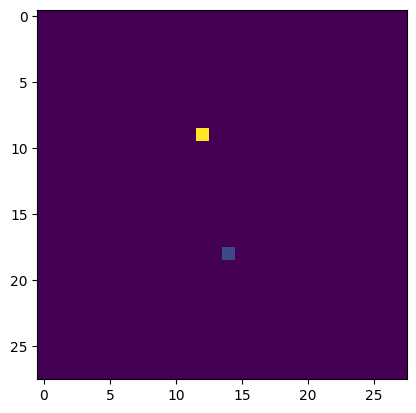


Epoch: 88 | Learning Rate: 0.0001677721600000001
0.02830498106777668
0.029897326603531837
0.02809564583003521
0.02725207805633545
0.029856136068701744
0.028715312480926514
0.025794442743062973
0.028667401522397995
0.027114812284708023
0.029426300898194313
0.0283346064388752
0.028162406757473946
0.0288098007440567
0.03038843907415867
0.026823626831173897
0.02925759367644787
0.030971547588706017
0.029647480696439743
0.027778783813118935
0.02809879370033741
0.029107682406902313
0.027736721560359
0.03078247420489788
0.02734886109828949
0.03125978261232376
0.02925237827003002
0.027916554361581802
0.029091937467455864
0.029369164258241653
0.028488047420978546
0.027743427082896233
0.027315635234117508
0.029039425775408745
0.028266044333577156
0.026855764910578728
0.02775631658732891
0.026491276919841766
0.029441043734550476
0.02913788892328739
0.02706015855073929
0.03147772699594498
0.029538679867982864
0.02720039337873459
0.02913914993405342
0.02711126208305359
0.03150896728038788
0.0294090

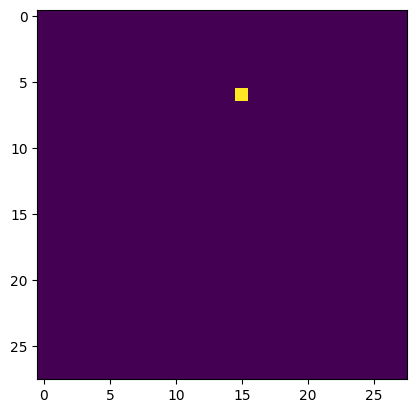


Epoch: 89 | Learning Rate: 0.0001677721600000001
0.02829132415354252
0.02880536951124668
0.02756248228251934
0.028403274714946747
0.02791628986597061
0.02869022637605667
0.03001188114285469
0.02796112187206745
0.027459803968667984
0.02905411645770073
0.027866829186677933
0.02691205032169819
0.029930705204606056
0.027949322015047073
0.029763374477624893
0.027700789272785187
0.027879372239112854
0.027758261188864708
0.028181927278637886
0.02816156856715679
0.028575900942087173
0.0288557019084692
0.02805938944220543
0.03006873093545437
0.030357053503394127
0.027881748974323273
0.02752956561744213
0.02750927023589611
0.027988072484731674
0.02861201763153076
0.028097646310925484
0.02932799980044365
0.028678998351097107
0.027699517086148262
0.030570296570658684
0.028607213869690895
0.02829378843307495
0.029594654217362404
0.028938427567481995
0.02925870381295681
0.02832065336406231
0.028143789619207382
0.02874124050140381
0.02897900901734829
0.028033610433340073
0.027439149096608162
0.02784

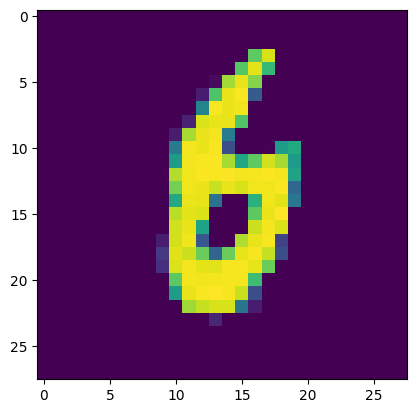


Epoch: 90 | Learning Rate: 0.0001677721600000001
0.028769494965672493
0.028996555134654045
0.02892063558101654
0.02902522124350071
0.0278718713670969
0.028830386698246002
0.026986734941601753
0.0305954460054636
0.02826767787337303
0.029789935797452927
0.029124142602086067
0.030185198411345482
0.02898440510034561
0.02589402347803116
0.027647003531455994
0.030176274478435516
0.028655637055635452
0.028036998584866524
0.031525615602731705
0.02856905572116375
0.0264284610748291
0.028970694169402122
0.02723449468612671
0.0267985537648201
0.028197161853313446
0.028566505759954453
0.028204776346683502
0.029514316469430923
0.02885763719677925
0.02839614823460579
0.02827662229537964
0.028045549988746643
0.029610317200422287
0.026999840512871742
0.0299167912453413
0.02838505432009697
0.031248420476913452
0.029726168140769005
0.027925895527005196
0.027688417583703995
0.026724282652139664
0.026619570329785347
0.028858594596385956
0.028468433767557144
0.02647443674504757
0.02951202355325222
0.02865

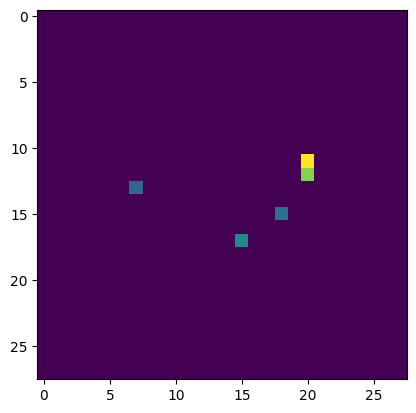


Epoch: 91 | Learning Rate: 0.00013421772800000008
0.027630895376205444
0.03197262063622475
0.02807764522731304
0.03016512654721737
0.029722733423113823
0.026948558166623116
0.027254074811935425
0.028179477900266647
0.03108851984143257
0.028674893081188202
0.028610261157155037
0.027583245187997818
0.029625436291098595
0.02866765297949314
0.029556075111031532
0.029140016064047813
0.027382636442780495
0.02938801608979702
0.029068727046251297
0.03187965229153633
0.02965954877436161
0.029335705563426018
0.028823912143707275
0.028408285230398178
0.02944716066122055
0.028978588059544563
0.029416648671030998
0.027730198577046394
0.03041895478963852
0.028205515816807747
0.029050257056951523
0.028533698990941048
0.027815667912364006
0.027747347950935364
0.028406035155057907
0.026546740904450417
0.02970782108604908
0.028812069445848465
0.02962404116988182
0.02939063310623169
0.029228640720248222
0.02648874931037426
0.02687619999051094
0.02775147370994091
0.02883000485599041
0.027951419353485107


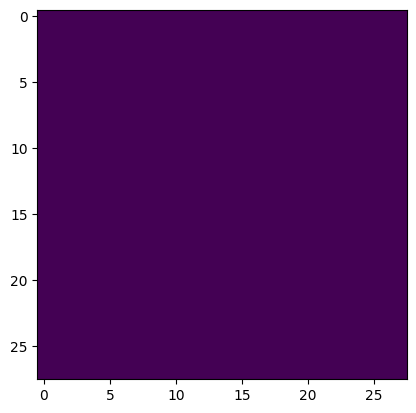


Epoch: 92 | Learning Rate: 0.00013421772800000008
0.026269987225532532
0.029402900487184525
0.029503218829631805
0.029217267408967018
0.028293214738368988
0.028745461255311966
0.030515480786561966
0.027806418016552925
0.029070967808365822
0.03075440414249897
0.029973797500133514
0.02948087826371193
0.027891533449292183
0.030540097504854202
0.027945129200816154
0.02882876619696617
0.02917557768523693
0.029299475252628326
0.028440045192837715
0.030592182651162148
0.030029619112610817
0.027108455076813698
0.030766936019062996
0.031121326610445976
0.029744857922196388
0.030410662293434143
0.0291725005954504
0.02978655695915222
0.028756972402334213
0.029747646301984787
0.027429040521383286
0.028151219710707664
0.02806699275970459
0.028183167800307274
0.030099298804998398
0.030202295631170273
0.02705238200724125
0.02861752174794674
0.02717018499970436
0.027675621211528778
0.028156299144029617
0.02910582721233368
0.02834360860288143
0.029240131378173828
0.029756803065538406
0.027486715465784

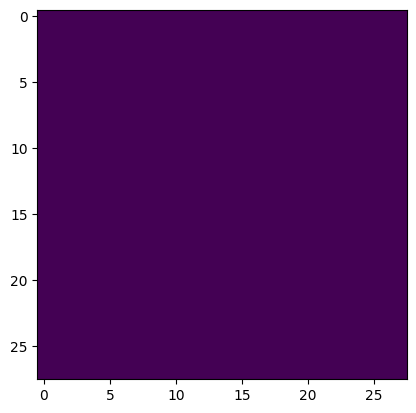


Epoch: 93 | Learning Rate: 0.00013421772800000008
0.029521100223064423
0.028950762003660202
0.02860558219254017
0.029780985787510872
0.028285527601838112
0.028411749750375748
0.02659793570637703
0.028543394058942795
0.02654086984694004
0.027095051482319832
0.028498278930783272
0.02779492549598217
0.027254823595285416
0.027510367333889008
0.029857929795980453
0.030206918716430664
0.02977718599140644
0.029831163585186005
0.030022211372852325
0.028765177354216576
0.029188016429543495
0.027532069012522697
0.02830369956791401
0.026288218796253204
0.02793087437748909
0.028045687824487686
0.028748219832777977
0.030412157997488976
0.02950288914144039
0.02849959209561348
0.026994304731488228
0.026862002909183502
0.026654863730072975
0.026550723239779472
0.029427243396639824
0.029835287481546402
0.027095001190900803
0.028912244364619255
0.026941800490021706
0.026344390586018562
0.028444761410355568
0.027788376435637474
0.028546232730150223
0.028515230864286423
0.030957143753767014
0.02931024506

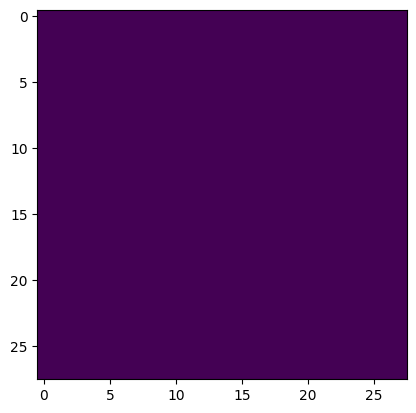


Epoch: 94 | Learning Rate: 0.00013421772800000008
0.03029438853263855
0.024503644555807114
0.029613658785820007
0.028893543407320976
0.02890644781291485
0.030142709612846375
0.02745826728641987
0.03014705330133438
0.027539463713765144
0.026995448395609856
0.027232211083173752
0.025778699666261673
0.02780986577272415
0.029220417141914368
0.027868956327438354
0.02672918513417244
0.02712191827595234
0.02860907092690468
0.028887681663036346
0.02961003966629505
0.02750145085155964
0.02654152363538742
0.02940073050558567
0.027457263320684433
0.029474275186657906
0.029931316152215004
0.029149137437343597
0.028534581884741783
0.027290960773825645
0.02793947421014309
0.028092369437217712
0.028832055628299713
0.029602346941828728
0.0284524355083704
0.03153735771775246
0.026945283636450768
0.02956739254295826
0.028063498437404633
0.028689466416835785
0.029775472357869148
0.029160646721720695
0.02793075516819954
0.028107430785894394
0.027699008584022522
0.0283528920263052
0.02842705138027668
0.02

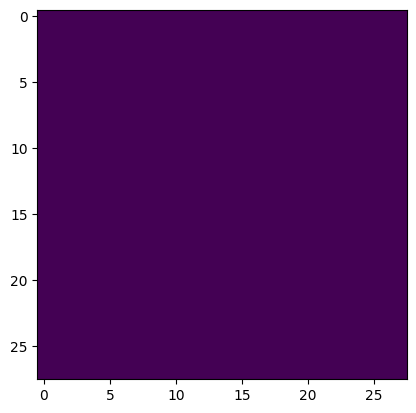


Epoch: 95 | Learning Rate: 0.00013421772800000008
0.02919093146920204
0.030396517366170883
0.028301743790507317
0.02735835686326027
0.02686174027621746
0.027292629703879356
0.028262902051210403
0.029648728668689728
0.028956111520528793
0.030280200764536858
0.02820638194680214
0.028826279565691948
0.027293890714645386
0.02824045717716217
0.028706565499305725
0.028110569342970848
0.02864244021475315
0.03020610846579075
0.029642073437571526
0.02684338390827179
0.02874515950679779
0.027280572801828384
0.028027480468153954
0.03024277649819851
0.028637053444981575
0.02881677635014057
0.028329072520136833
0.02647067792713642
0.02884988859295845
0.029619410634040833
0.027033109217882156
0.029082851484417915
0.02674008347094059
0.02792941778898239
0.027390355244278908
0.028449347242712975
0.029757892712950706
0.02694624476134777
0.028610486537218094
0.026080846786499023
0.02687380649149418
0.02757410518825054
0.030191931873559952
0.02845129184424877
0.02875639498233795
0.02935691922903061
0.02

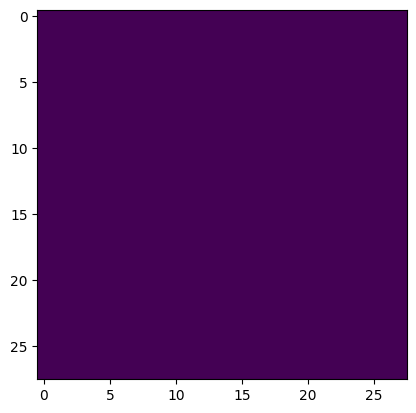


Epoch: 96 | Learning Rate: 0.00013421772800000008
0.02919881045818329
0.028252990916371346
0.02910495176911354
0.02591870166361332
0.02760199084877968
0.027809755876660347
0.029431264847517014
0.029400840401649475
0.029513414949178696
0.02754070982336998
0.02865159511566162
0.028789835050702095
0.028192415833473206
0.030779603868722916
0.028786644339561462
0.028727389872074127
0.02827218547463417
0.028204651549458504
0.027004148811101913
0.028049970045685768
0.02803456410765648
0.027669113129377365
0.030713165178894997
0.028762008994817734
0.029144275933504105
0.029208548367023468
0.02714703045785427
0.02814585343003273
0.03008793666958809
0.029432887211441994
0.02749183215200901
0.029055027291178703
0.028978362679481506
0.027181094512343407
0.03079836815595627
0.026439467445015907
0.031133640557527542
0.027785684913396835
0.030448507517576218
0.02912789396941662
0.030250081792473793
0.02902316488325596
0.028115587309002876
0.02796638384461403
0.028989341109991074
0.029381951317191124

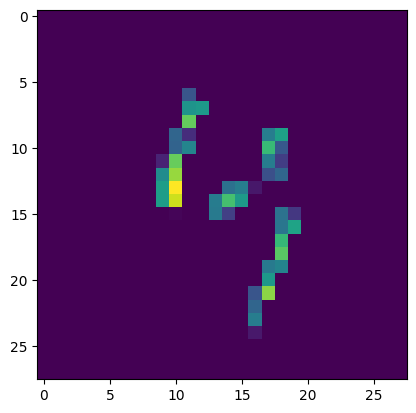


Epoch: 97 | Learning Rate: 0.00013421772800000008
0.026702038943767548
0.027443189173936844
0.02943209744989872
0.02914024330675602
0.02987024001777172
0.026390541344881058
0.02907964028418064
0.0291751716285944
0.03134101629257202
0.027924396097660065
0.029817938804626465
0.02683546580374241
0.028912946581840515
0.029611241072416306
0.028418058529496193
0.02929666079580784
0.027359772473573685
0.027797989547252655
0.027944495901465416
0.027720017358660698
0.02910451963543892
0.029228467494249344
0.029289746657013893
0.029054181650280952
0.02778157778084278
0.02822679653763771
0.02963024005293846
0.02884516306221485
0.03138517588376999
0.02926638163626194
0.026887932792305946
0.030278189107775688
0.029018616303801537
0.02839377149939537
0.024394527077674866
0.030635757371783257
0.029531555250287056
0.02781297266483307
0.03100053407251835
0.028619447723031044
0.028537722304463387
0.02890857867896557
0.02779923751950264
0.02785607986152172
0.028131168335676193
0.02772131934762001
0.0294

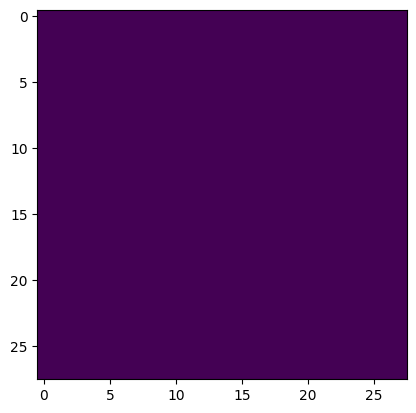


Epoch: 98 | Learning Rate: 0.00013421772800000008
0.027979915961623192
0.02824265882372856
0.03143920749425888
0.028526270762085915
0.028958989307284355
0.028326237574219704
0.026851149275898933
0.03021099977195263
0.02777857892215252
0.028212837874889374
0.029177356511354446
0.026622284203767776
0.02833934873342514
0.028769517317414284
0.027784204110503197
0.029143333435058594
0.029922151938080788
0.02761583775281906
0.0287532526999712
0.028160082176327705
0.02961796149611473
0.02937360107898712
0.029653234407305717
0.029689624905586243
0.029076937586069107
0.027914393693208694
0.02820618636906147
0.029432544484734535
0.026946019381284714
0.02868708409368992
0.029814593493938446
0.028592972084879875
0.028323598206043243
0.03004194237291813
0.02832447737455368
0.02934371680021286
0.027155185118317604
0.029480013996362686
0.02934783697128296
0.027451589703559875
0.02813556231558323
0.028574418276548386
0.028905043378472328
0.027763940393924713
0.02754904329776764
0.028537865728139877
0

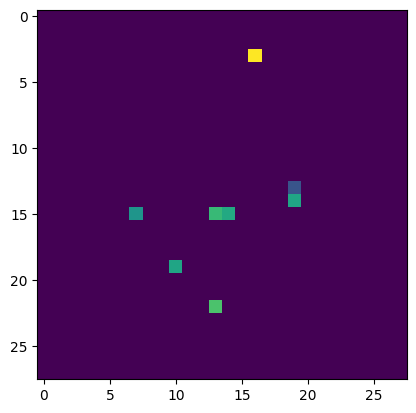


Epoch: 99 | Learning Rate: 0.00013421772800000008
0.028874842450022697
0.02818729355931282
0.027926551178097725
0.029664870351552963
0.030030475929379463
0.029369626194238663
0.028050577268004417
0.026780329644680023
0.02923642471432686
0.02810211479663849
0.027343831956386566
0.026819508522748947
0.02806282974779606
0.02867134101688862
0.029545798897743225
0.02956937626004219
0.02834070846438408
0.02849140577018261
0.027290280908346176
0.03149547800421715
0.02834342233836651
0.025777844712138176
0.028104078024625778
0.028552517294883728
0.02930719405412674
0.02854372002184391
0.028787845745682716
0.027376702055335045
0.029709286987781525
0.02698368951678276
0.030746109783649445
0.028523346409201622
0.027379509061574936
0.02846406400203705
0.029752997681498528
0.026786375790834427
0.027267664670944214
0.028948785737156868
0.029656443744897842
0.028167227283120155
0.029228074476122856
0.02817016839981079
0.02990145795047283
0.028308313339948654
0.02743734046816826
0.026024265214800835


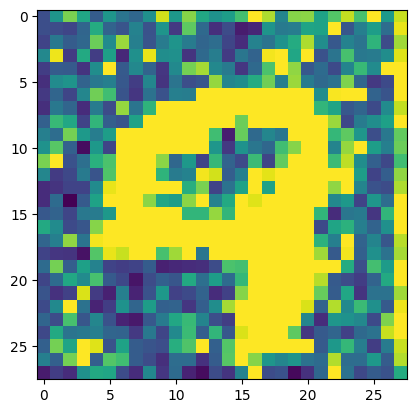


Epoch: 100 | Learning Rate: 0.00013421772800000008
0.02824658527970314
0.02795998938381672
0.0279920045286417
0.02967684529721737
0.02904324047267437
0.02657756395637989
0.028397491201758385
0.03023756667971611
0.02646649070084095
0.02729237824678421
0.027804791927337646
0.027658505365252495
0.028485389426350594
0.02894657477736473
0.029630281031131744
0.02702436037361622
0.027875438332557678
0.026095092296600342
0.029615269973874092
0.027241485193371773
0.03061223030090332
0.030378691852092743
0.027514826506376266
0.030910026282072067
0.027906306087970734
0.02885584533214569
0.02727953903377056
0.027325769886374474
0.029052909463644028
0.02781282737851143
0.029570214450359344
0.028204815462231636
0.029497109353542328
0.02836422435939312
0.028360607102513313
0.030488554388284683
0.02880117855966091
0.029658691957592964
0.027503889054059982
0.02855294570326805
0.029517898336052895
0.029363984242081642
0.02970876172184944
0.028908733278512955
0.029551565647125244
0.02849818766117096
0.0

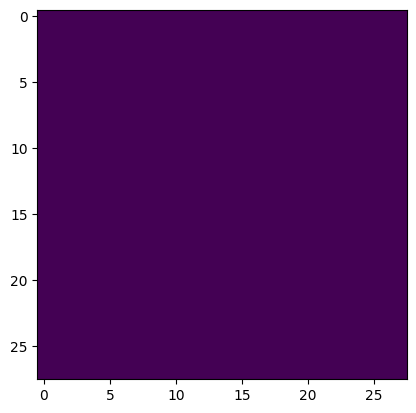


Epoch: 101 | Learning Rate: 0.00010737418240000007
0.027184201404452324
0.030295154079794884
0.02948824129998684
0.027744589373469353
0.027718709781765938
0.029348978772759438
0.027765514329075813
0.027404962107539177
0.028333349153399467
0.029936999082565308
0.030362488701939583
0.027735009789466858
0.030543342232704163
0.026768989861011505
0.02879496105015278
0.028926629573106766
0.028810465708374977
0.02787463553249836
0.02792852185666561
0.028243906795978546
0.028821570798754692
0.027793655171990395
0.0274820514023304
0.027469541877508163
0.027376579120755196
0.029111497104167938
0.02808448113501072
0.02648826502263546
0.030021389946341515
0.02966185472905636
0.03082333877682686
0.02941707707941532
0.027870705351233482
0.028553519397974014
0.029066450893878937
0.02829715609550476
0.02892378903925419
0.0289948470890522
0.02835325337946415
0.029532091692090034
0.027722425758838654
0.03044159710407257
0.03012920543551445
0.030170559883117676
0.02808430604636669
0.030793512240052223
0

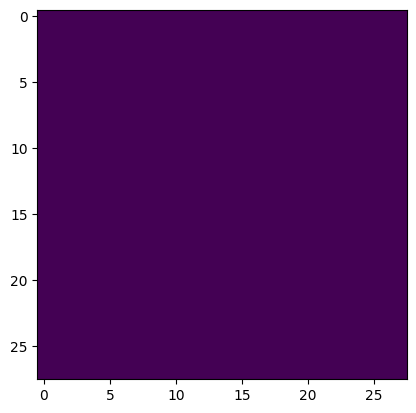


Epoch: 102 | Learning Rate: 0.00010737418240000007
0.029811536893248558
0.02775503881275654
0.02837739698588848
0.02828853391110897
0.028054801747202873
0.026368554681539536
0.029072215780615807
0.028037969022989273
0.029104840010404587
0.029202457517385483
0.02783937379717827
0.02789200469851494
0.02807328850030899
0.02771209552884102
0.02846326120197773
0.02745278924703598
0.026940569281578064
0.030077513307332993
0.028570281341671944
0.028480475768446922
0.030070457607507706
0.02686889097094536
0.030423277989029884
0.02723897621035576
0.028392907232046127
0.027073705568909645
0.028093229979276657
0.027781382203102112
0.02724447473883629
0.028043946251273155
0.027445681393146515
0.028477536514401436
0.02857574261724949
0.02822430059313774
0.028261376544833183
0.02865542098879814
0.027565808966755867
0.02897929772734642
0.0305106732994318
0.02981993556022644
0.027787012979388237
0.02693982608616352
0.02771657705307007
0.028741251677274704
0.02874547615647316
0.03007800504565239
0.028

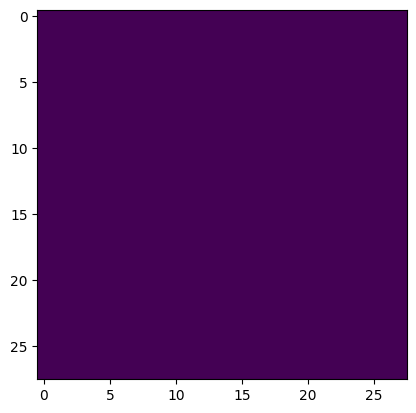


Epoch: 103 | Learning Rate: 0.00010737418240000007
0.026454130187630653
0.028676392510533333
0.02789469063282013
0.02926054410636425
0.027141619473695755
0.029313433915376663
0.028814764693379402
0.027993476018309593
0.02882258966565132
0.029357854276895523
0.027534406632184982
0.02780952677130699
0.02895878069102764
0.02892928197979927
0.02932228520512581
0.029896602034568787
0.028702357783913612
0.02962408773601055
0.03006020374596119
0.028153426945209503
0.02831113710999489
0.02988417260348797
0.0286423247307539
0.02787374146282673
0.027850912883877754
0.02757982723414898
0.028153978288173676
0.029797397553920746
0.02855011075735092
0.02786611020565033
0.028722476214170456
0.026180816814303398
0.02963383123278618
0.02762707509100437
0.029191521927714348
0.028226859867572784
0.029129967093467712
0.027345307171344757
0.028036730363965034
0.030248641967773438
0.029008762910962105
0.029589926823973656
0.029780205339193344
0.02719138003885746
0.027779491618275642
0.027669444680213928
0.

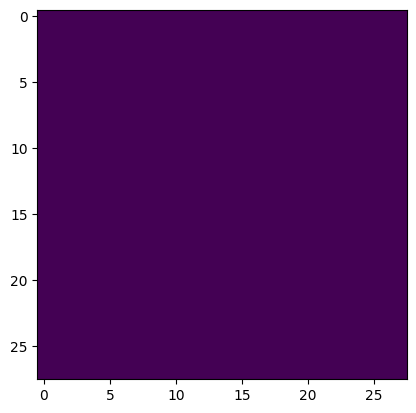


Epoch: 104 | Learning Rate: 0.00010737418240000007
0.030149245634675026
0.029013248160481453
0.030273502692580223
0.02898062765598297
0.028062578290700912
0.027829058468341827
0.02628682740032673
0.028482582420110703
0.030013317242264748
0.028959738090634346
0.028234198689460754
0.02901480533182621
0.03133375197649002
0.028459087014198303
0.029563991352915764
0.030256615951657295
0.029071006923913956
0.029554883018136024
0.0278116874396801
0.027789300307631493
0.029235228896141052
0.027921639382839203
0.030812585726380348
0.02798463962972164
0.028643952682614326
0.028019731864333153
0.029333584010601044
0.028090354055166245
0.028363224118947983
0.027412351220846176
0.029445480555295944
0.028344515711069107
0.026832755655050278
0.029443565756082535
0.02969811111688614
0.027526041492819786
0.028745098039507866
0.027551090344786644
0.028166038915514946
0.029989168047904968
0.028090227395296097
0.030578607693314552
0.0285539198666811
0.02960606850683689
0.025141725316643715
0.029021101072

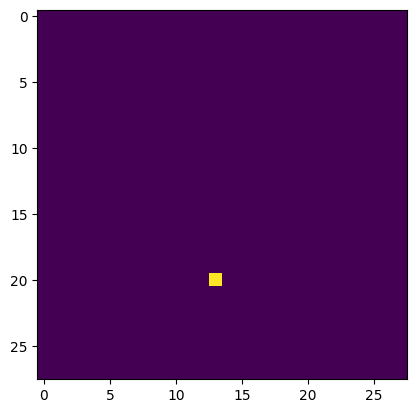


Epoch: 105 | Learning Rate: 0.00010737418240000007
0.027869554236531258
0.027510933578014374
0.02929581329226494
0.03043394163250923
0.02907435968518257
0.029256528243422508
0.03118736669421196
0.029081622138619423
0.02919701114296913
0.028343573212623596
0.028794515877962112
0.029278643429279327
0.02818896435201168
0.029368603602051735
0.027298450469970703
0.028438858687877655
0.028713837265968323
0.02718251571059227
0.02812236174941063
0.027601175010204315
0.028585029765963554
0.02744143456220627
0.029121890664100647
0.028919167816638947
0.029424726963043213
0.027612512931227684
0.027571454644203186
0.02926071733236313
0.02701725997030735
0.029835740104317665
0.028541430830955505
0.02812327817082405
0.030488494783639908
0.028609499335289
0.028249191120266914
0.029368886724114418
0.02827763557434082
0.02936365269124508
0.026628686115145683
0.027118423953652382
0.029449550434947014
0.027205975726246834
0.028328174725174904
0.02865694649517536
0.027441997081041336
0.026756519451737404


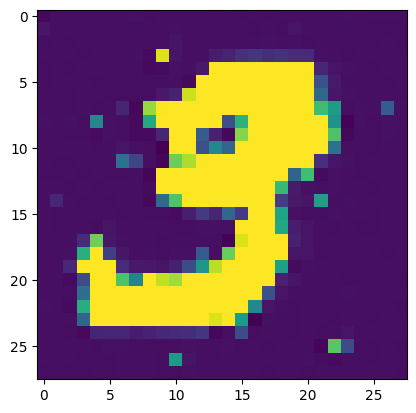


Epoch: 106 | Learning Rate: 0.00010737418240000007
0.02774789370596409
0.028520286083221436
0.028973111882805824
0.029795456677675247
0.026480605825781822
0.02716253511607647
0.028650235384702682
0.02716214768588543
0.029942618682980537
0.02706748992204666
0.027091089636087418
0.02998529188334942
0.028491826727986336
0.028360998257994652
0.028356293216347694
0.030473273247480392
0.02703588269650936
0.027729880064725876
0.028913414105772972
0.02933325059711933
0.028707759454846382
0.030668703839182854
0.028848035261034966
0.028666749596595764
0.02756436914205551
0.02757531963288784
0.028343943879008293
0.027390042319893837
0.02791404165327549
0.02881125919520855
0.029497886076569557
0.02728429064154625
0.028810763731598854
0.028257539495825768
0.02834554947912693
0.026555590331554413
0.027650929987430573
0.029311539605259895
0.030349740758538246
0.02750796638429165
0.029349222779273987
0.028964722529053688
0.029100144281983376
0.026910418644547462
0.02856537513434887
0.0282382015138864

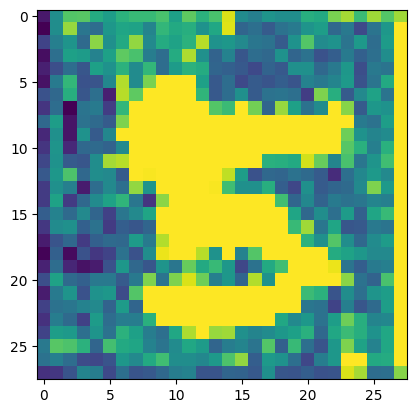


Epoch: 107 | Learning Rate: 0.00010737418240000007
0.02826342172920704
0.029486365616321564
0.0301413144916296
0.029131969437003136
0.02947372756898403
0.02700851857662201
0.02835296280682087
0.026177186518907547
0.028963947668671608
0.026981785893440247
0.030104313045740128
0.03051919862627983
0.028302757069468498
0.02997989021241665
0.028459208086133003
0.028518375009298325
0.02882944792509079
0.027111874893307686
0.027096671983599663
0.030151773244142532
0.028095200657844543
0.028517352417111397
0.02671009674668312
0.028743283823132515
0.028339633718132973
0.029936864972114563
0.029210275039076805
0.027742652222514153
0.027036046609282494
0.027394341304898262
0.02781728282570839
0.028356490656733513
0.027923960238695145
0.027272749692201614
0.030693618580698967
0.028615165501832962
0.029344504699110985
0.027615994215011597
0.029295843094587326
0.026162315160036087
0.028769876807928085
0.029239283874630928
0.028776628896594048
0.02819087915122509
0.02863432466983795
0.02857960388064

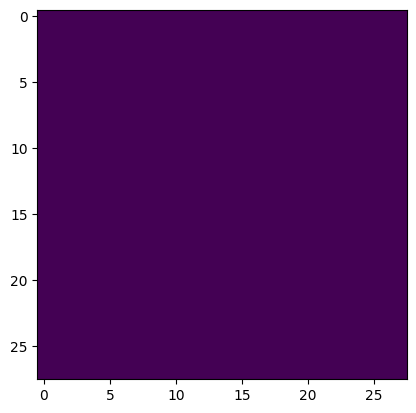


Epoch: 108 | Learning Rate: 0.00010737418240000007
0.027650421485304832
0.027741067111492157
0.030040256679058075
0.029302367940545082
0.02606687881052494
0.028838472440838814
0.030134018510580063
0.029014388099312782
0.027983160689473152
0.031228400766849518
0.027926843613386154
0.02899795025587082
0.028452599421143532
0.027381062507629395
0.02847558818757534
0.028327517211437225
0.027560075744986534
0.029624447226524353
0.02688143588602543
0.030230475589632988
0.028460772708058357
0.026523509994149208
0.030367664992809296
0.02954341471195221
0.026882484555244446
0.029403066262602806
0.02865316905081272
0.028273116797208786
0.02822505682706833
0.02733089029788971
0.027104096487164497
0.027808524668216705
0.029233034700155258
0.02897285670042038
0.027862360700964928
0.027989715337753296
0.028012383729219437
0.029142946004867554
0.02686256729066372
0.026687681674957275
0.02860296703875065
0.028910553082823753
0.030005328357219696
0.02882467955350876
0.02967596799135208
0.02643945254385

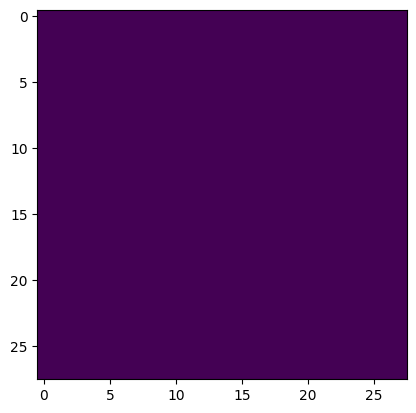


Epoch: 109 | Learning Rate: 0.00010737418240000007
0.02776552177965641
0.02962312288582325
0.029747096821665764
0.029185578227043152
0.027126209810376167
0.027840765193104744
0.028135422617197037
0.027764474973082542
0.02986249513924122
0.028568310663104057
0.029272720217704773
0.02723284251987934
0.02894681692123413
0.029270945116877556
0.02888782136142254
0.028256617486476898
0.02874438278377056
0.028305720537900925
0.029066333547234535
0.02737048640847206
0.02924889139831066
0.027932876721024513
0.0300515815615654
0.027312710881233215
0.029189961031079292
0.029261991381645203
0.02650752104818821
0.02704385481774807
0.030205799266695976
0.031082745641469955
0.02780732698738575
0.02619611844420433
0.02851354330778122
0.026886776089668274
0.027182625606656075
0.028165914118289948
0.029344387352466583
0.02833329327404499
0.027670448645949364
0.02798265777528286
0.029061151668429375
0.02971566468477249
0.02913518249988556
0.02966359071433544
0.029596267268061638
0.02775641530752182
0.02

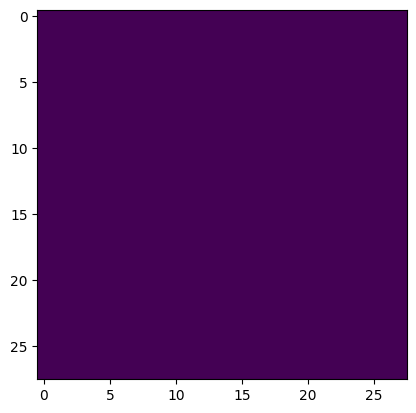


Epoch: 110 | Learning Rate: 0.00010737418240000007
0.0290142260491848
0.031413257122039795
0.028807975351810455
0.030093710869550705
0.027955804020166397
0.030241046100854874
0.029458455741405487
0.02961619384586811
0.027547912672162056
0.028531352058053017
0.027305595576763153
0.02741391770541668
0.02670043520629406
0.028283312916755676
0.028133844956755638
0.028561212122440338
0.02763771265745163
0.02979055605828762
0.028870323672890663
0.026483718305826187
0.027998941019177437
0.029980216175317764
0.026444755494594574
0.029966937378048897
0.02659577876329422
0.029644791036844254
0.027017220854759216
0.02956642396748066
0.02805948629975319
0.029272984713315964
0.028375975787639618
0.028191687539219856
0.02871771901845932
0.02801293134689331
0.026260964572429657
0.02805384248495102
0.02679254114627838
0.03055720590054989
0.030154675245285034
0.029566973447799683
0.027491752058267593
0.026050442829728127
0.027708636596798897
0.030161874368786812
0.0276192594319582
0.028827359899878502

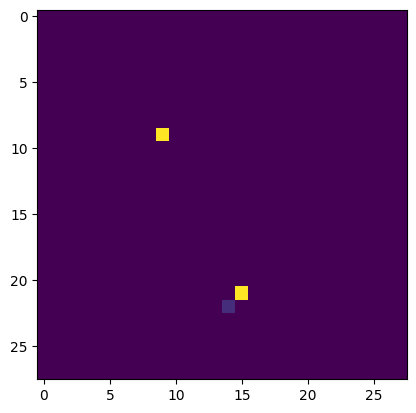


Epoch: 111 | Learning Rate: 8.589934592000007e-05
0.029401978477835655
0.027263110503554344
0.028076251968741417
0.029321817681193352
0.029005633667111397
0.02907567471265793
0.030191875994205475
0.02909708395600319
0.029668457806110382
0.026710305362939835
0.027897052466869354
0.027002662420272827
0.02854202687740326
0.028773682191967964
0.027364643290638924
0.028804754838347435
0.02942304126918316
0.028228966519236565
0.02682415582239628
0.02888290211558342
0.02599199488759041
0.031940069049596786
0.0276093240827322
0.0298025943338871
0.026390643790364265
0.028946593403816223
0.0294945128262043
0.0256375540047884
0.02799849584698677
0.027405837550759315
0.028750402852892876
0.02986256405711174
0.026369161903858185
0.026611721143126488
0.027172470465302467
0.03008899837732315
0.02811836637556553
0.029437148943543434
0.027265651151537895
0.031345538794994354
0.029199356213212013
0.026795601472258568
0.028025547042489052
0.027330724522471428
0.026875145733356476
0.028202859684824944
0.

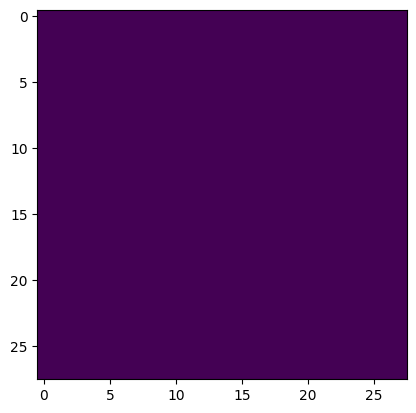


Epoch: 112 | Learning Rate: 8.589934592000007e-05
0.027931563556194305
0.028082365170121193
0.027412548661231995
0.028940537944436073
0.028202900663018227
0.028496479615569115
0.028042612597346306
0.02813635766506195
0.02964838035404682
0.029550282284617424
0.02932869829237461
0.027805693447589874
0.027754804119467735
0.02756696753203869
0.026866411790251732
0.027848608791828156
0.031155085191130638
0.027849899604916573
0.02696988917887211
0.029413457959890366
0.029077580198645592
0.029944151639938354
0.028313128277659416
0.02949141338467598
0.0298281479626894
0.02843720093369484
0.027979178354144096
0.029537992551922798
0.02901729755103588
0.028265343979001045
0.027255631983280182
0.029176929965615273
0.02958357334136963
0.026656316593289375
0.028429554775357246
0.028147824108600616
0.027072321623563766
0.029000265523791313
0.0278945155441761
0.028291385620832443
0.02818261831998825
0.02721860632300377
0.030230604112148285
0.028331812471151352
0.029721373692154884
0.02902219630777836

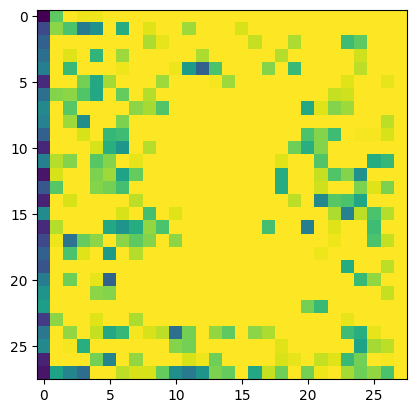


Epoch: 113 | Learning Rate: 8.589934592000007e-05
0.02728833258152008
0.030400985851883888
0.026799920946359634
0.029048943892121315
0.029202640056610107
0.02826247364282608
0.02550906501710415
0.02759220078587532
0.028761476278305054
0.025822408497333527
0.028175847604870796
0.026932360604405403
0.027608690783381462
0.02835129015147686
0.030340636149048805
0.027701450511813164
0.02873131074011326
0.028706979006528854
0.029820188879966736
0.029100125655531883
0.027845337986946106
0.027675680816173553
0.029756808653473854
0.027243414893746376
0.027561357244849205
0.03019135259091854
0.02789897844195366
0.031089577823877335
0.028517279773950577
0.03147288039326668
0.030938031151890755
0.029228175058960915
0.028244610875844955
0.02766375057399273
0.029769813641905785
0.027838388457894325
0.029764126986265182
0.027679745107889175
0.027754802256822586
0.02873736247420311
0.028986835852265358
0.028363827615976334
0.027950583025813103
0.029646586626768112
0.028628239408135414
0.0265531390905

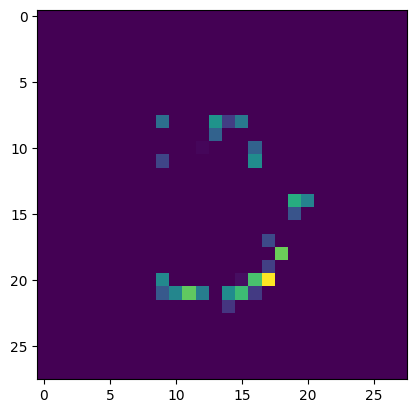


Epoch: 114 | Learning Rate: 8.589934592000007e-05
0.029398195445537567
0.027651503682136536
0.028272662311792374
0.02844184637069702
0.029267242178320885
0.02812931127846241
0.028946783393621445
0.027106454595923424
0.027173679322004318
0.030497726052999496
0.029421444982290268
0.02822805382311344
0.02845899388194084
0.02907586842775345
0.028304286301136017
0.027180587872862816
0.030019549652934074
0.031004779040813446
0.028842775151133537
0.027823904529213905
0.028299570083618164
0.027507299557328224
0.029073428362607956
0.027943478897213936
0.030374180525541306
0.02772708423435688
0.02986058034002781
0.02739129215478897
0.026473017409443855
0.03018713928759098
0.027311690151691437
0.029940765351057053
0.029760148376226425
0.02689133584499359
0.02873217687010765
0.027453875169157982
0.03020576946437359
0.025203119963407516
0.02869230881333351
0.031153269112110138
0.028841177001595497
0.026812275871634483
0.02903575822710991
0.030835548415780067
0.029304787516593933
0.0289475433528423

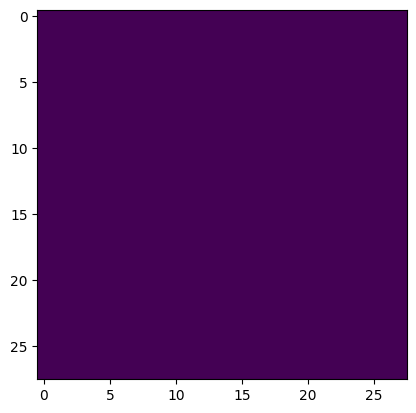


Epoch: 115 | Learning Rate: 8.589934592000007e-05
0.02733103558421135
0.030342936515808105
0.029642164707183838
0.027652839198708534
0.02910422906279564
0.02908347360789776
0.027923962101340294
0.028579210862517357
0.028168439865112305
0.028771713376045227
0.028965337201952934
0.02758471481502056
0.029891137033700943
0.02808246947824955
0.02861236035823822
0.02767883613705635
0.029817858710885048
0.03096850775182247
0.026167158037424088
0.027276281267404556
0.0282543133944273
0.026198022067546844
0.02807176299393177
0.02678701840341091
0.03094613552093506
0.028854483738541603
0.027536258101463318
0.027518875896930695
0.028374075889587402
0.027608145028352737
0.028864465653896332
0.027881823480129242
0.026004204526543617
0.027049103751778603
0.02826733887195587
0.02880179136991501
0.02802005596458912
0.02694372646510601
0.030258936807513237
0.029878849163651466
0.026361508294939995
0.028784357011318207
0.027698131278157234
0.028971929103136063
0.02930685319006443
0.028307326138019562
0

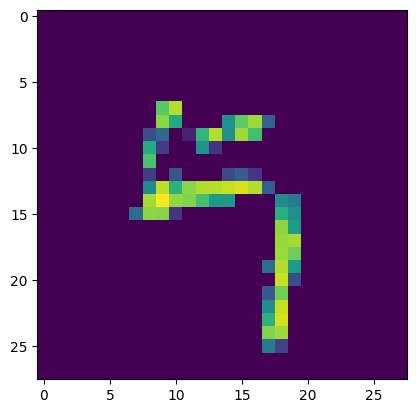


Epoch: 116 | Learning Rate: 8.589934592000007e-05
0.027649255469441414
0.028145376592874527
0.027951639145612717
0.027793942019343376
0.026849262416362762
0.029662754386663437
0.027229098603129387
0.028625648468732834
0.029622800648212433
0.02937941811978817
0.030175799503922462
0.027246840298175812
0.028940264135599136
0.02796114608645439
0.02887304313480854
0.02851639874279499
0.02868826501071453
0.02934548258781433
0.028102926909923553
0.027374211698770523
0.027632245793938637
0.02877868339419365
0.028671473264694214
0.029118936508893967
0.02777761220932007
0.028951013460755348
0.02841862291097641
0.029435113072395325
0.02936554327607155
0.02757635898888111
0.027046117931604385
0.028599407523870468
0.029618028551340103
0.027755411341786385
0.029642298817634583
0.028151705861091614
0.026349853724241257
0.026589440181851387
0.02981269545853138
0.0267668254673481
0.029077425599098206
0.025581926107406616
0.029851151630282402
0.027360228821635246
0.028942560777068138
0.0279131587594747

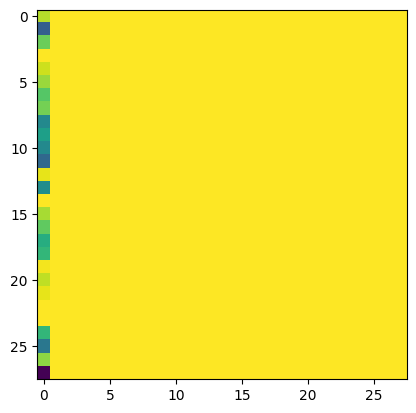


Epoch: 117 | Learning Rate: 8.589934592000007e-05
0.030298808589577675
0.028973987326025963
0.03151121735572815
0.02762361615896225
0.028835777193307877
0.02752983756363392
0.02998427487909794
0.026807185262441635
0.027382144704461098
0.026885829865932465
0.02770071290433407
0.028009871020913124
0.02866716869175434
0.03155164048075676
0.029359541833400726
0.026454752311110497
0.027179770171642303
0.02755095064640045
0.02774706296622753
0.028317710384726524
0.028027886524796486
0.029211532324552536
0.028863592073321342
0.027690934017300606
0.030270982533693314
0.028897732496261597
0.0287428330630064
0.02967984788119793
0.02944098226726055
0.0278447438031435
0.029525859281420708
0.02715989202260971
0.02746274136006832
0.02805636264383793
0.028950436040759087
0.02874366007745266
0.02647865191102028
0.027832407504320145
0.028196370229125023
0.027698969468474388
0.03144989535212517
0.028542257845401764
0.02742527239024639
0.029828688129782677
0.02873379737138748
0.02751060575246811
0.02778

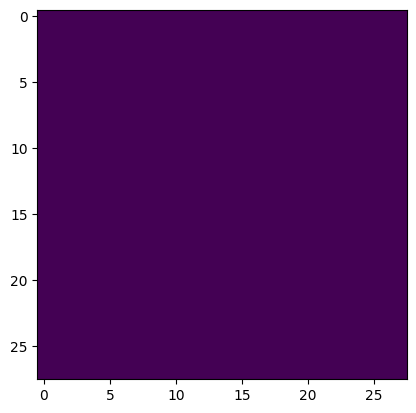


Epoch: 118 | Learning Rate: 8.589934592000007e-05
0.030821939930319786
0.02858613431453705
0.02686026133596897
0.0292335394769907
0.02542565017938614
0.029688699170947075
0.02896104007959366
0.0304114930331707
0.028087591752409935
0.02891828678548336
0.028541266918182373
0.031654831022024155
0.02780204825103283
0.02938300184905529
0.02599331922829151
0.027753673493862152
0.02670484595000744
0.028611207380890846
0.0286956075578928
0.028715046122670174
0.029014430940151215
0.028112873435020447
0.028216969221830368
0.027049798518419266
0.030549606308341026
0.02822106145322323
0.029062530025839806
0.026833949610590935
0.029200388118624687
0.029509713873267174
0.027895839884877205
0.02877722680568695
0.027788937091827393
0.029452405869960785
0.027889002114534378
0.028445158153772354
0.030321983620524406
0.02575935609638691
0.027117982506752014
0.028685785830020905
0.029146896675229073
0.02838509902358055
0.028108302503824234
0.027012303471565247
0.02874492108821869
0.02846943773329258
0.02

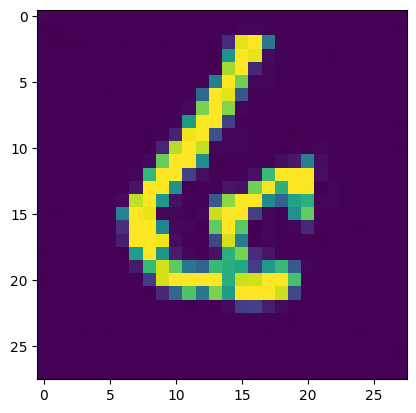


Epoch: 119 | Learning Rate: 8.589934592000007e-05
0.02689327858388424
0.028719069436192513
0.02628188207745552
0.02893865294754505
0.03001984767615795
0.02599864825606346
0.02969762496650219
0.029046479612588882
0.0282150786370039
0.028039999306201935
0.028216363862156868
0.030155936256051064
0.0293196402490139
0.029171835631132126
0.029454099014401436
0.02802327461540699
0.028721284121274948
0.027622075751423836
0.02707304246723652
0.027487365528941154
0.028873948380351067
0.028986716642975807
0.027636228129267693
0.02922172099351883
0.02868022955954075
0.027308577671647072
0.028316084295511246
0.028734084218740463
0.025600023567676544
0.028590993955731392
0.028184393420815468
0.028646772727370262
0.027187999337911606
0.028876958414912224
0.028632692992687225
0.02877889759838581
0.030673298984766006
0.027346856892108917
0.030061423778533936
0.028681783005595207
0.02753852680325508
0.029823876917362213
0.02822999469935894
0.029080240055918694
0.027577538043260574
0.026486137881875038


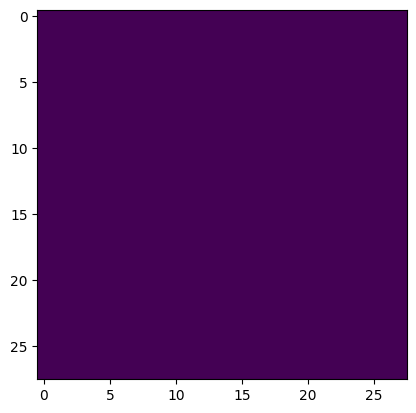


Epoch: 120 | Learning Rate: 8.589934592000007e-05
0.02788550965487957
0.029157603159546852
0.028020763769745827
0.030141688883304596
0.028639016672968864
0.028003010898828506
0.027943206951022148
0.028181379660964012
0.0274934321641922
0.029474832117557526
0.028893616050481796
0.03102954477071762
0.028065914288163185
0.026828814297914505
0.028313161805272102
0.028291717171669006
0.029049372300505638
0.028978291898965836
0.028863901272416115
0.031251002103090286
0.029415728524327278
0.027299106121063232
0.031135305762290955
0.02862892858684063
0.028429532423615456
0.03128974139690399
0.027351561933755875
0.029784202575683594
0.025238867849111557
0.02894735336303711
0.02724652737379074
0.0287244264036417
0.029059555381536484
0.026263542473316193
0.029285823926329613
0.027874629944562912
0.028244616463780403
0.027950908988714218
0.029395656660199165
0.02733212523162365
0.02740047313272953
0.028840815648436546
0.03061477281153202
0.028209339827299118
0.02882201224565506
0.0291984397917985

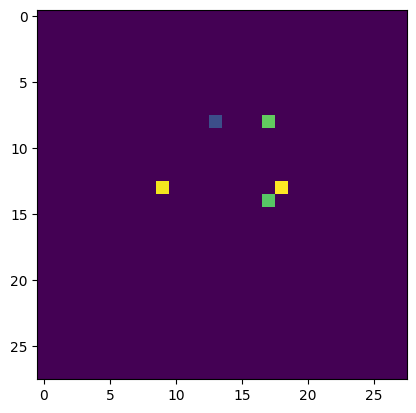


Epoch: 121 | Learning Rate: 6.871947673600006e-05
0.0298515185713768
0.029398761689662933
0.028327511623501778
0.029658598825335503
0.027829822152853012
0.030353117734193802
0.02789154276251793
0.0285753533244133
0.03031364642083645
0.029061345383524895
0.028259342536330223
0.02890869975090027
0.026983177289366722
0.02895400859415531
0.030065909028053284
0.02771383337676525
0.02690315619111061
0.02721453085541725
0.027818802744150162
0.029243838042020798
0.02697536163032055
0.026516759768128395
0.03094218671321869
0.028311509639024734
0.028584027662873268
0.02789670042693615
0.030302193015813828
0.027990976348519325
0.027813905850052834
0.027292640879750252
0.028043273836374283
0.028799930587410927
0.027686987072229385
0.028971044346690178
0.026551226153969765
0.02919253706932068
0.027621973305940628
0.02659483812749386
0.029015183448791504
0.028161106631159782
0.029106255620718002
0.028360143303871155
0.02934807538986206
0.02798684686422348
0.030245808884501457
0.026327310130000114
0

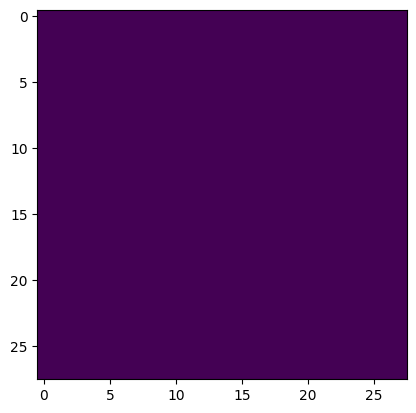


Epoch: 122 | Learning Rate: 6.871947673600006e-05
0.02805420756340027
0.028674248605966568
0.028231162577867508
0.02828025445342064
0.02809770219027996
0.029893457889556885
0.02821396291255951
0.027692724019289017
0.029839197173714638
0.02736295387148857
0.029429001733660698
0.02827211655676365
0.029566923156380653
0.029453271999955177
0.02850036881864071
0.029597055166959763
0.030061813071370125
0.027090320363640785
0.028546979650855064
0.028336219489574432
0.026227740570902824
0.027385935187339783
0.026237579062581062
0.030864771455526352
0.026835616677999496
0.02745334431529045
0.027031488716602325
0.02784229815006256
0.02708582393825054
0.028399208560585976
0.029761970043182373
0.02742634527385235
0.030268853530287743
0.027660252526402473
0.02912435121834278
0.02884896844625473
0.029200788587331772
0.027566008269786835
0.028349680826067924
0.029599206522107124
0.02660990133881569
0.028536705300211906
0.029187727719545364
0.03140074014663696
0.02790677547454834
0.027969028800725937

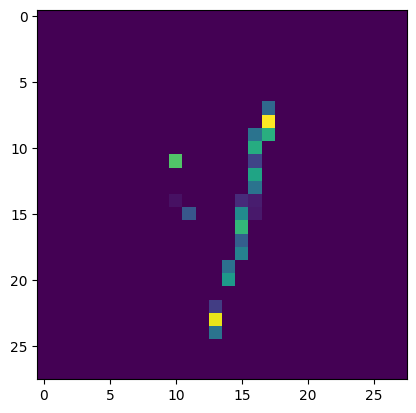


Epoch: 123 | Learning Rate: 6.871947673600006e-05
0.029499702155590057
0.028283575549721718
0.030294187366962433
0.02576853334903717
0.0274068433791399
0.028592424467206
0.030269335955381393
0.029440538957715034
0.02631952241063118
0.029646221548318863
0.028473420068621635
0.028315290808677673
0.028576485812664032
0.029565881937742233
0.02818475477397442
0.029283635318279266
0.02980787307024002
0.02945653162896633
0.02793836034834385
0.030775578692555428
0.028745552524924278
0.029132798314094543
0.02984379045665264
0.026468118652701378
0.0299026258289814
0.028840813785791397
0.028375294059515
0.029236119240522385
0.03012705221772194
0.028097275644540787
0.02872123010456562
0.028126638382673264
0.026050031185150146
0.028351986780762672
0.029781827703118324
0.03033711016178131
0.03002779744565487
0.02562297135591507
0.029795221984386444
0.02828611433506012
0.029025373980402946
0.026711825281381607
0.026686163619160652
0.02857615426182747
0.027657905593514442
0.027299808338284492
0.02692

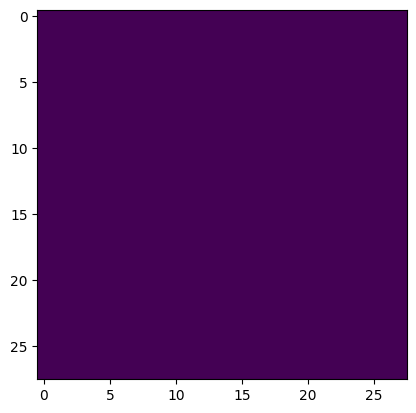


Epoch: 124 | Learning Rate: 6.871947673600006e-05
0.0295251477509737
0.029411587864160538
0.027918443083763123
0.029621023684740067
0.028132472187280655
0.029138486832380295
0.02854337729513645
0.027794767171144485
0.02893485501408577
0.027141915634274483
0.027434324845671654
0.02867472916841507
0.029561631381511688
0.027661848813295364
0.027872880920767784
0.02813916653394699
0.027164097875356674
0.028721364215016365
0.030107811093330383
0.028104055672883987
0.02756781503558159
0.029549432918429375
0.02948436699807644
0.024536332115530968
0.029457418248057365
0.027506494894623756
0.028392720967531204
0.02712899260222912
0.026944009587168694
0.02849326841533184
0.028421390801668167
0.02895001880824566
0.029298562556505203
0.028790747746825218
0.02797243930399418
0.02902069315314293
0.028101088479161263
0.02839367650449276
0.028424423187971115
0.0273709949105978
0.029909122735261917
0.0279583390802145
0.03044833615422249
0.02946256287395954
0.027756933122873306
0.028703415766358376
0.0

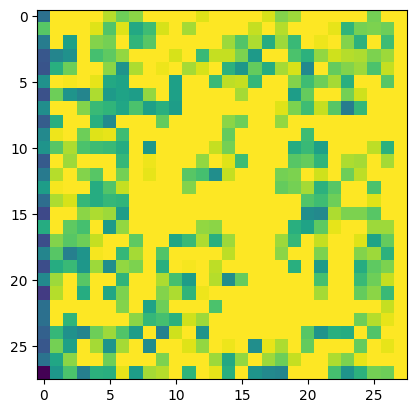


Epoch: 125 | Learning Rate: 6.871947673600006e-05
0.027570562437176704
0.02931479550898075
0.027998505160212517
0.026262963190674782
0.027450161054730415
0.027552882209420204
0.02980414219200611
0.027513831853866577
0.028414929285645485
0.02719985693693161
0.029897792264819145
0.028052810579538345
0.026667557656764984
0.0291388351470232
0.0273508969694376
0.029348041862249374
0.02733808010816574
0.029336128383874893
0.028843548148870468
0.02846301719546318
0.02716647833585739
0.026950305327773094
0.028523797169327736
0.02922748774290085
0.02689276449382305
0.02623562701046467
0.027081036940217018
0.02615375816822052
0.02863139472901821
0.02751750871539116
0.028847243636846542
0.028043659403920174
0.027182675898075104
0.030054394155740738
0.028005091473460197
0.028716279193758965
0.026492364704608917
0.02790912240743637
0.028648339211940765
0.03025643900036812
0.02733040787279606
0.02785629592835903
0.02602234110236168
0.028078721836209297
0.02993999607861042
0.02748115174472332
0.0269

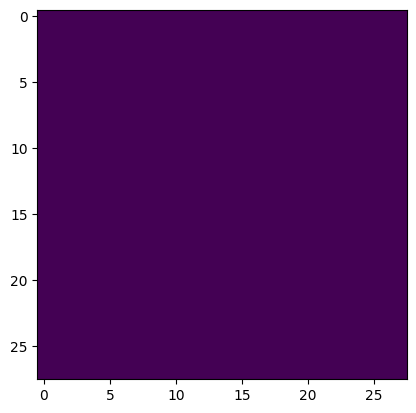


Epoch: 126 | Learning Rate: 6.871947673600006e-05
0.02875051461160183
0.028182944282889366
0.02888467349112034
0.02943706139922142
0.02721398137509823
0.029649624601006508
0.027140405029058456
0.0288850087672472
0.027913780882954597
0.028426704928278923
0.028110790997743607
0.027414659038186073
0.027271606028079987
0.02697409689426422
0.026417342945933342
0.027953047305345535
0.02687354013323784
0.028879880905151367
0.02853679284453392
0.02666737139225006
0.027486229315400124
0.027688942849636078
0.028034137561917305
0.027964167296886444
0.026947513222694397
0.027670875191688538
0.027926065027713776
0.027108805254101753
0.028150808066129684
0.028095431625843048
0.028048280626535416
0.028538504615426064
0.026946453377604485
0.029923057183623314
0.027082983404397964
0.02742607705295086
0.028664778918027878
0.027585715055465698
0.028887983411550522
0.026843737810850143
0.02848348207771778
0.02692115493118763
0.028120391070842743
0.029158668592572212
0.03000648133456707
0.0284827221184968

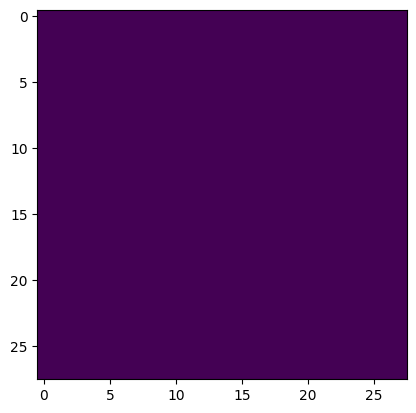


Epoch: 127 | Learning Rate: 6.871947673600006e-05
0.027110710740089417
0.026992131024599075
0.026472769677639008
0.027351150289177895
0.028329864144325256
0.030796300619840622
0.0282552819699049
0.02777089737355709
0.028667721897363663
0.02986724302172661
0.0287215244024992
0.028209926560521126
0.027330482378602028
0.027928313240408897
0.0276950616389513
0.029778599739074707
0.02898377925157547
0.028667746111750603
0.02809884585440159
0.026561632752418518
0.028861312195658684
0.030785540118813515
0.02656659483909607
0.02734001725912094
0.027643032371997833
0.028314443305134773
0.028033224865794182
0.02823311649262905
0.02860093303024769
0.026912331581115723
0.02854265831410885
0.030802005901932716
0.031126119196414948
0.029934609308838844
0.029668768867850304
0.02790902554988861
0.0265819001942873
0.028666982427239418
0.029017774388194084
0.028337255120277405
0.028639432042837143
0.026916055008769035
0.027003131806850433
0.027304014191031456
0.02840418741106987
0.030586490407586098
0.

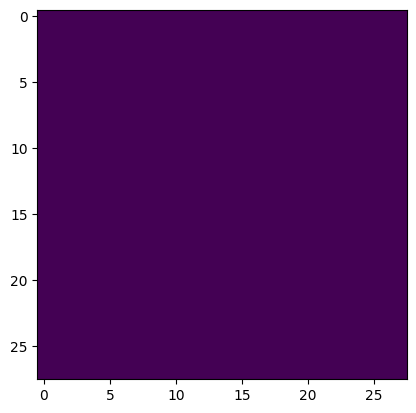


Epoch: 128 | Learning Rate: 6.871947673600006e-05
0.030192062258720398
0.0275502298027277
0.030025063082575798
0.027144772931933403
0.028317026793956757
0.02870805747807026
0.027749674394726753
0.027198882773518562
0.027625760063529015
0.02765803597867489
0.027215179055929184
0.027651455253362656
0.02859438583254814
0.02832775190472603
0.02991890348494053
0.026401568204164505
0.027615414932370186
0.029149461537599564
0.028032373636960983
0.028145400807261467
0.02719198912382126
0.026918310672044754
0.02889931946992874
0.026398777961730957
0.027754776179790497
0.029237911105155945
0.02807433158159256
0.02817438542842865
0.02657420188188553
0.027648793533444405
0.028211582452058792
0.028690114617347717
0.029352812096476555
0.02773088589310646
0.026837008073925972
0.029328763484954834
0.029766038060188293
0.02647855505347252
0.02648577280342579
0.027741609141230583
0.027856342494487762
0.026347121223807335
0.029603740200400352
0.027268651872873306
0.027909381315112114
0.02894941158592701

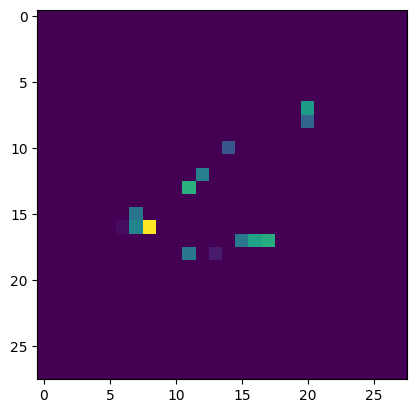


Epoch: 129 | Learning Rate: 6.871947673600006e-05
0.02671969123184681
0.02862188220024109
0.027380483224987984
0.029411179944872856
0.02718970738351345
0.02765345573425293
0.028945397585630417
0.02663598768413067
0.027095960453152657
0.029324844479560852
0.027118019759655
0.027542682364583015
0.02769291028380394
0.028072414919734
0.026644065976142883
0.028127625584602356
0.026151366531848907
0.028308292850852013
0.028895791620016098
0.027982516214251518
0.026901114732027054
0.02704131230711937
0.028471384197473526
0.02684580534696579
0.02479097805917263
0.03039282187819481
0.028241634368896484
0.028900204226374626
0.027643971145153046
0.027620699256658554
0.028065476566553116
0.028352031484246254
0.030069362372159958
0.02732452005147934
0.02744380757212639
0.029083995148539543
0.025556199252605438
0.03084699437022209
0.0292091965675354
0.027380628511309624
0.028704611584544182
0.02796202152967453
0.028475280851125717
0.028107404708862305
0.026175469160079956
0.02800925262272358
0.0293

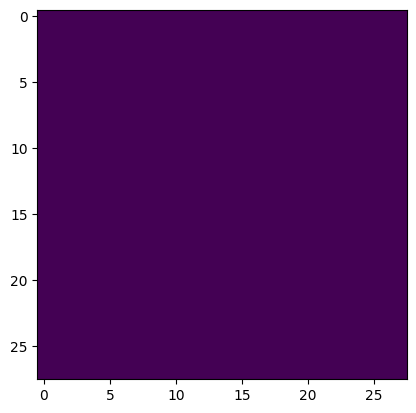


Epoch: 130 | Learning Rate: 6.871947673600006e-05
0.029667440801858902
0.029340237379074097
0.02822536788880825
0.028966562822461128
0.026814686134457588
0.028646420687437057
0.030282357707619667
0.028646191582083702
0.02910515107214451
0.027048755437135696
0.02784685604274273
0.02824879065155983
0.028014393523335457
0.025874968618154526
0.025753123685717583
0.02819228544831276
0.027776945382356644
0.027849523350596428
0.028369197621941566
0.02835920825600624
0.02675778418779373
0.02931077964603901
0.027356168255209923
0.028222111985087395
0.029055163264274597
0.02722707949578762
0.027904443442821503
0.02708597108721733
0.0270273145288229
0.02802872844040394
0.026822322979569435
0.027831509709358215
0.029529087245464325
0.02894025668501854
0.02973785065114498
0.026084739714860916
0.028727976605296135
0.026677925139665604
0.029234325513243675
0.02876141481101513
0.027991866692900658
0.026423867791891098
0.028630027547478676
0.02825351059436798
0.030110402032732964
0.029218636453151703


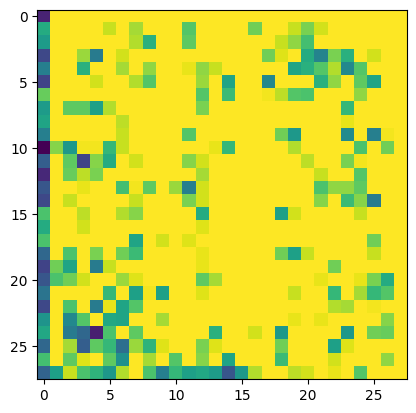


Epoch: 131 | Learning Rate: 5.497558138880005e-05
0.029344066977500916
0.02704126015305519
0.02898622304201126
0.030010581016540527
0.026123693212866783
0.02818080596625805
0.028698734939098358
0.029366327449679375
0.026365868747234344
0.030014192685484886
0.029377678409218788
0.02842921018600464
0.029055891558527946
0.02706177346408367
0.029979603365063667
0.029600564390420914
0.02957352250814438
0.027173561975359917
0.027569465339183807
0.02605939656496048
0.028214924037456512
0.02615988627076149
0.02917509339749813
0.028258834034204483
0.028142444789409637
0.026267142966389656
0.028039395809173584
0.02941502071917057
0.028524598106741905
0.027163369581103325
0.028547553345561028
0.02940864861011505
0.025596318766474724
0.028281215578317642
0.025312505662441254
0.03034316375851631
0.02935192920267582
0.027861623093485832
0.02888033539056778
0.02852500230073929
0.028803201392292976
0.026546228677034378
0.02665826492011547
0.029493555426597595
0.02948692999780178
0.029105011373758316


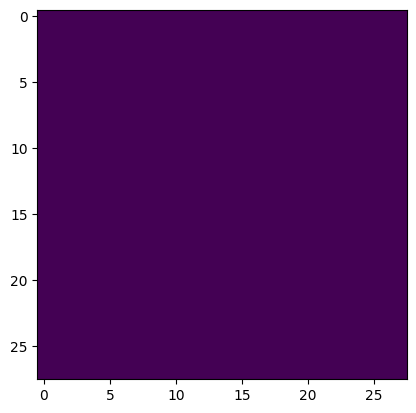


Epoch: 132 | Learning Rate: 5.497558138880005e-05
0.02630263939499855
0.026252994313836098
0.02765054628252983
0.02808816358447075
0.027935205027461052
0.028281159698963165
0.028393883258104324
0.02785658836364746
0.027711840346455574
0.02964327484369278
0.028063729405403137
0.02703290805220604
0.03139742463827133
0.026389067992568016
0.02633042261004448
0.029505178332328796
0.02944078855216503
0.0270698182284832
0.027564840391278267
0.026416119188070297
0.028364144265651703
0.026992300525307655
0.027855047956109047
0.028955794870853424
0.027858305722475052
0.02838789112865925
0.026707414537668228
0.028175318613648415
0.02791249379515648
0.02627643197774887
0.028963176533579826
0.02847481146454811
0.02788858488202095
0.027592400088906288
0.027897611260414124
0.027272602543234825
0.027374155819416046
0.02805079147219658
0.028343399986624718
0.02745085209608078
0.027540581300854683
0.02897130697965622
0.025895196944475174
0.02827518992125988
0.027326131239533424
0.027722328901290894
0.0

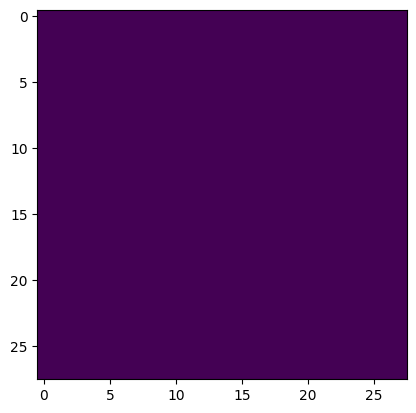


Epoch: 133 | Learning Rate: 5.497558138880005e-05
0.028890959918498993
0.027443639934062958
0.027980560436844826
0.030069010332226753
0.027807140722870827
0.029976725578308105
0.02796364016830921
0.02897513285279274
0.030675537884235382
0.027659721672534943
0.029134584590792656
0.027585383504629135
0.027666879817843437
0.028353875502943993
0.02780602127313614
0.02898753061890602
0.027645615860819817
0.027503596618771553
0.02939065359532833
0.02915986068546772
0.028965706005692482
0.028198117390275
0.027131251990795135
0.02760951966047287
0.02707255817949772
0.02775442786514759
0.029856113716959953
0.029741400852799416
0.027642114087939262
0.025821520015597343
0.02850966528058052
0.02700178511440754
0.027979331091046333
0.027241453528404236
0.02684633620083332
0.026842856779694557
0.027693593874573708
0.028391702100634575
0.028418919071555138
0.027515586465597153
0.02783042937517166
0.029224026948213577
0.026839831843972206
0.028198329731822014
0.0276784747838974
0.028899060562253
0.02

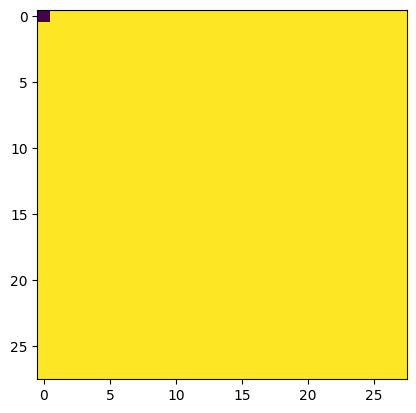


Epoch: 134 | Learning Rate: 5.497558138880005e-05
0.03181431069970131
0.02838013507425785
0.02797323279082775
0.029909199103713036
0.02824939228594303
0.028912028297781944
0.028309598565101624
0.02797524444758892
0.02884586900472641
0.028086086735129356
0.025727154687047005
0.027977196499705315
0.027705656364560127
0.02871772088110447
0.02758338861167431
0.02769780531525612
0.03030858188867569
0.025309240445494652
0.028266265988349915
0.02903014048933983
0.030211370438337326
0.028017576783895493
0.02753349207341671
0.027499224990606308
0.027828017249703407
0.028874926269054413
0.029033120721578598
0.02883405052125454
0.02896519936621189
0.028272297233343124
0.029805637896060944
0.030376140028238297
0.030142446979880333
0.028963815420866013
0.027710270136594772
0.026457233354449272
0.03116527386009693
0.02738223224878311
0.02746695838868618
0.027739392593503
0.0268770232796669
0.027656452730298042
0.02877858653664589
0.02683563157916069
0.026742491871118546
0.029847735539078712
0.02872

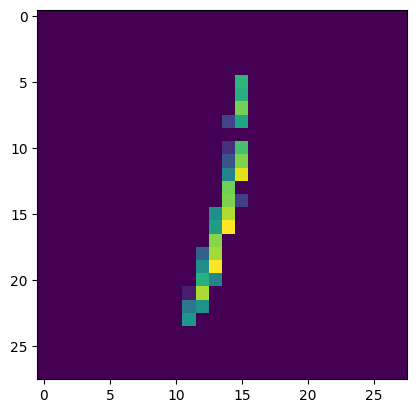


Epoch: 135 | Learning Rate: 5.497558138880005e-05
0.030362464487552643
0.029054880142211914
0.02628728188574314
0.027852138504385948
0.026889270171523094
0.02942548878490925
0.028033534064888954
0.02932550571858883
0.028819890692830086
0.027784643694758415
0.02730080671608448
0.024923821911215782
0.028617989271879196
0.028076322749257088
0.029338806867599487
0.027442513033747673
0.028212975710630417
0.027481842786073685
0.0251189935952425
0.028594188392162323
0.028732089325785637
0.028688106685876846
0.029400542378425598
0.02695986069738865
0.0292902160435915
0.028667498379945755
0.028661394491791725
0.027655795216560364
0.02812546119093895
0.02724415808916092
0.02745509147644043
0.028969915583729744
0.027333000674843788
0.028465699404478073
0.029901893809437752
0.02761286497116089
0.029232565313577652
0.02666242979466915
0.029486961662769318
0.027861405164003372
0.027558622881770134
0.028577590361237526
0.027523526921868324
0.0279375109821558
0.028892170637845993
0.02784687653183937


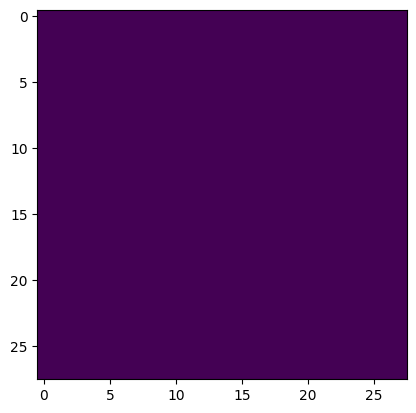


Epoch: 136 | Learning Rate: 5.497558138880005e-05
0.026744376868009567
0.026604846119880676
0.026557788252830505
0.027165666222572327
0.026981348171830177
0.02776254713535309
0.02851891703903675
0.02719810977578163
0.02858997881412506
0.028467657044529915
0.02671225741505623
0.027210745960474014
0.027374081313610077
0.027440041303634644
0.031023019924759865
0.027013668790459633
0.026910023763775826
0.02857443131506443
0.02805875428020954
0.02863636426627636
0.030511431396007538
0.030200419947504997
0.026730651035904884
0.028642594814300537
0.028039995580911636
0.028000572696328163
0.029294701293110847
0.027514394372701645
0.029107408598065376
0.02997308038175106
0.027836550027132034
0.02872616797685623
0.026775836944580078
0.028639478608965874
0.028069274500012398
0.030427543446421623
0.028046278282999992
0.029246436432003975
0.026068968698382378
0.027467887848615646
0.027280135080218315
0.028499796986579895
0.02540750429034233
0.029014984145760536
0.02654683217406273
0.02709832414984

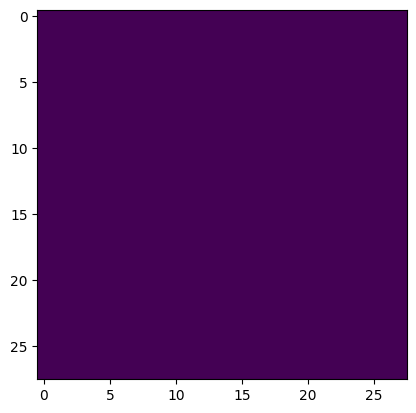


Epoch: 137 | Learning Rate: 5.497558138880005e-05
0.026647431775927544
0.02830725908279419
0.02867632359266281
0.02894272468984127
0.02829437330365181
0.028587399050593376
0.026401139795780182
0.02952815592288971
0.025558743625879288
0.030939817428588867
0.029008623212575912
0.02854163572192192
0.028604287654161453
0.028632963076233864
0.028515079990029335
0.02813391201198101
0.02466595359146595
0.029068779200315475
0.02737618237733841
0.02956889383494854
0.027341224253177643
0.02801787480711937
0.027237147092819214
0.02777317352592945
0.02788865566253662
0.02811719849705696
0.027915319427847862
0.030036093667149544
0.026066916063427925
0.025235511362552643
0.02787908725440502
0.028260158374905586
0.02839929610490799
0.028102828189730644
0.027834264561533928
0.02801852487027645
0.02765057422220707
0.02897585555911064
0.030385466292500496
0.027519069612026215
0.02848747745156288
0.028598079457879066
0.026438649743795395
0.029537277296185493
0.02843634970486164
0.028356103226542473
0.02

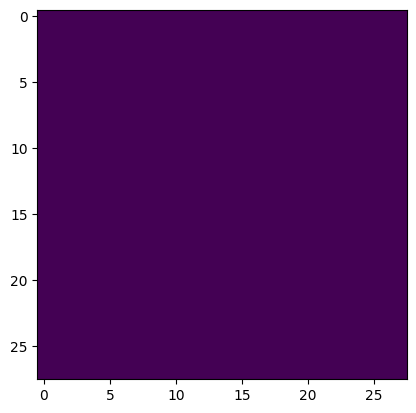


Epoch: 138 | Learning Rate: 5.497558138880005e-05
0.026736903935670853
0.02906440570950508
0.02654833160340786
0.025675855576992035
0.028235698118805885
0.027302274480462074
0.028819000348448753
0.02915283478796482
0.028153637424111366
0.02598455734550953
0.02671854756772518
0.02777041681110859
0.027841953560709953
0.02740461379289627
0.02827039547264576
0.028852514922618866
0.027154576033353806
0.027633607387542725
0.026630181819200516
0.029344480484724045
0.028428446501493454
0.02835736609995365
0.02839331142604351
0.026435036212205887
0.02841954305768013
0.028489386662840843
0.0287372674793005
0.02966572716832161
0.028617557138204575
0.02844071388244629
0.029493262991309166
0.029868178069591522
0.029123341664671898
0.026721496134996414
0.024869531393051147
0.028457876294851303
0.028086459264159203
0.028076907619833946
0.02412572130560875
0.027842609211802483
0.025388488546013832
0.028461351990699768
0.029012562707066536
0.03171830251812935
0.029760029166936874
0.030717747285962105


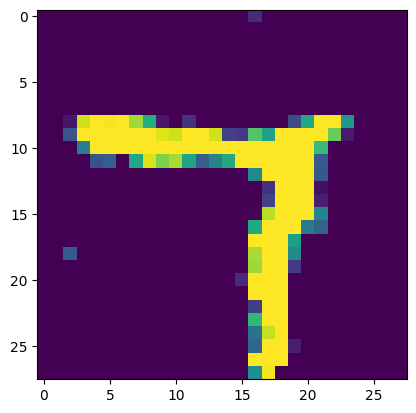


Epoch: 139 | Learning Rate: 5.497558138880005e-05
0.028390172868967056
0.02620384655892849
0.027474060654640198
0.027065733447670937
0.027580158784985542
0.02766360528767109
0.02873690240085125
0.028258489444851875
0.0281912200152874
0.02722068689763546
0.027900999411940575
0.029055314138531685
0.027353933081030846
0.028164604678750038
0.02770974114537239
0.02825036831200123
0.028130000457167625
0.02853119559586048
0.02674415335059166
0.02740364335477352
0.029245464131236076
0.02729109115898609
0.028958871960639954
0.028317151591181755
0.027475692331790924
0.028571998700499535
0.02809305116534233
0.029143905267119408
0.02966727502644062
0.027484305202960968
0.027134522795677185
0.025947175920009613
0.028777161613106728
0.0283973291516304
0.027364017441868782
0.028119675815105438
0.027271687984466553
0.02845352701842785
0.026770537719130516
0.028470749035477638
0.027899760752916336
0.026858871802687645
0.027832375839352608
0.026686806231737137
0.02756120264530182
0.0277103204280138
0.0

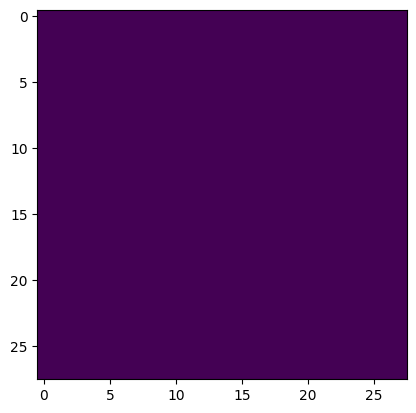


Epoch: 140 | Learning Rate: 5.497558138880005e-05
0.027599744498729706
0.027155885472893715
0.02627226710319519
0.02648036740720272
0.028705177828669548
0.03114309348165989
0.0283474363386631
0.02911924198269844
0.02728288248181343
0.027436483651399612
0.028545495122671127
0.02842131070792675
0.02883996069431305
0.027015093713998795
0.028737522661685944
0.029225746169686317
0.026151850819587708
0.02750522643327713
0.02680712752044201
0.028927575796842575
0.027404356747865677
0.02844156324863434
0.026475656777620316
0.02794191986322403
0.027238544076681137
0.029592888429760933
0.02768878825008869
0.02825089730322361
0.02930028736591339
0.02639734372496605
0.02745133452117443
0.02675202302634716
0.029134640470147133
0.02859433740377426
0.028783490881323814
0.028982242569327354
0.029767388477921486
0.02974828891456127
0.02870067209005356
0.02764030732214451
0.028717506676912308
0.028382891789078712
0.026836533099412918
0.028765665367245674
0.02795489877462387
0.027501018717885017
0.02722

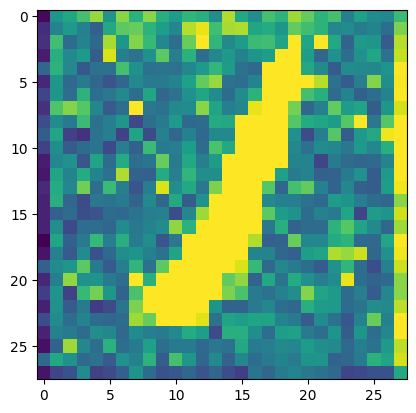


Epoch: 141 | Learning Rate: 4.3980465111040044e-05
0.02797328308224678
0.028225162997841835
0.027669237926602364
0.029577819630503654
0.030311735346913338
0.027634456753730774
0.02672785520553589
0.02859651669859886
0.025648681446909904
0.028937458992004395
0.0279360543936491
0.0272672139108181
0.02986447513103485
0.02732759527862072
0.027667682617902756
0.02563435398042202
0.0280681811273098
0.027260640636086464
0.03023756481707096
0.029861966148018837
0.02808113396167755
0.02991415560245514
0.028482932597398758
0.02706649713218212
0.02911951020359993
0.029024921357631683
0.028582222759723663
0.028789548203349113
0.02675711363554001
0.028103983029723167
0.02826644480228424
0.02925209142267704
0.026845581829547882
0.02794072963297367
0.026846792548894882
0.027803417295217514
0.02905137650668621
0.028647461906075478
0.028519006446003914
0.03109843283891678
0.02740594744682312
0.02777043543756008
0.02744763158261776
0.02853485941886902
0.026565026491880417
0.027068521827459335
0.0292015

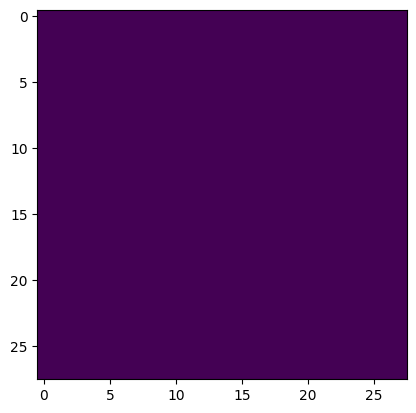


Epoch: 142 | Learning Rate: 4.3980465111040044e-05
0.026875261217355728
0.0289131049066782
0.02760375663638115
0.029002374038100243
0.027251992374658585
0.02818245254456997
0.02727387845516205
0.029017293825745583
0.02906976453959942
0.029132146388292313
0.027299914509058
0.028182443231344223
0.025972383096814156
0.028247088193893433
0.02783230133354664
0.026728114113211632
0.0260236207395792
0.027814915403723717
0.02799234539270401
0.027262141928076744
0.02756888046860695
0.027561411261558533
0.028890660032629967
0.028146715834736824
0.028459353372454643
0.02884000539779663
0.028751766309142113
0.031057866290211678
0.028813740238547325
0.02986512891948223
0.029030371457338333
0.02787097543478012
0.02739563211798668
0.028885064646601677
0.02530723437666893
0.028127631172537804
0.02904284931719303
0.02772129327058792
0.026659317314624786
0.02939745783805847
0.027388762682676315
0.027429409325122833
0.02830670215189457
0.029349442571401596
0.029238570481538773
0.02678835019469261
0.0291

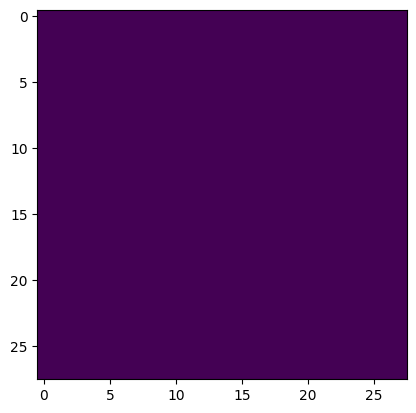


Epoch: 143 | Learning Rate: 4.3980465111040044e-05
0.02751881629228592
0.028142523020505905
0.028258489444851875
0.026665212586522102
0.027699096128344536
0.028607364743947983
0.027491580694913864
0.026924006640911102
0.028272755444049835
0.027545174583792686
0.026723627001047134
0.027968183159828186
0.029073957353830338
0.02828815206885338
0.0277275200933218
0.02804911881685257
0.02772699110209942
0.028726931661367416
0.02687603235244751
0.028271524235606194
0.02823018468916416
0.028048869222402573
0.02848859690129757
0.02773338556289673
0.025653202086687088
0.02798207849264145
0.02775842323899269
0.027514005079865456
0.027431752532720566
0.029576988890767097
0.029486699029803276
0.029903853312134743
0.028740931302309036
0.03030911274254322
0.027379075065255165
0.027263373136520386
0.030907055363059044
0.027832960709929466
0.02538352832198143
0.02965853177011013
0.02608104795217514
0.026655761525034904
0.03061963990330696
0.028426460921764374
0.028995787724852562
0.026889391243457794

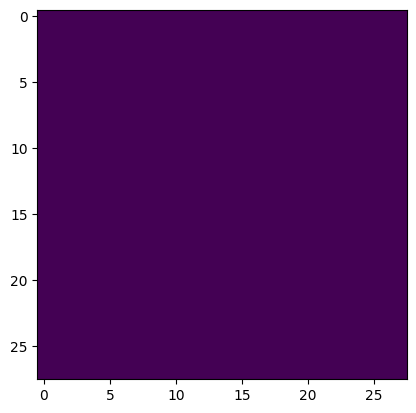


Epoch: 144 | Learning Rate: 4.3980465111040044e-05
0.026881299912929535
0.027584442868828773
0.028448814526200294
0.029058106243610382
0.030180390924215317
0.028377925977110863
0.0301809161901474
0.028648560866713524
0.028505729511380196
0.027653126046061516
0.02829468436539173
0.02766392193734646
0.028621913865208626
0.02475552074611187
0.027390863746404648
0.02587166801095009
0.029703659936785698
0.029091274365782738
0.027994994074106216
0.026951659470796585
0.030195873230695724
0.027627618983387947
0.02795729786157608
0.02709830552339554
0.027273250743746758
0.028499893844127655
0.028095753863453865
0.027914727106690407
0.02752486988902092
0.029482483863830566
0.028549794107675552
0.029751019552350044
0.026958951726555824
0.028082937002182007
0.02819422259926796
0.029156869277358055
0.02759575843811035
0.028769390657544136
0.02805587649345398
0.028942681849002838
0.027100803330540657
0.026860840618610382
0.02872196026146412
0.028289375826716423
0.02707749418914318
0.029085787013173

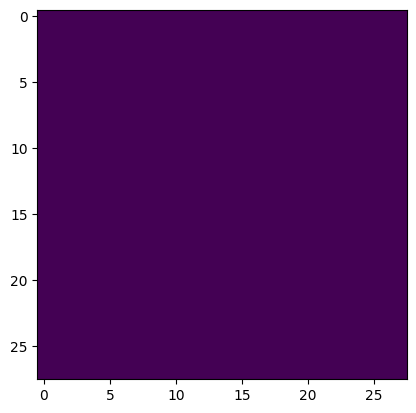


Epoch: 145 | Learning Rate: 4.3980465111040044e-05
0.029085267335176468
0.0273525882512331
0.028156153857707977
0.027043631300330162
0.02905893698334694
0.02925993874669075
0.027572283521294594
0.028736166656017303
0.028591632843017578
0.02749931812286377
0.029980674386024475
0.026153039187192917
0.027173640206456184
0.02763901837170124
0.02894863672554493
0.027011247351765633
0.028339164331555367
0.027391426265239716
0.02859652228653431
0.029505757614970207
0.029978323727846146
0.027825331315398216
0.025726318359375
0.028512263670563698
0.029996365308761597
0.025913607329130173
0.030038809403777122
0.027988465502858162
0.027559153735637665
0.027088548988103867
0.027111850678920746
0.03041042573750019
0.02709708921611309
0.030210377648472786
0.029245823621749878
0.02801072970032692
0.026207592338323593
0.02858916111290455
0.027086198329925537
0.02728450484573841
0.026041531935334206
0.027214916422963142
0.02903248742222786
0.027913426980376244
0.028623327612876892
0.02815844491124153


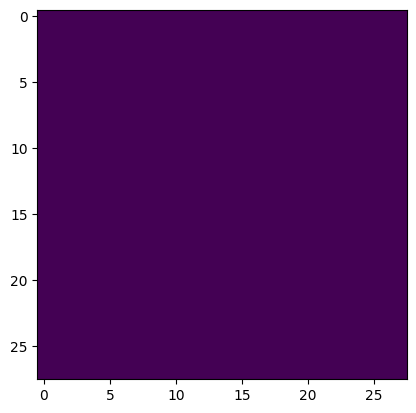


Epoch: 146 | Learning Rate: 4.3980465111040044e-05
0.02875363454222679
0.028737539425492287
0.028936628252267838
0.030709652230143547
0.027106979861855507
0.028821079060435295
0.029424432665109634
0.027295537292957306
0.029095765203237534
0.02786778099834919
0.028552258387207985
0.029152927920222282
0.029074352234601974
0.02879604697227478
0.026846574619412422
0.026993896812200546
0.02763283997774124
0.025608645752072334
0.02788642607629299
0.026776332408189774
0.025803852826356888
0.027999604120850563
0.02796301059424877
0.02585022523999214
0.029307503253221512
0.026050157845020294
0.02787882462143898
0.026944072917103767
0.027347879484295845
0.028810866177082062
0.027381297200918198
0.026080429553985596
0.027966463938355446
0.027766326442360878
0.027998480945825577
0.030435673892498016
0.02688204124569893
0.029684746637940407
0.02729852683842182
0.028033006936311722
0.025895360857248306
0.03000451624393463
0.02797883376479149
0.029329879209399223
0.028615888208150864
0.0280055850744

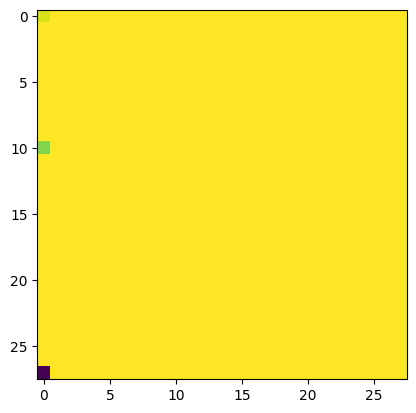


Epoch: 147 | Learning Rate: 4.3980465111040044e-05
0.028504613786935806
0.02676776982843876
0.028295135125517845
0.026138698682188988
0.026954717934131622
0.0283893421292305
0.02676960825920105
0.024376465007662773
0.028316473588347435
0.028623970225453377
0.02886492758989334
0.027216803282499313
0.029761649668216705
0.026502005755901337
0.029314350336790085
0.026103276759386063
0.03137242794036865
0.027572713792324066
0.025583116337656975
0.02745540253818035
0.028051165863871574
0.027259087190032005
0.02774113416671753
0.02914571762084961
0.02703562006354332
0.027554161846637726
0.029132116585969925
0.028419965878129005
0.02812749519944191
0.028506191447377205
0.0285062063485384
0.026635903865098953
0.02831338532269001
0.027789445593953133
0.029430082067847252
0.02893306314945221
0.027786001563072205
0.028587214648723602
0.026881737634539604
0.026629948988556862
0.028533603996038437
0.026836102828383446
0.026571210473775864
0.028377065435051918
0.03013821505010128
0.02861379459500312

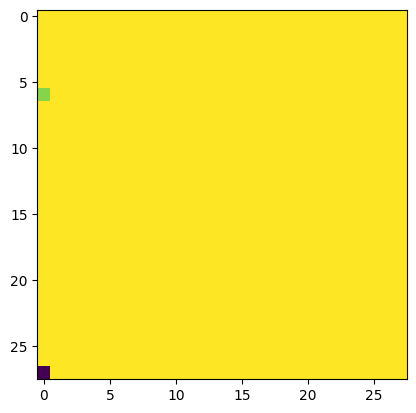


Epoch: 148 | Learning Rate: 4.3980465111040044e-05
0.02755359746515751
0.029110237956047058
0.030270954594016075
0.028480062261223793
0.02866414561867714
0.026220638304948807
0.02701698988676071
0.02789635956287384
0.0265594981610775
0.029463037848472595
0.028859086334705353
0.02748616598546505
0.028701340779662132
0.025857890024781227
0.029356181621551514
0.028520068153738976
0.028279153630137444
0.027795420959591866
0.0255611352622509
0.027692925184965134
0.026268552988767624
0.029033053666353226
0.028749950230121613
0.026542428880929947
0.027380330488085747
0.02880716696381569
0.02989436686038971
0.02686973474919796
0.029373299330472946
0.028318393975496292
0.027281561866402626
0.027040421962738037
0.029808536171913147
0.02580457180738449
0.027575209736824036
0.02786811999976635
0.02642674371600151
0.028920801356434822
0.026491781696677208
0.027932925149798393
0.02649778686463833
0.029919099062681198
0.029574524611234665
0.028470128774642944
0.03097221441566944
0.028225187212228775

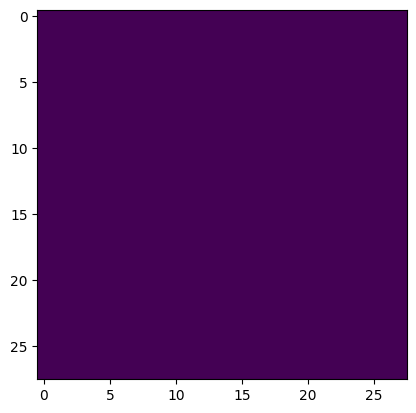


Epoch: 149 | Learning Rate: 4.3980465111040044e-05
0.028625093400478363
0.02826397679746151
0.027116933837532997
0.02880079858005047
0.028130685910582542
0.028352079913020134
0.030521567910909653
0.028556784614920616
0.027052531018853188
0.027158429846167564
0.02875644341111183
0.03023090586066246
0.02797774411737919
0.027036335319280624
0.026829682290554047
0.027891110628843307
0.027985088527202606
0.029143571853637695
0.028698252514004707
0.029467327520251274
0.02928612194955349
0.028598405420780182
0.02710757590830326
0.026400664821267128
0.027525410056114197
0.025562811642885208
0.02755918726325035
0.027796601876616478
0.02739723026752472
0.028241412714123726
0.027518486604094505
0.029331644997000694
0.02817090041935444
0.029648559167981148
0.02718881331384182
0.028495686128735542
0.0273749977350235
0.029395414516329765
0.026784710586071014
0.027979889884591103
0.029134467244148254
0.026733223348855972
0.028833255171775818
0.02903568744659424
0.02701360546052456
0.0288070999085903

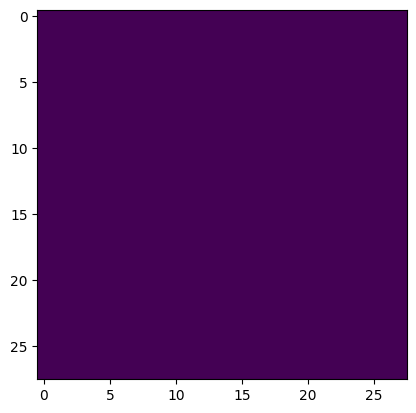


Epoch: 150 | Learning Rate: 4.3980465111040044e-05
0.028846949338912964
0.028963183984160423
0.027506861835718155
0.026101861149072647
0.02792750485241413
0.028195468708872795
0.027545558288693428
0.02745712921023369
0.029457587748765945
0.030453363433480263
0.028972363099455833
0.029270581901073456
0.027367644011974335
0.026580065488815308
0.028271464630961418
0.02710220403969288
0.029768675565719604
0.02667931094765663
0.02778003364801407
0.028981264680624008
0.02935619279742241
0.029288986697793007
0.027476930990815163
0.028730256482958794
0.027717800810933113
0.029396887868642807
0.02829778380692005
0.030338695272803307
0.027604348957538605
0.02696366235613823
0.028076251968741417
0.028506416827440262
0.028568165376782417
0.02912740781903267
0.02880811132490635
0.030061589553952217
0.027423016726970673
0.029365558177232742
0.02909686043858528
0.02942621149122715
0.02894761599600315
0.02828430011868477
0.029002398252487183
0.029183777049183846
0.029126137495040894
0.026689680293202

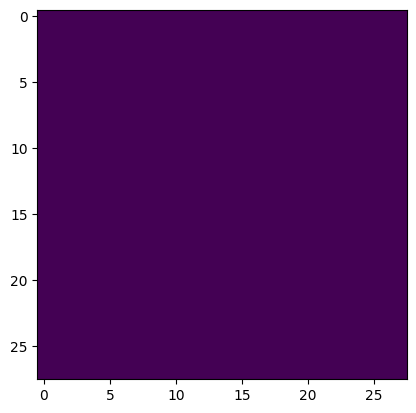

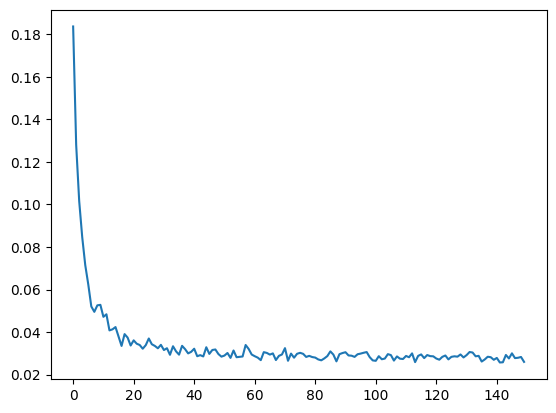

In [10]:
print("Number of parameters:", sum([param.numel() for param in unet.parameters()]))
optimizer = optim.Adam(unet.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)
train(unet, data, ddpm, optimizer, scheduler, epochs=150, num_workers=2)

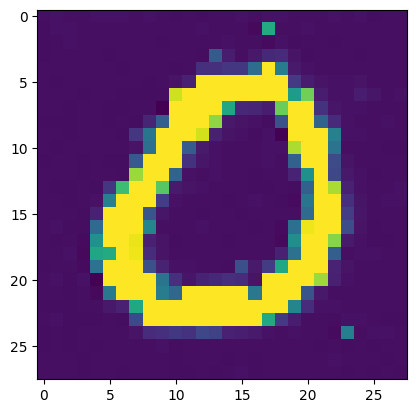

In [44]:
unet.eval()
display_generated(unet, ddpm, data)

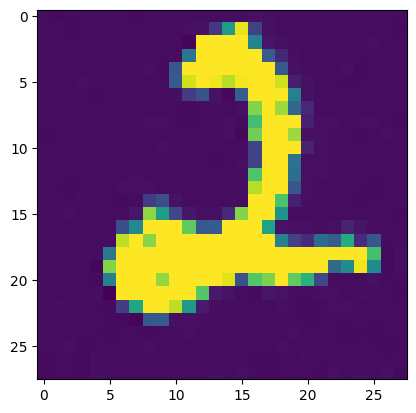

In [35]:
unet.eval()
display_generated(unet, ddpm, data)

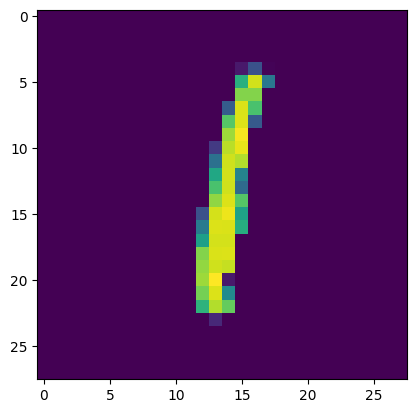

In [39]:
unet.eval()
display_generated(unet, ddpm, data)